___Objective:___

* ***Identifying Risk Factors***: The primary goal is to identify consumer and loan attributes that significantly influence the likelihood of loan default. This involves examining patterns and correlations within the data to pinpoint variables that serve as strong indicators of default risk.

* ***Risk Mitigation***: By understanding the driving factors behind loan default, the company aims to develop strategies to mitigate credit risk. This could include refining its lending criteria, adjusting interest rates, or implementing other risk management measures to minimize financial losses associated with defaulting borrowers.

* ***Portfolio Optimization***: Insight gained from EDA can inform portfolio optimization strategies. By identifying and managing riskier loan applicants more effectively, the company can optimize its loan portfolio to improve overall profitability and sustainability.

* ***Enhancing Risk Assessment Models***: The findings from the analysis can be used to enhance existing risk assessment models or develop new predictive models for more accurate identification of high-risk applicants. This can improve the company's ability to make informed decisions regarding loan approvals and reduce instances of default.

* ***Business Decision Support***: Ultimately, the objective is to provide actionable insights that support strategic decision-making within the company. This may involve recommending specific actions such as adjusting lending policies, reallocating resources, or implementing targeted marketing strategies to mitigate risk and improve overall loan performance.


By achieving these objectives, the company aims to enhance its ability to identify and manage credit risk effectively, ultimately leading to improved financial performance and sustainable growth in the competitive consumer finance market.


In [53]:
#Import libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string

In [54]:
#Importing excel.csv file

lending_club = pd.read_csv("loan.csv")
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#lending_club.info(verbose = True)
#lending_club.to_excel("Output.xlsx", index = False)

# ***Global Variables***

In [55]:
#Numerical Variables

#Text Bar Plot Variables
text_bar_fig_size_x = 20
text_bar_fig_size_y = 8
text_bar_sec_1_x = 0.55
text_bar_sec_1_y = 0.5

#Distrubution and Outlier Plot Variables
dist_box_fiz_size_x = 20
dist_box_fiz_size_y = 8


# ***Functions Block***
---

In [56]:
def dataFrame_single_column_shape(dataFrame, column_name):
  """
  To analyze the null value in the specific column of the dataframe

  Args:
      dataFrame (pandas.DataFrame): The pandas DataFrame to be analyzed.
      column_name : A column name to check null values

  Returns:
      This function gives int result which describe the sum of null values
  """
  return dataFrame[column_name].isnull().sum()


def columns_DataFrame(dataFrame, null_check_percentage):
  """
  To analyze the number of columns in a pandas DataFrame that have a percentage
  of null values exceeding a specified threshold.

  Args:
      dataFrame (pandas.DataFrame): The pandas DataFrame to be analyzed.
      null_check_percentage (float): The percentage threshold for null values in columns.
      Columns with a percentage of null values exceeding this threshold will be counted.

  Returns:
      missing_Column_Count (int): An integer representing the number of columns in
      the DataFrame that have a percentage of null values greater than the
      null_check_percentage parameter.
  """
  missing_Column_Count = sum(round(100 * dataFrame[col].isnull().mean(), 2
                                   ) > null_check_percentage
                             for col in dataFrame.columns)
  return missing_Column_Count


def dataFrame_properties(dataFrame, null_check_percentage):
  """
  The dataFrame_properties function is designed to analyze and report on various
  properties of a pandas DataFrame, including its shape, column data types,
  descriptive statistics, null value distribution, and columns exceeding
  a user-specified null value threshold.

  Args:
      dataFrame (pandas.DataFrame): The pandas DataFrame you want to analyze.
      null_check_percentage (float): The percentage threshold for null values in columns.
                                     Columns with a percentage of null values
                                     exceeding this threshold will be identified.
  Returns:
      The function primarily prints the analysis results to the console.
      However, it indirectly modifies the DataFrame by potentially dropping columns
      with excessive null values (depending on how the function is used).
  """
  star = 20
  print('*' * star, 'DataFrame Shape', '*' * star)
  print(dataFrame.shape,'\n')
  print('*' * star, 'DataFrame Column Types', '*' * star)
  print(dataFrame.dtypes,'\n')
  print('*' * star, 'DataFrame distribution summary', '*' * star)
  print(dataFrame.describe(),'\n')
  print('*' * star, 'DataFrame Null Check greater than', null_check_percentage,
        '%', '*' * star)
  series_Null_Check_User_Input = round(dataFrame.isnull().mean() * 100, 2)
  print(series_Null_Check_User_Input[series_Null_Check_User_Input >
        null_check_percentage],'\n')
  print('*' * star, 'DataFrame Null Info', '*' * star)
  print(dataFrame.isnull().sum(),'\n')
  print('*' * star, 'DataFrame Shape of Null Check greater than',
        null_check_percentage, '%', '*' * star)
  missing_Column_Result =  columns_DataFrame(dataFrame, null_check_percentage)
  print('For',null_check_percentage, '% check we are having', missing_Column_Result,
        'columns in the data set','\n')
  print('*' * star, 'Later Dropping columns more than', null_check_percentage,
        '% from the DataFrame', '*' * star)
  print('Final Count of shape of DataFrame', dataFrame.shape[1] -
        missing_Column_Result, 'columns', '\n')


def separate_categorical_numerical(data_frame):
  """
  Separates column names into categorical and numerical lists based on data types,
  excluding datetime columns.

  Args:
      data_frame: The pandas DataFrame containing the columns.

  Returns:
      A tuple containing two lists:
          - categorical_columns: List of column names with categorical data types.
          - numerical_columns: List of column names with numerical data types (excluding datetime).
          - extra_columns : List of column names with datetime data type
  """

  categorical_columns = []
  numerical_columns = []
  extra_columns = []

  # Iterate through columns and check data types
  for column_name in data_frame.columns:
    # Consider string columns as categorical (adjust as needed)
    if pd.api.types.is_string_dtype(data_frame[column_name]):
      categorical_columns.append(column_name)
    elif pd.api.types.is_numeric_dtype(data_frame[column_name]):
      # Exclude datetime columns
      if not pd.api.types.is_datetime64_dtype(data_frame[column_name]):
        numerical_columns.append(column_name)
    else:
      extra_columns.append(column_name)

  return categorical_columns, numerical_columns, extra_columns


def drop_high_missing_value_columns(data_frame, null_check_percentage):
  """
   Drops columns from a DataFrame that have a percentage of missing values
   exceeding a specified threshold.

  Args:
    data_frame: The pandas DataFrame to modify.
    null_check_percentage: The minimum percentage of missing values for a column to be dropped.

  Returns:
    The modified DataFrame with columns dropped.
  """

  columns_to_drop = []
  for col in data_frame.columns:
    missing_value_ratio = round(100 * data_frame[col].isnull().mean(), 2)
    if missing_value_ratio > null_check_percentage:
      columns_to_drop.append(col)

  data_frame = data_frame.drop(columns_to_drop, axis=1)
  return data_frame


def drop_single_value_columns(data_frame):
  """
  Drops columns from a DataFrame that have only one unique value.

  Args:
    data_frame: The pandas DataFrame to modify.

  Returns:
    The modified DataFrame with columns having a single unique value dropped.
    """

  # Get the number of unique values for each column
  unique_values = data_frame.nunique()

  # Sort the unique value counts (optional)
  unique_values.sort_values(inplace=True)

  # Select columns with only one unique value
  list_columns_unique_values = unique_values[unique_values == 1]
  columns_to_drop = list_columns_unique_values.index.tolist()
  print(list_columns_unique_values)

  # Drop the identified columns
  data_frame.drop(columns_to_drop, axis=1, inplace=True)

  # Return the modified DataFrame
  return data_frame


def drop_missing_columns(data_frame, considered_column_list):
  """
  Drops columns from a DataFrame that are not present in the provided list.

  Args:
    data_frame: The pandas DataFrame to modify.
    considered_column_list: A list containing the desired column names.

  Returns:
    The modified DataFrame with columns not in the considered_column_list dropped.
  """

  # Get the difference between DataFrame columns and the considered_column_list
  columns_to_drop = set(data_frame.columns) - set(considered_column_list)

  # Drop the identified columns
  data_frame.drop(columns_to_drop, axis=1, inplace=True)

  # Return the modified DataFrame
  return data_frame


def generate_unique_hex_colors(num_colors):
  """
  Generates a list of unique hexadecimal color codes of the format #RRGGBB.

  Args:
      num_colors: The desired number of unique hexadecimal color codes.

  Returns:
      A list of unique hexadecimal color codes (strings).
  """

  colors = []
  while len(colors) < num_colors:
    # Generate a random hex code
    color = "#" + ''.join(random.choices(string.hexdigits, k=6))

    # Check if it's unique and add it to the list
    if color not in colors:
      colors.append(color)

  return colors


def bar_plot_with_text(data_frame, column_name_to_plot, text_bar_fig_size_x,
                       text_bar_fig_size_y, text_bar_sec_1_x, text_bar_sec_1_y):
  """
  Creates bar charts on values in specified columns and observation in text.

  Args:
      data_frame: The pandas DataFrame containing the data for the chart.
      column_name_to_plot: A list of column names to plot as separate bar charts.
      text_bar_fig_size_x: Give x axis value for plot fig
      text_bar_fig_size_y: Give y axis value for plot fig
      text_bar_sec_1_x: Give x axis value for text area
      text_bar_sec_1_y: Give y axis value for text area

  Returns:
      bar plot
  """
  for data_frame_column in column_name_to_plot:
    # Creating plot structure
    fig = plt.figure(figsize=(text_bar_fig_size_x, text_bar_fig_size_y,))
    spec = fig.add_gridspec(1,2)
    spec.update(wspace=0.2,hspace=0.3)
    sec_1 = fig.add_subplot(spec[0,0])
    sec_2 = fig.add_subplot(spec[0,1])

    #Background Color
    bg_color = '#FFFDD0'
    for selection in [fig, sec_1, sec_2]:
      selection.set_facecolor(bg_color)

    #Plotting bar graph on sec_2
    # Get value counts (normalized)
    value_counts = data_frame[data_frame_column].value_counts(normalize=True)

    # Create the bar chart
    value_counts.plot.bar(ax = sec_2)
    sec_2.grid(color = 'Black', linestyle = '-.', axis = 'y', zorder = 0,  dashes = (1,6))
    plt.xticks(rotation = 0)
    plt.yticks(np.arange(0.0,1.1,0.1))

    #Missing values
    missing_value = data_frame[data_frame_column].isnull().sum()

    #sec_1 block
    #1. Observation string
    normalize_value_num = value_counts * 100
    normalize_value_num = normalize_value_num.sort_values(ascending = False)
    fomratting_string = ""
    for status, proportion in normalize_value_num.items():
      fomratting_string += f"{status} are {round(proportion, 2)} %, "
    formatting_text = fomratting_string[:-2]

    #2. Story
    # Break formatting_text into lines of 78 characters each
    lines = []
    current_line = ""
    for char in formatting_text:
        current_line += char
        if len(current_line) == 78:
            lines.append(current_line)
            current_line = ""

    # Add the last remaining text if any
    if current_line:
        lines.append(current_line)

    observation_text = f"OBSERVATION ON {data_frame_column.upper()}\n" \
                       f"\n" \
                       f"In the dataset\n"
    for line in lines:
      observation_text += f"{line}\n"
    observation_text += f"and {data_frame_column} column has {missing_value} missing value."
    sec_1.text(text_bar_sec_1_x, text_bar_sec_1_y, observation_text, ha='center'
                , va='center', size=12, family='serif')

    # Removing axis and spines
    sec_1.axis('off')

    #Add the title to the entire graph
    sec_2.set_title(f'Normalization of {data_frame_column}')
    #Show Plot
    plt.show()


def dist_box_plot(data_frame, column_name_to_plot, dist_box_fiz_size_x,
                       dist_box_fiz_size_y):
  """
  Creates distribution plot on values and box plot for outliers.

  Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      column_name_to_plot: A list of column names to plot as separate dist & boxplot.
      dist_box_fiz_size_x: Give x axis value for plot fig
      dist_box_fiz_size_y: Give y axis value for plot fig

  Returns:
      distribution and box plot

  """
  fig_number = 1

  for data_frame_column in column_name_to_plot:
    print(f"\nPlot No.{fig_number}\n")
    plt.figure(figsize=(18,10))

    #Distribution & Outlier plot
    #Distribution plot
    plt.subplot(2,2,1)
    viz = sns.histplot(x=data_frame[data_frame_column], color='blue', kde=True)
    title = "Distribution of "
    plot_title = title + data_frame_column.upper()
    viz.set_title(plot_title, fontsize=12, color='red')
    viz.set_xlabel(data_frame_column.upper(), fontsize=10, color='red')
    viz.set_ylabel('DENSITY',fontsize =10,color = 'red')
    viz.set_facecolor('#FFFDD0')

    # Outlier plot
    plt.subplot(2,2,2)
    viz = sns.boxplot(data_frame[data_frame_column], orient='h', color='blue',fliersize=2)
    viz.set_title('NUMERICAL SUMMARY',fontsize=12,color='red')
    viz.set_xlabel(data_frame_column.upper(),fontsize =10,color = 'red')
    viz.set_facecolor('#BDAB98')

    plt.show()

    #Summary
    text = f"\nSUMMARY of {data_frame_column}\n"\
           f"Count: {int(round(data_frame[data_frame_column].shape[0], 2))}\n"\
           f"Min: {int(round(data_frame[data_frame_column].min(), 2))}\n"\
           f"Max: {int(round(data_frame[data_frame_column].max(), 2))}\n"\
           f"Mean: {int(round(data_frame[data_frame_column].mean(), 2))}\n"\
           f"5% Quantile: {int(round(data_frame[data_frame_column].quantile(0.05), 2))}\n"\
           f"25% Quantile: {int(round(data_frame[data_frame_column].quantile(0.25), 2))}\n"\
           f"Median (50%): {int(round(data_frame[data_frame_column].quantile(0.5), 2))}\n"\
           f"75% Quantile: {int(round(data_frame[data_frame_column].quantile(0.75), 2))}\n"\
           f"90% Quantile: {int(round(data_frame[data_frame_column].quantile(0.9), 2))}\n"\
           f"99% Quantile: {int(round(data_frame[data_frame_column].quantile(0.99), 2))}\n"\
           f"100% Quantile: {int(round(data_frame[data_frame_column].quantile(1), 2))}\n"\

    #print summary details
    print(text)
    print('*' * 100)
    fig_number += 1


def count_hue_no_support_column(data_frame, column_name_to_plot, bars, bars_color):
  '''
  Creates count plot on assigned columns and color based on term value.

    Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      column_name_to_plot: A list of column names to plot as separate count plot.
      bars: Based column values bar color will determine
      bars_color: Bar colors pattern

   Returns:
      Count plot
  '''

  #Creating Count plot
  fig_number = 1

  for data_frame_column in column_name_to_plot:
    print(f"\nPlot No.{fig_number}\n")
    fig, ax = plt.subplots(figsize=(18, 10))
    viz = sns.countplot(ax = ax, data = data_frame,
                    x = data_frame_column,
                    hue = bars,
                    order=data_frame[data_frame_column].sort_values(),
                    palette=bars_color)
    viz.set_title(bars.upper() + ' Vs '+ data_frame_column.upper(),fontsize=12,color='red')
    viz.set_ylabel('Count',fontsize =10,color = 'red')
    viz.set_xlabel(data_frame_column,fontsize =10,color = 'red')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    for bar in bars:
      for container in viz.containers:
        abs_values = data_frame[data_frame[bars] == bar][data_frame_column].value_counts(ascending=False)
        lbls = [f'{p[0]})' for p in abs_values]

        try:
          # Attempt bar_label
          viz.bar_label(container=container, labels=lbls)
        except AttributeError:
          # Handle potential error if no containers exist (e.g., single hue)
          pass

    plt.show()

    #Text result
    values = data_frame[bars].sort_values().unique()
    for single_value in values:
      filtered_data = data_frame[(data_frame[bars] == single_value)][data_frame_column]
      value = round(filtered_data.value_counts(normalize=True) * 100, 2).sort_index()
      fomratting_string = ""
      for status, proportion in value.items():
        fomratting_string += f"{status}: {round(proportion, 2)} %,\n"
      formatting_text = fomratting_string[:-2]
      text = f"\nSUMMARY of {data_frame_column.upper()} with {single_value.upper()}\n" \
           f"{formatting_text}\n"\

      print(text)

    print('*' * 150)
    fig_number += 1


def count_hue_support_column(data_frame, column_name_to_plot, support_column,
                             bars, bars_color):
  """
  Creates year count plots on assigned columns and color based on term value.

  Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      column_name_to_plot: The column which display on plot
      support_column: Which help to derive the column.
      bars: A string representing the column used for bar color coding.
      bars_color: Bar colors pattern

  Returns:
      count plot
  """

  # Creating Count plot
  fig_number = 1
  unique_list = data_frame[support_column].sort_values().unique()  # Get unique years

  for column_value in unique_list:
    print(f"\nPlot No.{fig_number}\n")
    fig, ax = plt.subplots(figsize=(18, 10))
    filter_data = data_frame[data_frame[support_column] == column_value][
        [support_column, column_name_to_plot, bars]]
    viz = sns.countplot(ax=ax, data=filter_data,
                          x=column_name_to_plot,
                          hue=bars,
                          order=filter_data[column_name_to_plot].sort_values().unique(),
                          palette=bars_color)
    title = f"{bars.upper()} Vs {column_name_to_plot.upper()} {column_value}"
    viz.set_title(title, fontsize=12, color='red')
    viz.set_ylabel('Count', fontsize=10, color='red')
    viz.set_xlabel(column_name_to_plot, fontsize=10, color='red')
    # Adjust x-offset (1.05) for better placement
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    for bar in bars:
      for container in viz.containers:
        abs_values = filter_data[(filter_data[bars] == bar) &
         (filter_data[support_column] == column_value)][column_name_to_plot].value_counts(ascending=False)
        lbls = [f'{p[0]}' for p in abs_values]

        try:
          # Attempt bar_label
          viz.bar_label(container=container, labels=lbls)
        except AttributeError:
          # Handle potential error if no containers exist (e.g., single hue)
          pass

    plt.show()

    #Text result
    values = data_frame[bars].sort_values().unique()
    for single_value in values:
      filtered_data = data_frame[(data_frame[bars] == single_value) &
                      (data_frame[support_column] == column_value)][column_name_to_plot]
      value = round(filtered_data.value_counts(normalize=True) * 100, 2).sort_index()
      fomratting_string = ""
      for status, proportion in value.items():
        fomratting_string += f"{status}: {round(proportion, 2)} %,\n"
      formatting_text = fomratting_string[:-2]
      text = f"\nSUMMARY of {column_value} with {single_value}\n" \
           f"{formatting_text}\n"\

      print(text)

    print('*' * 150)
    fig_number += 1


def count_axis_nohue_nosupport_column(data_frame, column_name_to_plot, bars_color,
                                      plot_title):
  """
  Creates a count plot on the y-axis without hue or support column.

  Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      column_name_to_plot: A list representing the columns containing data to plot.
      bars_color: A color palette (optional) for the bars.
      plot_title: The title for the plot.

  Returns:
      count plot
  """
  # Creating Count plot
  fig_number = 1
  for i, current_column in enumerate(column_name_to_plot):
    fig, axes= plt.subplots(1, figsize=(18,10))
    print(f"\nPlot No.{fig_number}\n")
    if data_frame[current_column].nunique() > 7:
      viz = sns.countplot(y=data_frame[current_column],
                          order=data_frame[current_column].value_counts().index,
                          palette=bars_color[i])

      total = len(data_frame[current_column])
      for p in viz.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        viz.annotate(percentage, (x, y))
      x_axis = 'BORROWERS COUNT'
      y_axis = 'CATEGORY'

    else:
      viz = sns.countplot(x=data_frame[current_column],
                          order=data_frame[current_column].value_counts().index,
                          palette=bars_color[i])
      freq = data_frame[current_column].value_counts()
      for i in zip(freq.index, freq):
        viz.annotate(xy=i, text=f'{round(i[1]/freq.sum()*100, 1)}%',
                   horizontalalignment='left', verticalalignment='bottom')
      x_axis = 'CATEGORY'
      y_axis = 'BORROWERS COUNT'

    viz.set_xlabel(x_axis, fontsize=10, color='red')
    viz.set_ylabel(y_axis, fontsize=10, color='red')
    viz.set_title(current_column, fontsize=12, color='red')
    plt.show()

    # Text result
    formatting_string = ""
    column_values = data_frame[current_column].unique()
    for value in column_values:
      df = data_frame[data_frame[current_column] == value][current_column]
      formatting_string += f"{value} are {df.shape[0]} \n"
      formatting_text = formatting_string

    print(f'\nSUMMARY of {current_column.upper()}\n'\
          f'{formatting_text}')

    print('*' * 150)
    fig_number += 1


def barplot_hue_xy_axis(data_frame, x_axis, y_axis, bars, bars_color):
  """
  Creates year bar plots on assigned columns and color based on term value.

  Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      x_axis: The column which display on plot
      y_axis: Which help to derive the column.
      bars: A string representing the column used for bar color coding.
      bars_color: Bar colors pattern

  Returns:
      bar plot
  """

  # Creating Count plot
  fig_number = 1

  print(f"\nPlot No.{fig_number}\n")
  fig, ax = plt.subplots(figsize=(18, 10))
  viz = sns.barplot(ax=ax, data=data_frame,
                          x=x_axis,
                          y=y_axis,
                          hue=bars,
                          order=data_frame[x_axis].sort_values().unique(),
                          palette=bars_color)
  title = f"{y_axis.upper()} Vs {x_axis.upper()}"
  viz.set_title(title, fontsize=12, color='red')
  viz.set_ylabel(y_axis, fontsize=10, color='red')
  viz.set_xlabel(x_axis, fontsize=10, color='red')
  # Adjust x-offset (1.05) for better placement
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.show()

  #Text result
  nunique_value = data_frame[x_axis].nunique()
  value_counts = data_frame[data_frame[x_axis] == nunique_value][x_axis].shape[0]
  formatting_string = ""
  for status, proportion in zip(data_frame[x_axis].unique(),
                                  data_frame[x_axis].value_counts()):
    formatting_string += f"{status} are {proportion} \n"
  formatting_text = formatting_string[:-2]

  print(f'\nSUMMARY of {x_axis.upper()}\n'\
          f'{formatting_text}')

  print('*' * 150)
  fig_number += 1


def box_plot_xy_axis(data_frame, x_axis, y_axis):
  '''
  Creates box plots on assigned column and row value.

  Args:
      data_frame: The pandas DataFrame containing the data for the plot.
      x_axis: List of Column name & value on x_axis
      y_axis: Column name & value on x_axis.

  Returns:
      Box plot
  '''
  # Creating Box Plot
  fig_number = 1

  for i in x_axis:
    print(f"\nPlot No.{fig_number}\n")
    plt.figure(figsize=(18,10))
    viz = sns.boxplot(x=i, y=y_axis,
                    order=data_frame[y_axis].value_counts().index.sort_values(),
                    data=data_frame)

    #Naming the axis and title
    viz.set_title(f'{i.upper()} VS {y_axis.upper()}', fontsize = 12, color = 'red')
    viz.set_xlabel(i.upper(), fontsize = 12, color = 'red')
    viz.set_ylabel(y_axis.upper(), fontsize = 12, color = 'red')
    plt.show()
    print(f'\nSUMMARY\n{data_frame.groupby(y_axis)[i].describe()}\n')
    print('*' * 150)
    fig_number += 1


def create_categorical_buckets(data_frame, bucket_definitions):
  """
  Creates categorical buckets for multiple columns in a DataFrame based on provided definitions.

  Args:
      data_frame: The pandas DataFrame containing the data.
      bucket_definitions: A dictionary mapping column names to tuples of (bins, labels).

  Returns:
      The pandas DataFrame with new columns containing the categorical buckets.
  """

  for column_name, (bins, labels) in bucket_definitions.items():
    data_frame[f"{column_name}_bkt"] = pd.cut(data_frame[column_name], bins=bins,
                                              labels=labels)
  return data_frame


def countplot_grid(data_frame, column_list):
  # Creating plots
  fig = plt.figure(figsize=(20,10))
  spec = fig.add_gridspec(2,2)
  spec.update(wspace=0.2, hspace=0.3)
  sec_01 = fig.add_subplot(spec[0,0])
  sec_02 = fig.add_subplot(spec[0,1])
  sec_03 = fig.add_subplot(spec[1,0])
  sec_04 = fig.add_subplot(spec[1,1])

  # Adding color preference
  bg_color = '#FFFDD0'
  for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

  # Plotting the graph
  sec = [sec_01, sec_02, sec_03, sec_04]

  for cnt, current_column in enumerate(column_list):
    sns.countplot(x=data_frame[current_column], ax=sec[cnt],
                  order = data_frame[current_column].value_counts().index)
    title = f'Segmentation of {current_column}'
    sec[cnt].set_title(title, fontsize=12, color='red')
    sec[cnt].set_ylabel('COUNT' , fontsize=12, color = 'red')
    sec[cnt].set_xlabel(current_column, fontsize=12, color='red')
    freq = data_frame[current_column].value_counts()
    for i in zip(freq.index, freq):
      sec[cnt].annotate(xy=i, text=f'{round(i[1]/freq.sum()*100, 1)}%',
                   horizontalalignment='left', verticalalignment='bottom')
  plt.show()

  #Text Result
  for cnt, current_column in enumerate(column_list):
    nunique_value = data_frame[current_column].nunique()
    value_counts = data_frame[data_frame[current_column] ==
                              nunique_value][current_column].shape[0]
    formatting_string = ""
    for status, proportion in zip(data_frame[current_column].unique(),
                                  data_frame[current_column].value_counts()):
      formatting_string += f"{status} are {proportion} \n"
    formatting_text = formatting_string[:-2]

    print(f'\nSUMMARY of {current_column.upper()}\n'\
          f'{formatting_text}\n')


# ***Details of primary Data set***

In [57]:
# Call dataFrame_properties function to fetch the dataframe details
dataFrame_properties(lending_club, null_check_percentage = 50)

******************** DataFrame Shape ********************
(39717, 111) 

******************** DataFrame Column Types ********************
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose               

# ***Treatment for Missing Value***
---
*   Identifying the missing value percentage for all the columns in dataset and dropping the columns if missing percentage is more than client choice



In [58]:
lending_club = drop_high_missing_value_columns(lending_club, null_check_percentage=50)
print('The modified DataFrame after columns dropped', lending_club.shape, '.')

The modified DataFrame after columns dropped (39717, 54) .


# ***Unique Value in Column Treatment***
---
*  Identifying Single non null unique value columns and drop


In [59]:
#Updated DataFrame
lending_club = drop_single_value_columns(lending_club)
print('\n',lending_club.shape)


tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
dtype: int64

 (39717, 45)


# ***Considering below columns for following reasons***
---
These columns should enable you to distinguish between the loan applicants who are likely to default (charged-off) and those who will repay the loan (fully paid or current). Let's first take a look at the columns and descriptions provided in the Data_Dictionary Excel file

1. **loan_status**: This is crucial for identifying the outcome of the loan (Fully Paid, Current, or Charged Off).

2. **annual_inc**: The borrower's annual income, which can indicate their ability to repay the loan.

3. **dti** (Debt to Income Ratio): This measures the borrower's monthly debt payments relative to their income, a key indicator of financial health and risk.

4. **grade**: These Lending Club assignments reflect the risk associated with the loan.

5. **sub_grade**: These Lending Club assignments reflect the risk associated with the loan.

6. **int_rate** (Interest Rate): Higher rates may be associated with higher risk loans.

7. **loan_amnt**: The amount of the loan applied for, which might affect the likelihood of default.

8. **purpose**: The purpose of the loan (e.g., debt consolidation, home improvement) can influence the likelihood of repayment.

9. **term**: The loan term can affect the borrower's ability to pay over time.

10. **emp_length**: Employment length, as stable employment might indicate a lower risk of default.

11. **home_ownership**: Whether the borrower owns a home, rents, or has other living arrangements, as this might impact financial stability.

12. **verification_status**: Indicates if income was verified, which could affect the credibility of the borrower's declared income.

13. **delinq_2yrs**: The number of delinquencies in the past 2 years, indicating past payment issues.

14. **revol_bal**: Reflects credit card balance

15. **revol_util**: utilization rate, indicating credit management behavior.

16. **total_acc**: Total number of credit lines, which can give insight into the borrower's credit experience.

17. **addr_state**: Geographic location might influence default rates due to economic conditions.

18. **issue_d**: Which helps us to identify loan amount per month & Year

In [60]:
#Consider Column List from Data Set
considered_column_list = ['loan_status','annual_inc','dti','grade','sub_grade',
                          'int_rate','loan_amnt','purpose','term','emp_length',
                          'home_ownership','verification_status','delinq_2yrs',
                          'revol_bal','revol_util', 'total_acc','addr_state','issue_d',]

#Updated DataFrame
lending_club = drop_missing_columns(lending_club, considered_column_list)
print(lending_club.shape)


(39717, 18)


In [61]:
dataFrame_properties(lending_club, null_check_percentage = 50)

******************** DataFrame Shape ********************
(39717, 18) 

******************** DataFrame Column Types ********************
loan_amnt                int64
term                    object
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs              int64
revol_bal                int64
revol_util              object
total_acc                int64
dtype: object 

******************** DataFrame distribution summary ********************
       loan_amnt  annual_inc       dti  delinq_2yrs  revol_bal  total_acc
count  39717.000   39717.000 39717.000    39717.000  39717.000  39717.000
mean   11219.444   68968.926    13.315        0.147  13382.528     2

# ***Checking Unique Values and count of considered columns from the dataset***
---
**Outcome** - Which helps us to understand the unique value & it count of each column from the data set


In [62]:
for i in considered_column_list:
  print('Column Name -', i)
  unique_values = lending_club[i].unique()
  print(f'Column Value - {unique_values} \nUnique Column Count {len(unique_values)} \n')

Column Name - loan_status
Column Value - ['Fully Paid' 'Charged Off' 'Current'] 
Unique Column Count 3 

Column Name - annual_inc
Column Value - [24000. 30000. 12252. ... 33990. 36153. 27376.] 
Unique Column Count 5318 

Column Name - dti
Column Value - [27.65  1.    8.72 ...  1.79  0.12 25.43] 
Unique Column Count 2868 

Column Name - grade
Column Value - ['B' 'C' 'A' 'E' 'F' 'D' 'G'] 
Unique Column Count 7 

Column Name - sub_grade
Column Value - ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5'] 
Unique Column Count 35 

Column Name - int_rate
Column Value - ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%'

# ***Standardization and Datatype Conversion***
---
1. **int_rate & revol_util** :- Remove suffix `%` and convert into `float` data type
2. **annual_inc** :- Converting string data type to `int` data type
3. **issue_d** :- Converting string data type to `datetime` type
4. **term** :- Converting string data type to `Categorical` type

In [63]:
#int_rate & revol_util columns
percentage_column = ['int_rate', 'revol_util']
for column_convert in percentage_column:
  lending_club[column_convert] = lending_club[
      column_convert].str.replace('%', '').apply(np.float32)

#annual_inc column
lending_club['annual_inc'] = lending_club['annual_inc'].astype(int)

#issue_d column
lending_club["issue_d"] = lending_club['issue_d'].astype(str).str.pad(
    width=6, side='left', fillchar='0')
lending_club["issue_d"] =  pd.to_datetime(lending_club["issue_d"],format='%b-%y')

#term
lending_club['term'] = pd.Categorical(lending_club['term'].str.replace(' ', '', 1))


# ***Filling or dropping null values in the considered columns of new dataframe***
---


***Filling NULL in columns***
1. **emp_length** :- Filling 'Self Employed' for NULL records in `emp_length column`
2. **revol_untill** :- Filling median value for NULL record in `revol_untill column`

In [64]:
#emp_length
column_name = 'emp_length'
emp_length_column_first = dataFrame_single_column_shape(lending_club, column_name)
print(f'Shape of emp_length_column before filling NULL value {emp_length_column_first}\n')
lending_club[column_name] = lending_club[column_name].fillna('Self Employed')
emp_length_column_second = dataFrame_single_column_shape(lending_club, column_name)
print(f'Shape of emp_length_column before filling NULL value {emp_length_column_second}\n')

Shape of emp_length_column before filling NULL value 1075

Shape of emp_length_column before filling NULL value 0



In [65]:
#revol_util
column_name = 'revol_util'
revol_util_column_first = dataFrame_single_column_shape(lending_club, column_name)
print(f'Shape of revol_util_column before filling NULL value {revol_util_column_first}\n')
lending_club[column_name] = lending_club[column_name].fillna(lending_club['revol_util'].median())
revol_util_column_second = dataFrame_single_column_shape(lending_club, column_name)
print(f'Shape of revol_util_column before filling NULL value {revol_util_column_second}\n')

Shape of revol_util_column before filling NULL value 50

Shape of revol_util_column before filling NULL value 0



# ***Derived Column***
---
1.  **issue_d** :- Derive `month` and `year` column and converting to int data type

In [66]:
#issue_d
lending_club["year"]=lending_club.issue_d.dt.year.astype(int)
lending_club["month"]=lending_club.issue_d.dt.month.astype(int)

In [67]:
#lending_club_load_paid_or_default_clean_data.to_csv("Output.csv", index = False)

# ***Differentiating Categorical and Numercial Variables (Columns)***

In [68]:
string_columns, number_columns, other_columns = separate_categorical_numerical(
    lending_club)
print(f"Categorical Columns :- {string_columns}\n" \
      f"Numerical Columns :- {number_columns}\n" \
      f"Extra Columns :- {other_columns}")

categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                       'verification_status', 'loan_status', 'purpose',
                       'addr_state', 'year', 'month', 'delinq_2yrs']
numerical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal',
                     'revol_util', 'total_acc']
extra_columns = ['issue_d']

Categorical Columns :- ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
Numerical Columns :- ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_bal', 'revol_util', 'total_acc', 'year', 'month']
Extra Columns :- ['issue_d']


# ***Understanding Percentage of Loan Status of `Fully Paid`, `Charged Off` and `Current` in Data set***

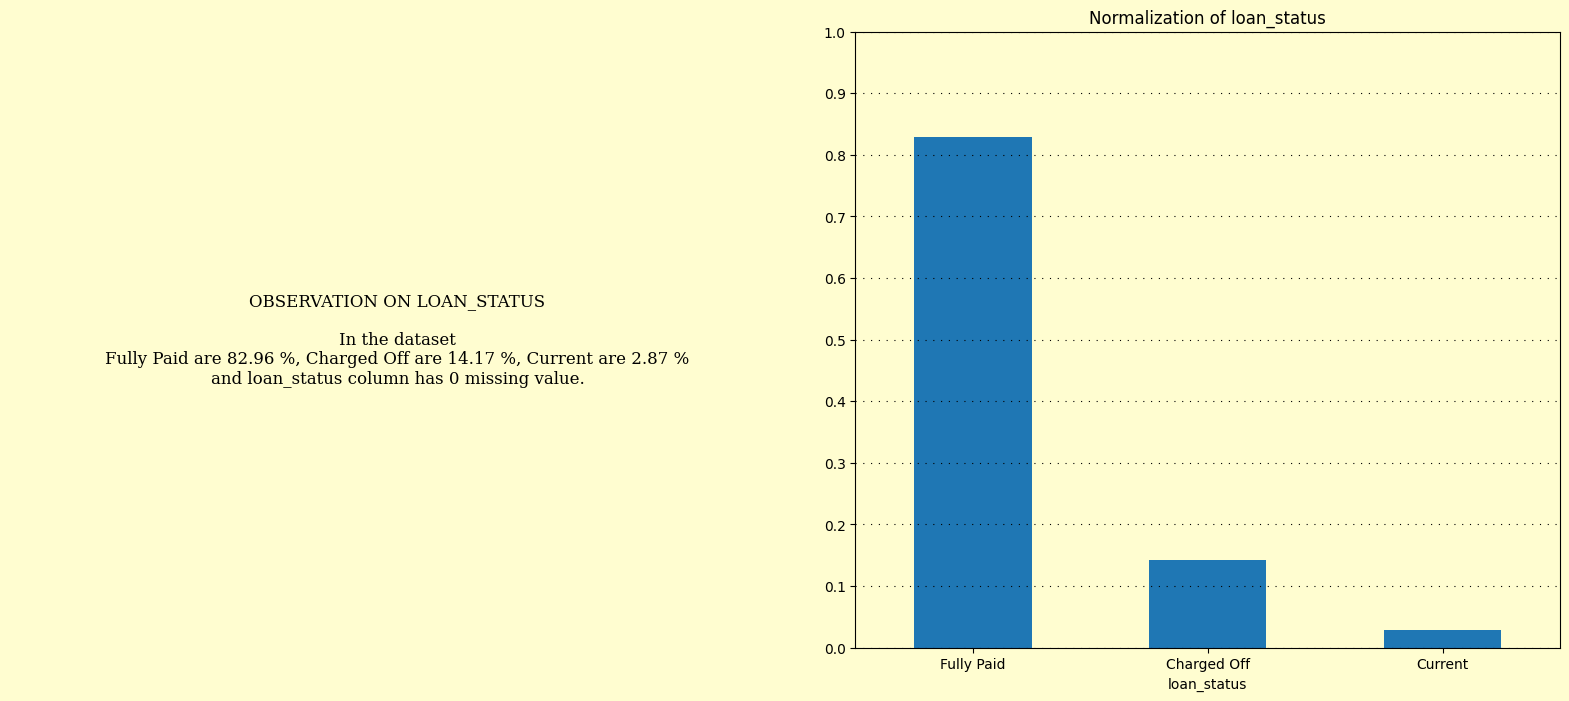

In [69]:
column_name_to_plot = ['loan_status']
bar_plot_with_text(lending_club, column_name_to_plot, text_bar_fig_size_x,
                   text_bar_fig_size_y, text_bar_sec_1_x, text_bar_sec_1_y)

# ***OBSERVATION***

*   This version maintains clarity in the observation while providing a more nuanced perspective on the potential removal of "Current" loan statuses from the dataset. It also emphasizes the importance of considering the broader context and objectives of the analysis before making decisions about data inclusion or exclusion.



# ***Data filter from updated Data set***
---

In [70]:
#Filter Loan Status column with 'Fully Paid' & 'Charged Off'
lending_club_load_paid_or_default = lending_club[lending_club['loan_status']
                                                 .isin(['Fully Paid', 'Charged Off'])]
lending_club_load_paid_or_default = lending_club_load_paid_or_default.reset_index(drop=True)
dataFrame_properties(lending_club_load_paid_or_default, null_check_percentage = 50)

******************** DataFrame Shape ********************
(38577, 20) 

******************** DataFrame Column Types ********************
loan_amnt                       int64
term                         category
int_rate                      float32
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                      int64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
revol_bal                       int64
revol_util                    float32
total_acc                       int64
year                            int64
month                           int64
dtype: object 

******************** DataFrame distribution summary ********************
       loan_am

##**Univariate Analysis**##
---


***1. Univariate Analysis on Numerical Variable***


Plot No.1



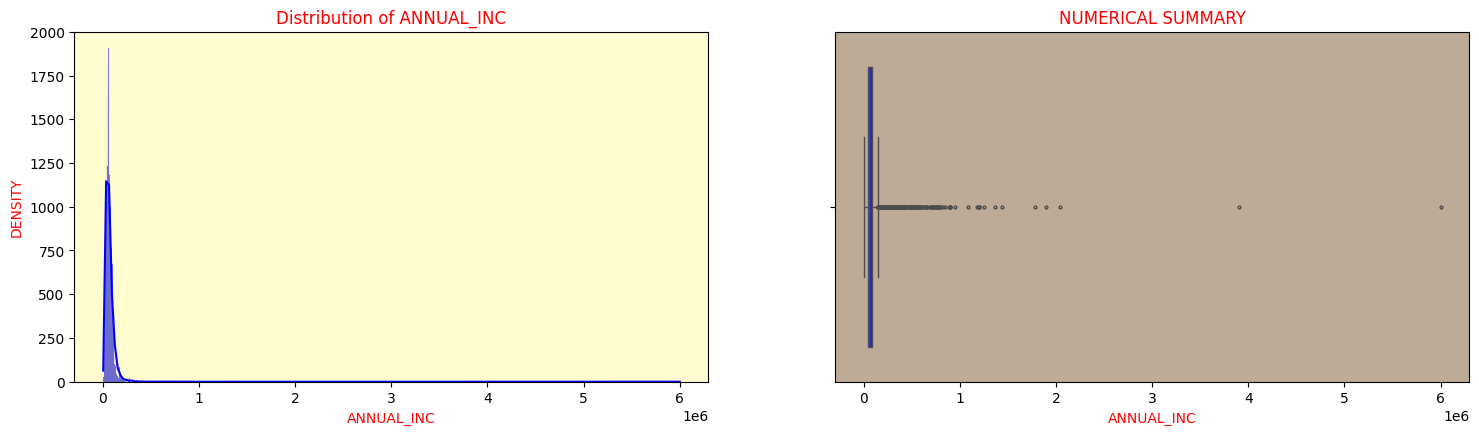


SUMMARY of annual_inc
Count: 38577
Min: 4000
Max: 6000000
Mean: 68777
5% Quantile: 24000
25% Quantile: 40000
Median (50%): 58868
75% Quantile: 82000
90% Quantile: 115000
99% Quantile: 234144
100% Quantile: 6000000

****************************************************************************************************

Plot No.2



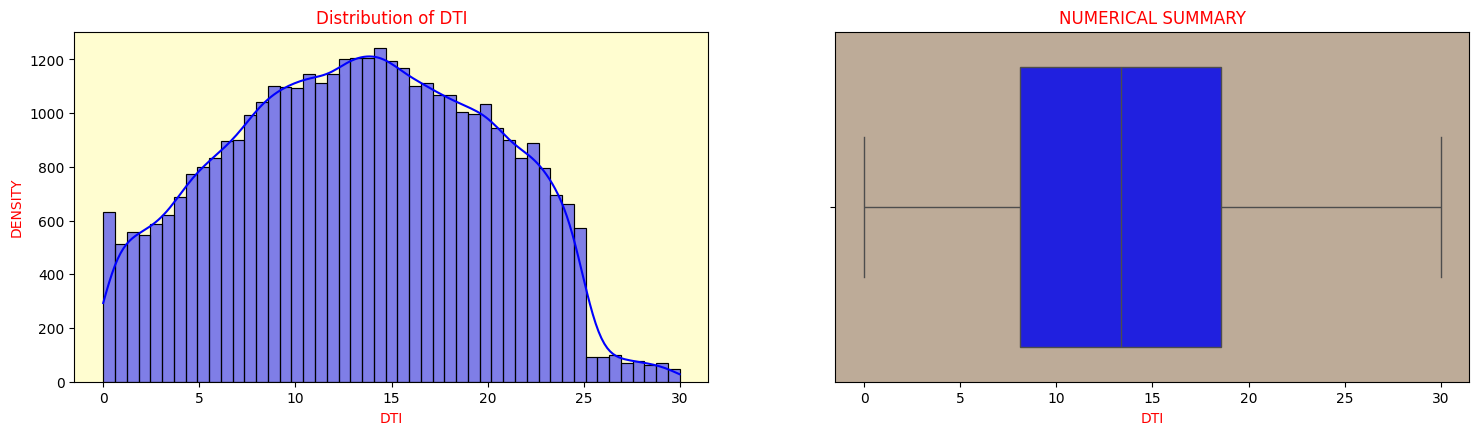


SUMMARY of dti
Count: 38577
Min: 0
Max: 29
Mean: 13
5% Quantile: 2
25% Quantile: 8
Median (50%): 13
75% Quantile: 18
90% Quantile: 22
99% Quantile: 26
100% Quantile: 29

****************************************************************************************************

Plot No.3



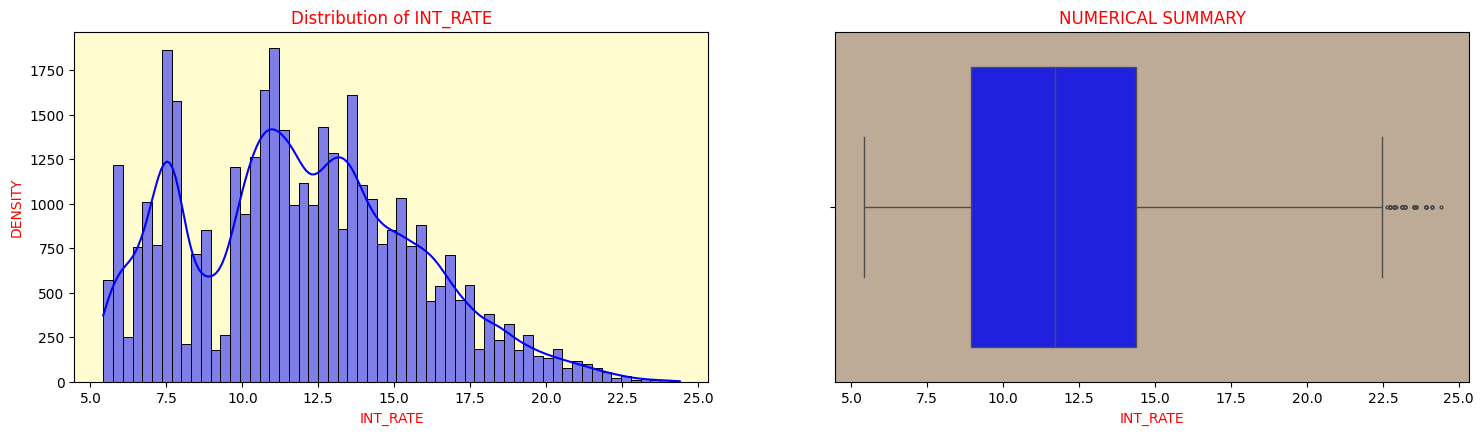


SUMMARY of int_rate
Count: 38577
Min: 5
Max: 24
Mean: 11
5% Quantile: 6
25% Quantile: 8
Median (50%): 11
75% Quantile: 14
90% Quantile: 16
99% Quantile: 20
100% Quantile: 24

****************************************************************************************************

Plot No.4



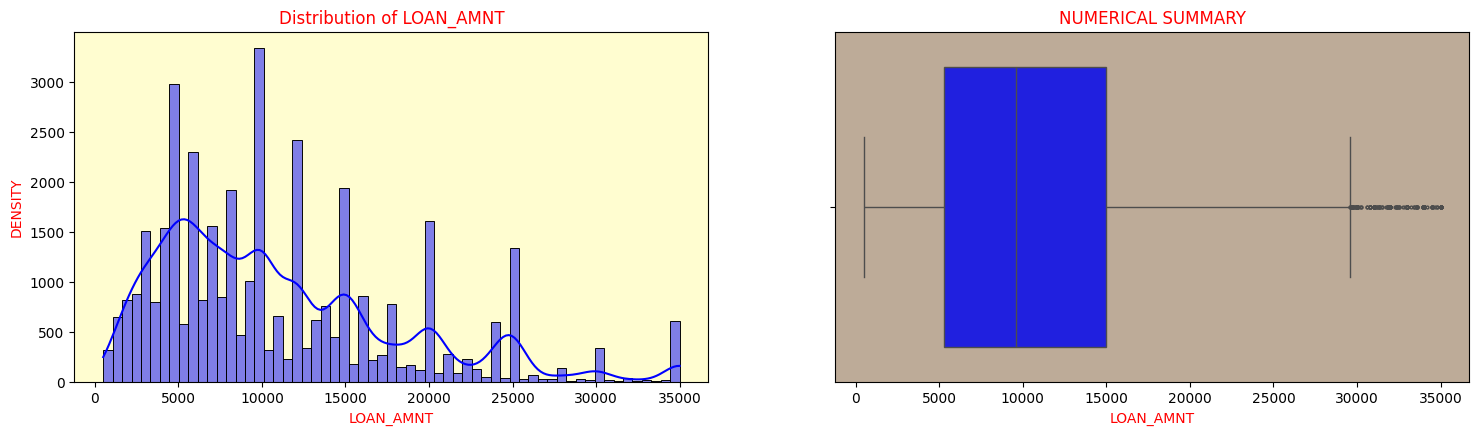


SUMMARY of loan_amnt
Count: 38577
Min: 500
Max: 35000
Mean: 11047
5% Quantile: 2400
25% Quantile: 5300
Median (50%): 9600
75% Quantile: 15000
90% Quantile: 21600
99% Quantile: 35000
100% Quantile: 35000

****************************************************************************************************

Plot No.5



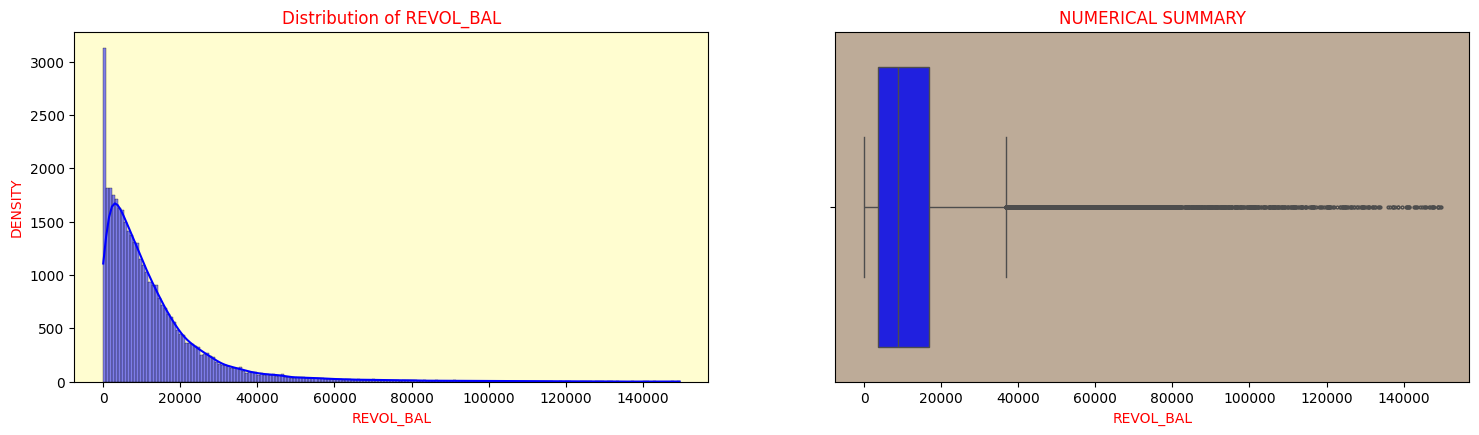


SUMMARY of revol_bal
Count: 38577
Min: 0
Max: 149588
Mean: 13289
5% Quantile: 312
25% Quantile: 3650
Median (50%): 8762
75% Quantile: 16912
90% Quantile: 28972
99% Quantile: 83276
100% Quantile: 149588

****************************************************************************************************

Plot No.6



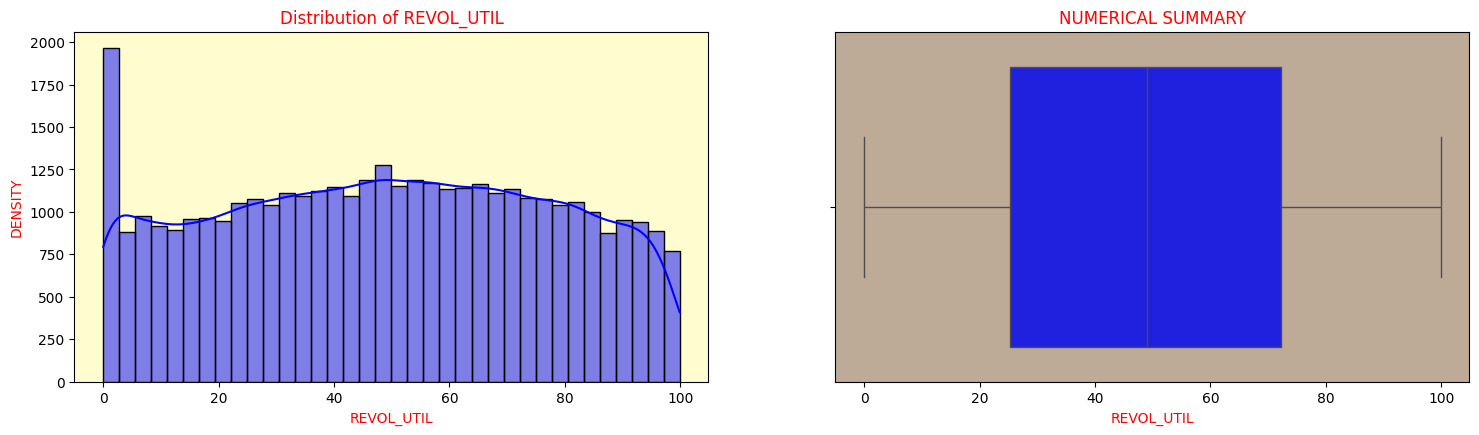


SUMMARY of revol_util
Count: 38577
Min: 0
Max: 99
Mean: 48
5% Quantile: 2
25% Quantile: 25
Median (50%): 49
75% Quantile: 72
90% Quantile: 87
99% Quantile: 98
100% Quantile: 99

****************************************************************************************************

Plot No.7



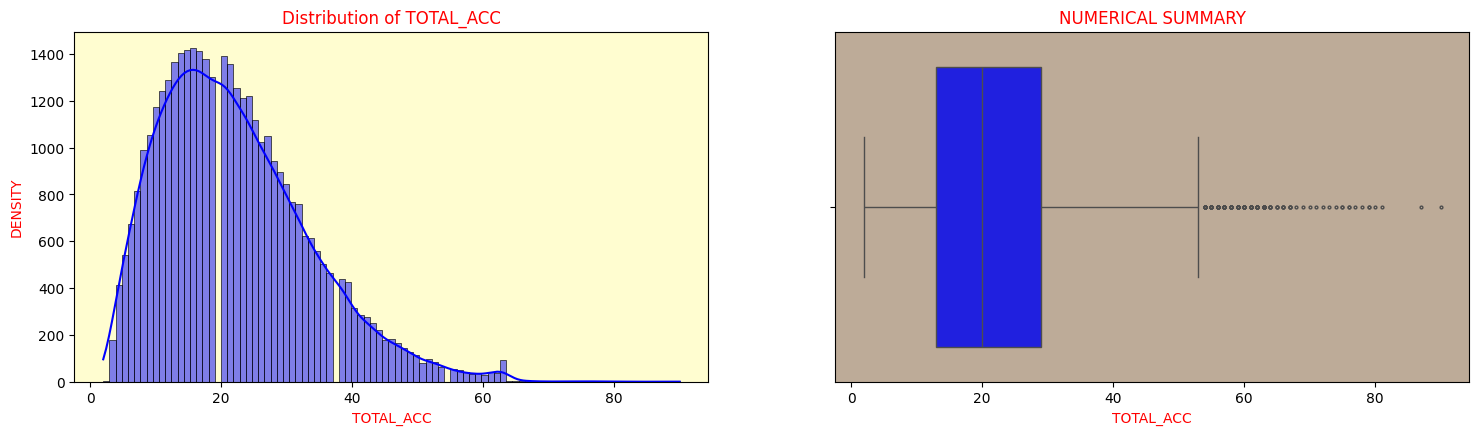


SUMMARY of total_acc
Count: 38577
Min: 2
Max: 90
Mean: 22
5% Quantile: 7
25% Quantile: 13
Median (50%): 20
75% Quantile: 29
90% Quantile: 38
99% Quantile: 56
100% Quantile: 90

****************************************************************************************************


In [71]:
column_name_to_plot = sorted(numerical_columns)
dist_box_plot(lending_club_load_paid_or_default, column_name_to_plot,
              dist_box_fiz_size_x, dist_box_fiz_size_y)

# *Interpretation*
---
1. **Annual_inc** - `contains the data of the borrower's annual income, which can indicate their ability to repay the loan.`

  - The distribution is right skewed, meaning there are more borrowers towards the lower end of the income spectrum. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - The minimum annual income is 4,000 and the maximum is 6,000,000. However, the 99th percentile is only $234,144, which means that a very small number of borrowers have very high incomes.
  - The median annual income is 58,868. This means that half of the borrowers have an income below 58,868 and the other half have an income above 58,868.
  - The interquartile range (IQR) is 42,000 (82,000 - 40,000). This means that the middle 50% of borrowers have incomes within 42,000 of the median.
  - Overall, it appears that the borrowers in this dataset have a wide range of incomes, but the majority fall on the lower end


2. **dti** - `This measures the borrower's monthly debt payments relative to their income, a key indicator of financial health and risk.`
  - The distribution is right skewed, meaning there are more borrowers with lower DTI ratios. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - The minimum DTI ratio is 0 and the maximum is 29. However, the 99th percentile is only 26, which means that a very small number of borrowers have very high DTI ratios.
  - The median DTI ratio is 13. This means that half of the borrowers have a DTI ratio below 13 and the other half have a DTI ratio above 13.
  - The interquartile range (IQR) is 10 (18 - 8). This means that the middle 50% of borrowers have DTI ratios within 10 of the median.

3. **int_rate** - `Higher rates may be associated with higher risk loans`
  - The distribution is right skewed, meaning there are more loans with lower interest rates. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - The minimum interest rate is 5% and the maximum is 24%. However, the 99th percentile is only 20%, which means that a very small number of loans have very high interest rates.
  - The median interest rate is 11%. This means that half of the loans have an interest rate below 11% and the other half have an interest rate above 11%.
  - The interquartile range (IQR) is 6 (14 - 8). This means that the middle 50% of loans have interest rates within 6% of the median.
  - Generally, a lower interest rate is considered more favorable for the borrower. Based on the data provided, most loans in this dataset appear to have interest rates on the lower end. This may be positive for borrowers, as it suggests they are getting relatively good rates on their loans.

4. **loan_amnt** - `The amount of the loan applied for, which might affect the likelihood of default`
  - Right-skewed distribution: The distribution of loan amounts is right-skewed, meaning there are more borrowers applying for smaller loan amounts. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - Most loans are below 22,000: The 90th percentile of loan amounts is 21,600, which means that 90% of borrowers applied for loans less than or equal to this amount.
  - A small number of high-value loans: The maximum loan amount is 35,000, but the 99th percentile is only 35,000, which means that a very small number of borrowers applied for loans between 22,000 and 35,000.
  
5. **revol_bal** - `Reflects credit card balance`
  - Right-skewed distribution: The distribution of credit card balances is right-skewed, meaning there are more borrowers with lower credit card balances. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - Most borrowers have low credit card balances: The 90th percentile of credit card balances is 28,972, which means that 90% of borrowers have credit card balances less than or equal to this amount.
  - A small number of borrowers with very high balances: The maximum credit card balance is 149,588, but the 99th percentile is only 83,276, which means that a very small number of borrowers have credit card balances between 28,972 and 149,588.
  - Having a high credit card balance can be a sign of financial stress and can also lead to higher interest charges.  Based on the data provided, most borrowers in this dataset appear to have manageable credit card balances.

6. **revol_util** - `Utilization rate, indicating credit management behavior`
  - Right-skewed distribution: The distribution of credit card utilization rate is right-skewed, meaning there are more borrowers with lower credit utilization rates. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - Most borrowers utilize less than half of their credit limit: The median credit card utilization rate is 49%, which means that half of the borrowers utilize less than 49% of their available credit limit.
  - A small number of borrowers with very high utilization: The maximum credit utilization rate is 99%, but the 90th percentile is only 87%, which means that a very small number of borrowers utilize more than 87% of their available credit limit.
  - A high credit utilization rate can be a sign of financial stress and can also negatively impact credit scores. Based on the data provided, most borrowers in this dataset appear to have good credit management behavior, as evidenced by their utilization rates.

7. **total_acc** - `Total number of credit lines, which can give insight into the borrower's credit experience.`
  - Right-skewed distribution: The distribution of the total number of credit lines is right-skewed, meaning there are more borrowers with a lower number of credit lines. This can be seen in the histogram where the bars are taller on the left side of the chart.
  - Most borrowers have a moderate number of credit lines: The median number of credit lines is 20, and the 75th percentile is 29. This suggests that most borrowers in this dataset have a moderate number of credit lines.
  - A small number of borrowers with a very high number of credit lines: The maximum number of credit lines is 90, but the 99th percentile is only 56, which means that a very small number of borrowers have more than 56 credit lines.
  - The number of credit lines a borrower has can be a factor in determining their creditworthiness. Borrowers with a very high number of credit lines may be seen as a higher risk, as it may suggest they are overextended.

# **Outlier Treatment**
---
1. `annual_inc` - In this column there is hug gap between 99 percentile and upper hinge, So we decided to drop more than 99 percentile
2. `revol_bal` - In this column there is hug gap between 99 percentile and upper hinge, So we decided to drop more than 99 percentile


In [72]:
#Removing Outliers in Annual Income and Revol_bal
lending_club_load_paid_or_default_clean_data = lending_club_load_paid_or_default[
    (lending_club_load_paid_or_default['annual_inc']
    <
    lending_club_load_paid_or_default['annual_inc'].quantile(0.99))
    &
    (lending_club_load_paid_or_default['revol_bal']
    <
    lending_club_load_paid_or_default['revol_bal'].quantile(0.99))]

lending_club_load_paid_or_default_clean_data = lending_club_load_paid_or_default_clean_data.reset_index(drop=True)

# **2. Univariate Analysis on Categorical Variables**


Plot No.1



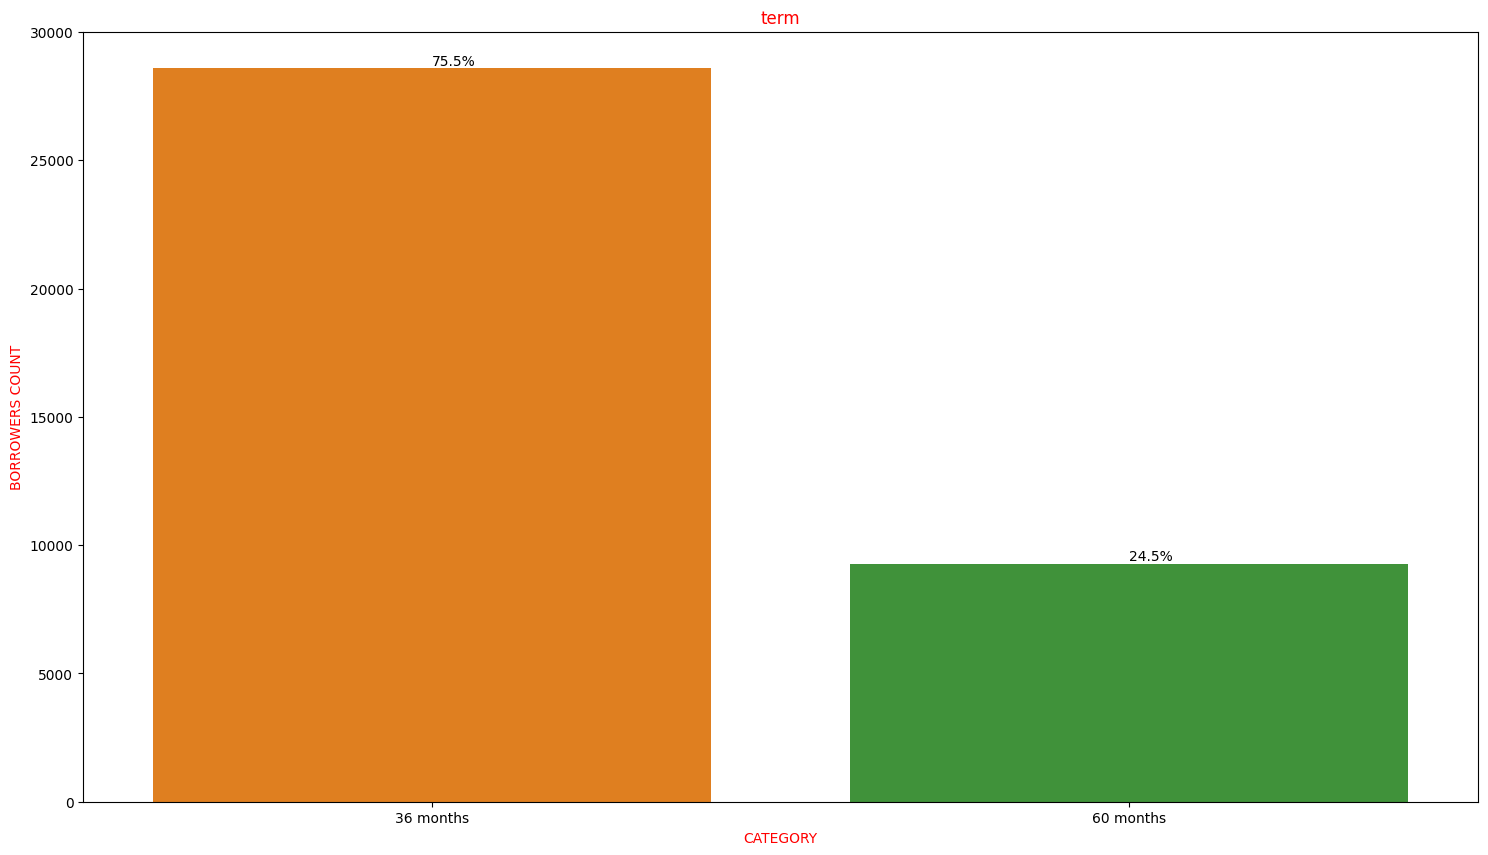


SUMMARY of TERM
36 months are 28578 
60 months are 9269 

******************************************************************************************************************************************************

Plot No.2



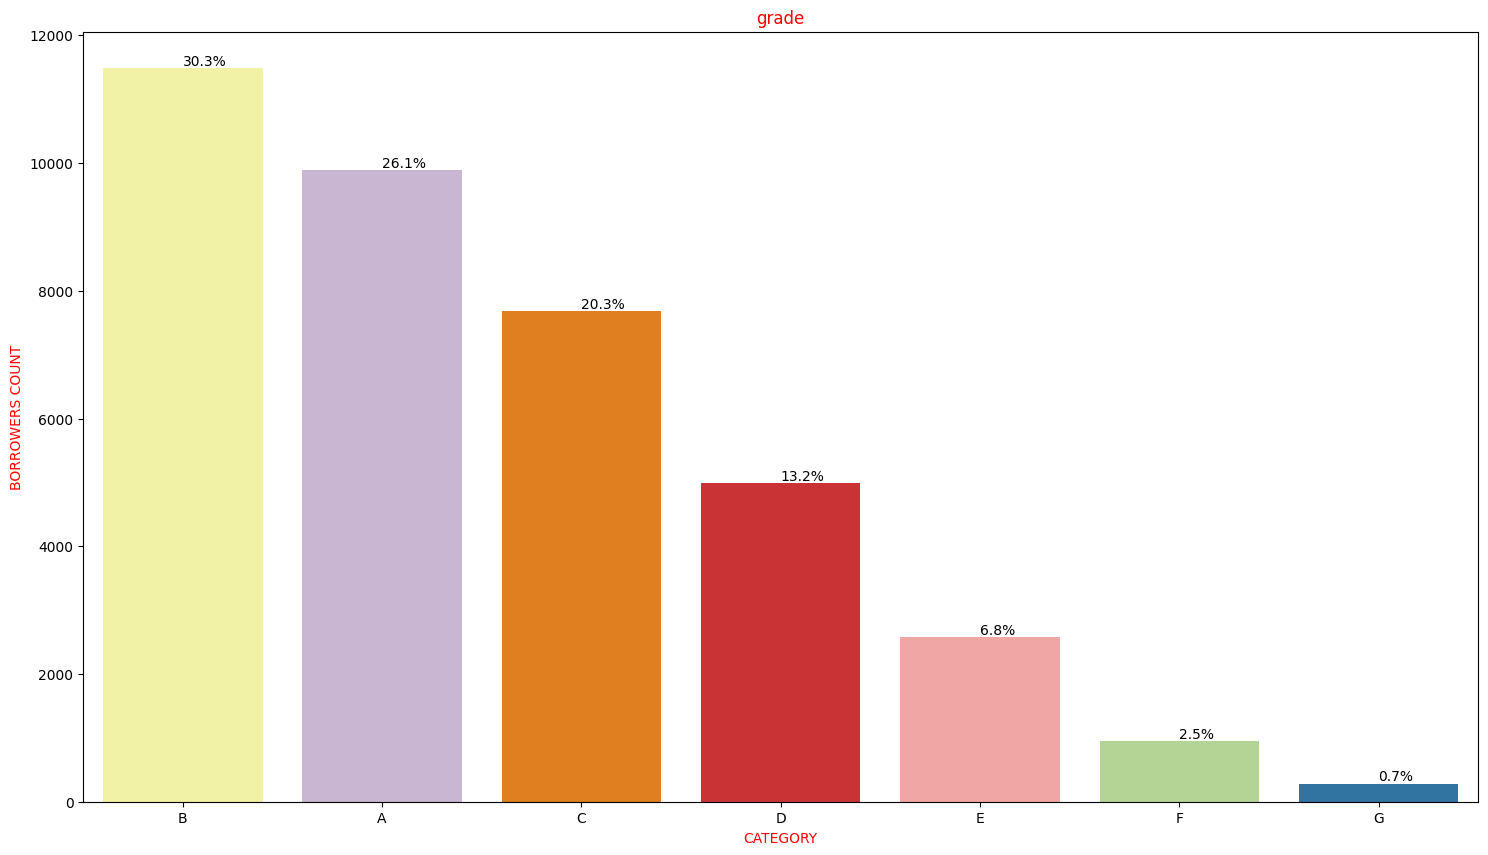


SUMMARY of GRADE
B are 11483 
C are 7683 
A are 9889 
E are 2580 
F are 944 
D are 4985 
G are 283 

******************************************************************************************************************************************************

Plot No.3



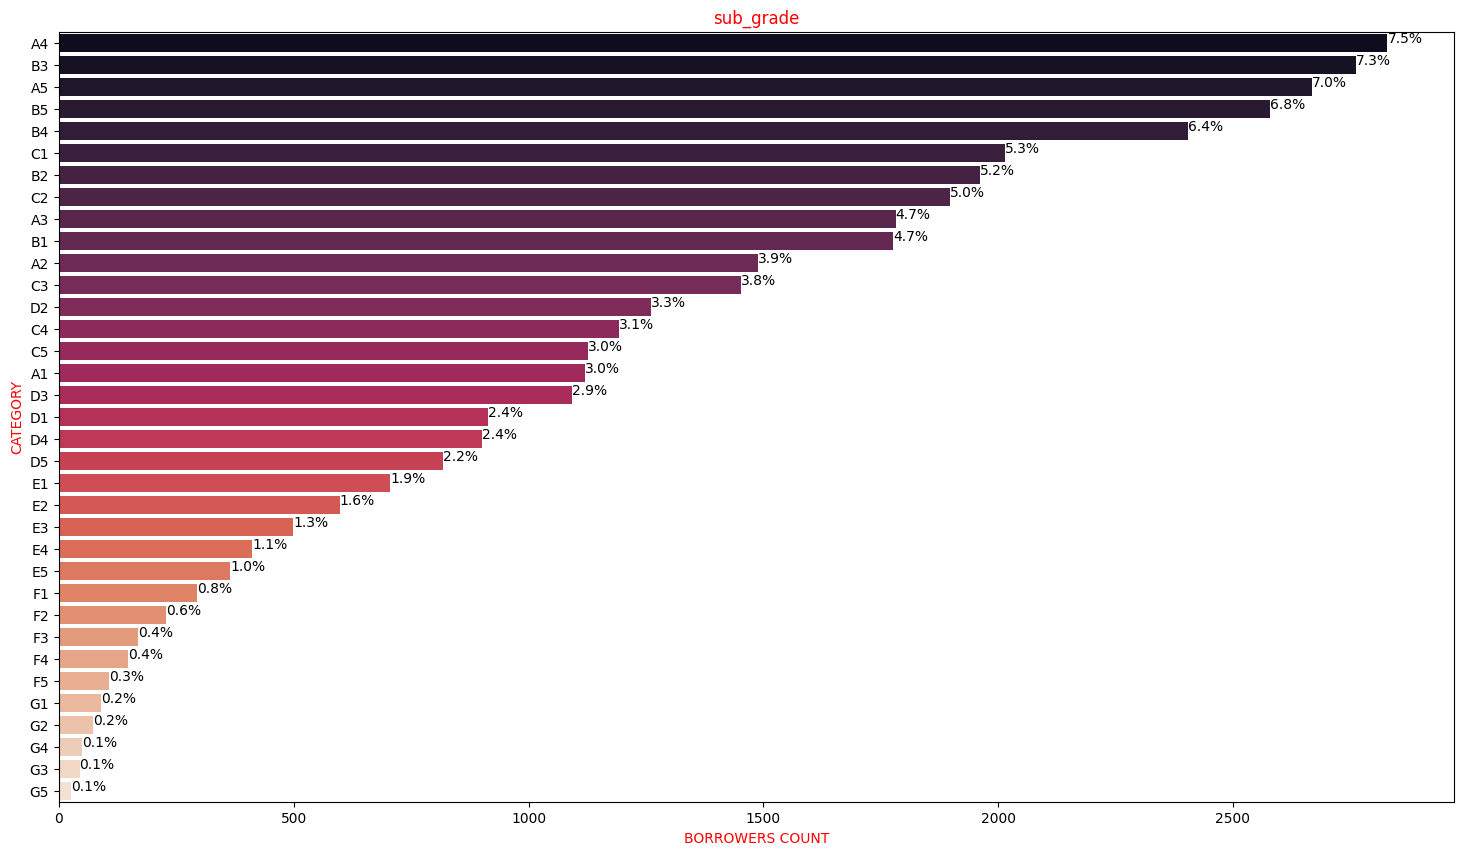


SUMMARY of SUB_GRADE
B2 are 1961 
C4 are 1192 
C5 are 1127 
C1 are 2014 
A4 are 2829 
E1 are 706 
F2 are 228 
B5 are 2579 
C3 are 1452 
B1 are 1776 
D1 are 914 
A1 are 1121 
B3 are 2762 
B4 are 2405 
C2 are 1898 
D2 are 1261 
A3 are 1782 
A5 are 2668 
D5 are 818 
A2 are 1489 
E4 are 412 
D3 are 1092 
D4 are 900 
F3 are 168 
E3 are 499 
F1 are 294 
E5 are 365 
G4 are 50 
E2 are 598 
G2 are 73 
G1 are 90 
F5 are 106 
F4 are 148 
G5 are 26 
G3 are 44 

******************************************************************************************************************************************************

Plot No.4



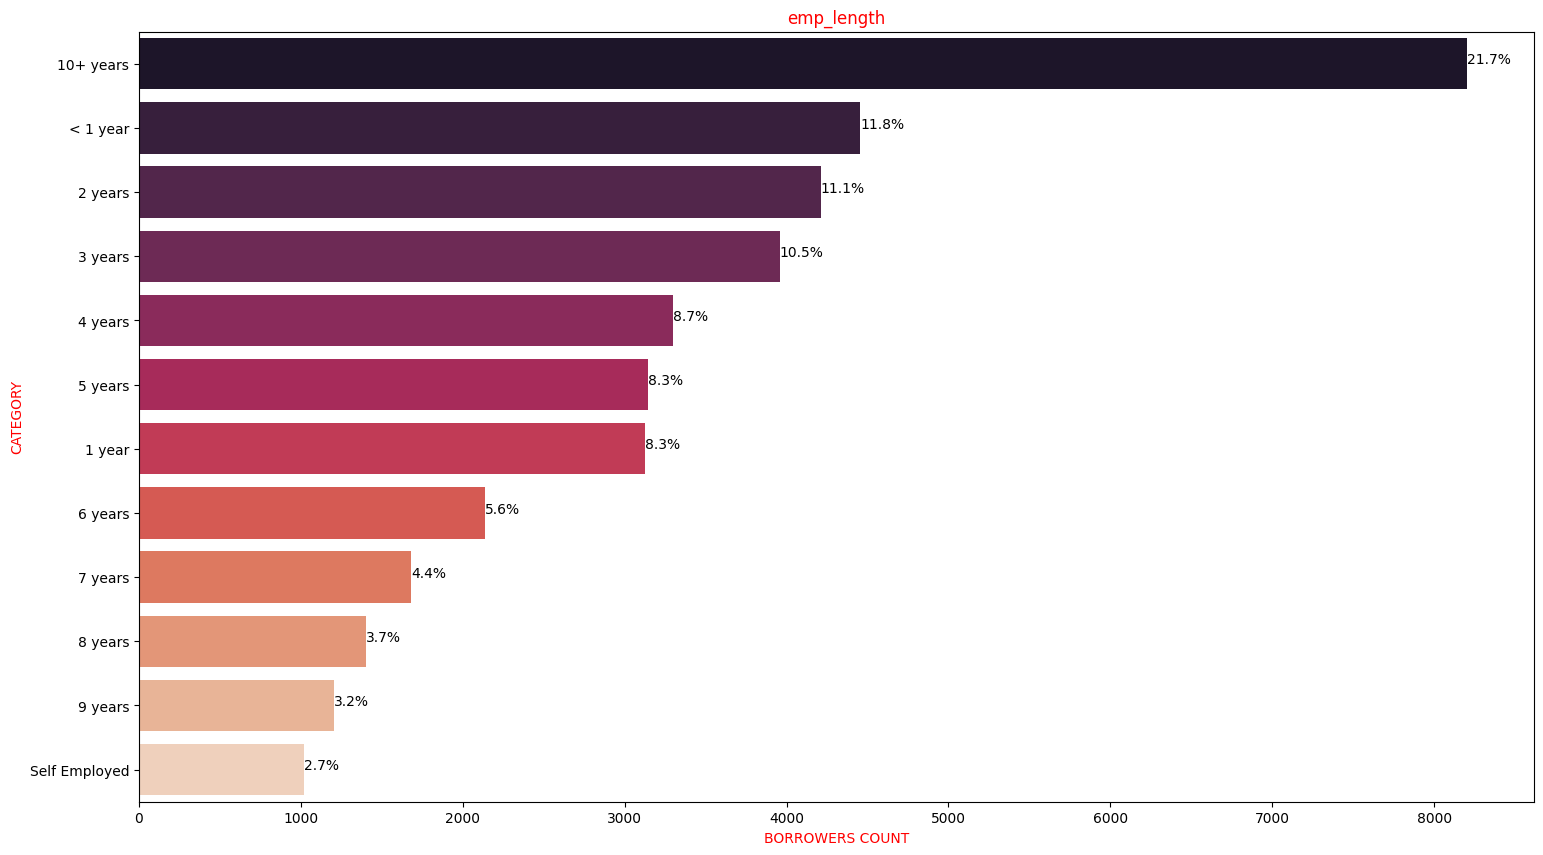


SUMMARY of EMP_LENGTH
10+ years are 8206 
< 1 year are 4456 
3 years are 3958 
8 years are 1405 
9 years are 1205 
4 years are 3299 
5 years are 3143 
1 year are 3129 
6 years are 2135 
2 years are 4211 
7 years are 1682 
Self Employed are 1018 

******************************************************************************************************************************************************

Plot No.5



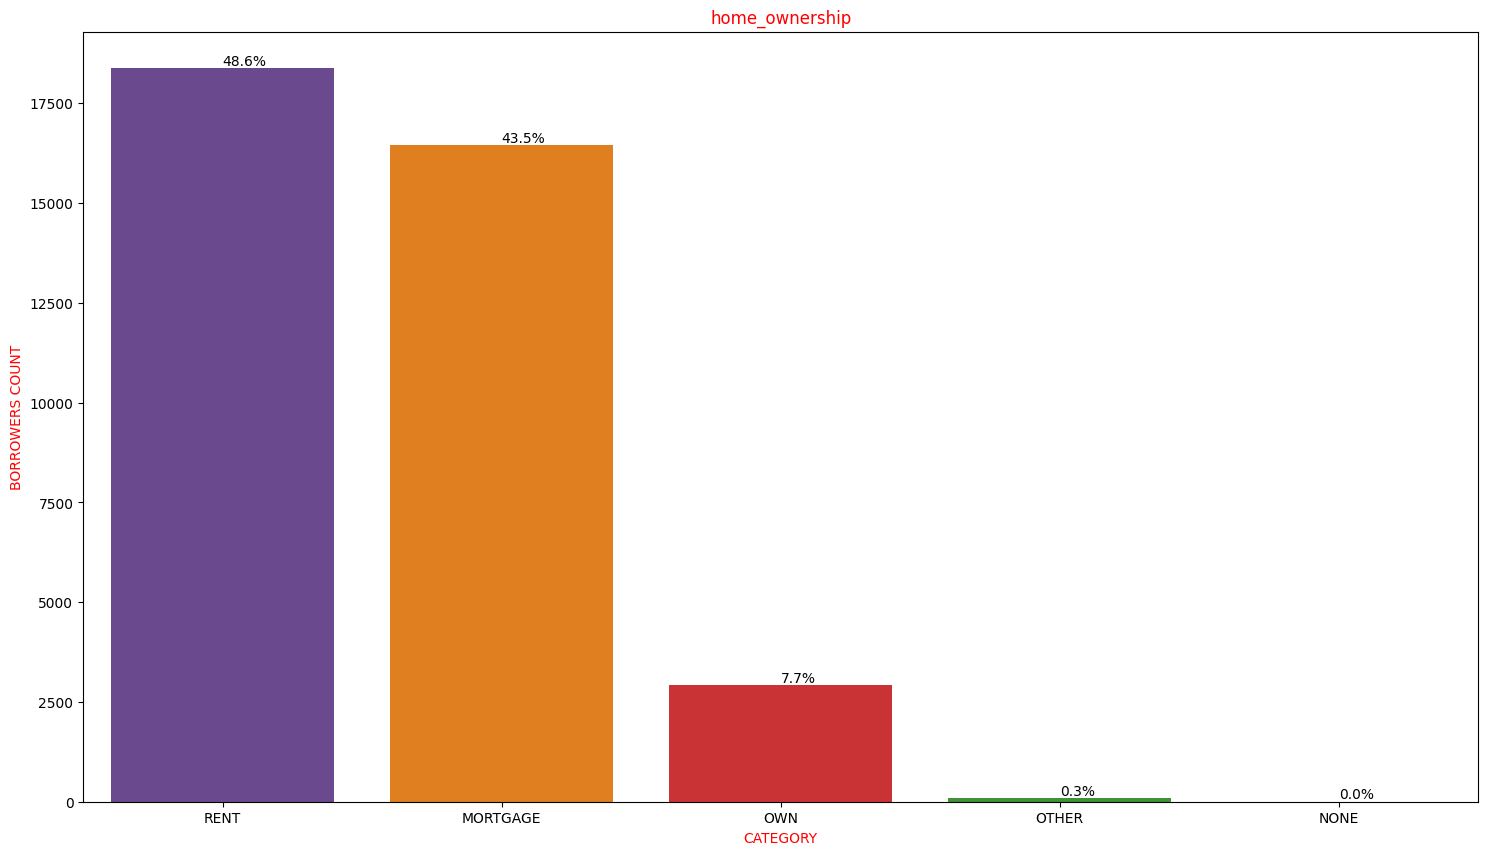


SUMMARY of HOME_OWNERSHIP
RENT are 18375 
OWN are 2920 
MORTGAGE are 16453 
OTHER are 96 
NONE are 3 

******************************************************************************************************************************************************

Plot No.6



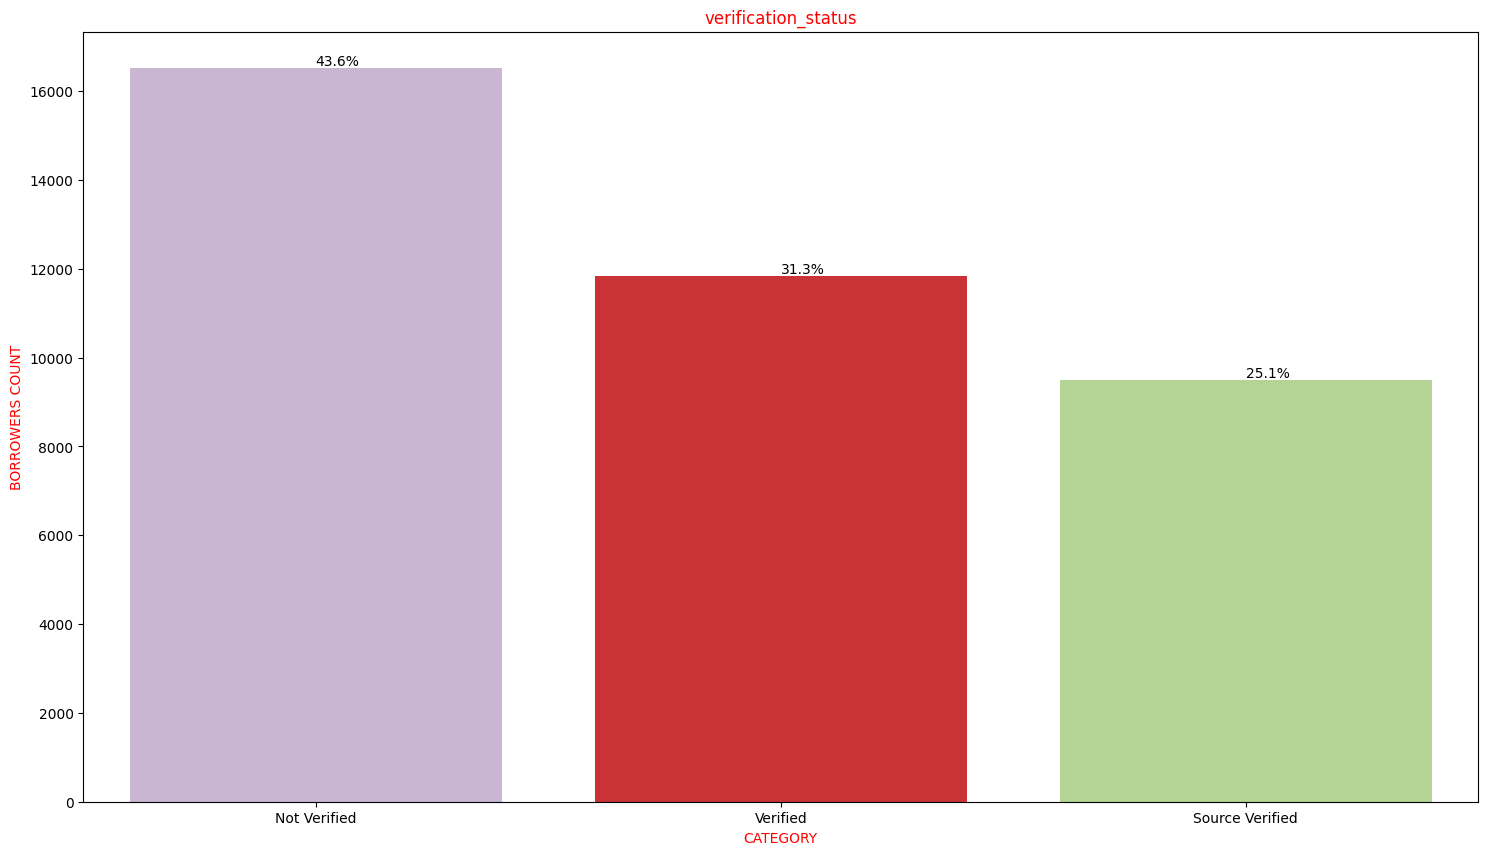


SUMMARY of VERIFICATION_STATUS
Verified are 11840 
Source Verified are 9494 
Not Verified are 16513 

******************************************************************************************************************************************************

Plot No.7



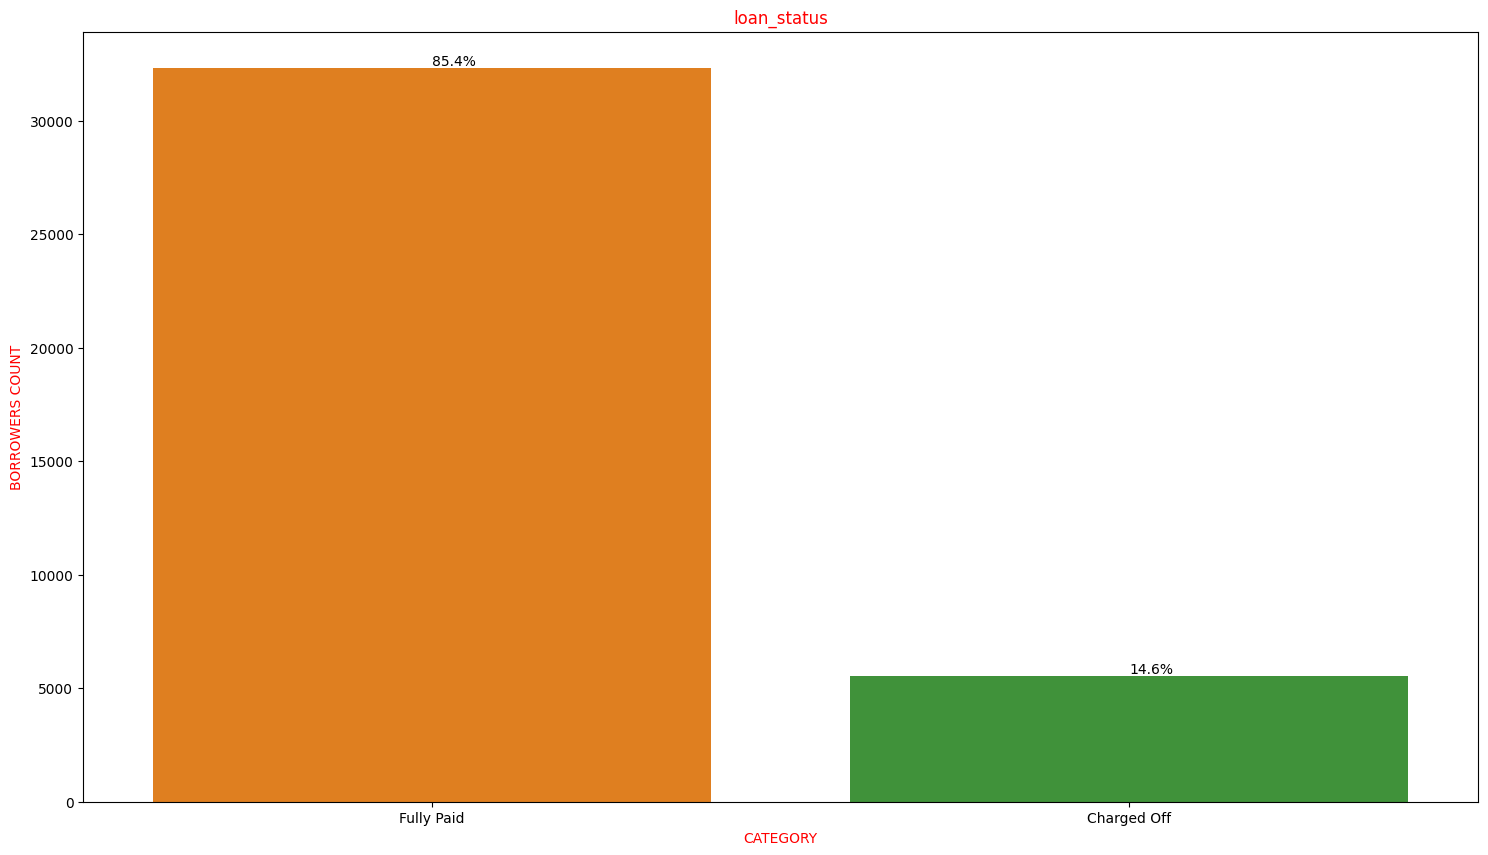


SUMMARY of LOAN_STATUS
Fully Paid are 32308 
Charged Off are 5539 

******************************************************************************************************************************************************

Plot No.8



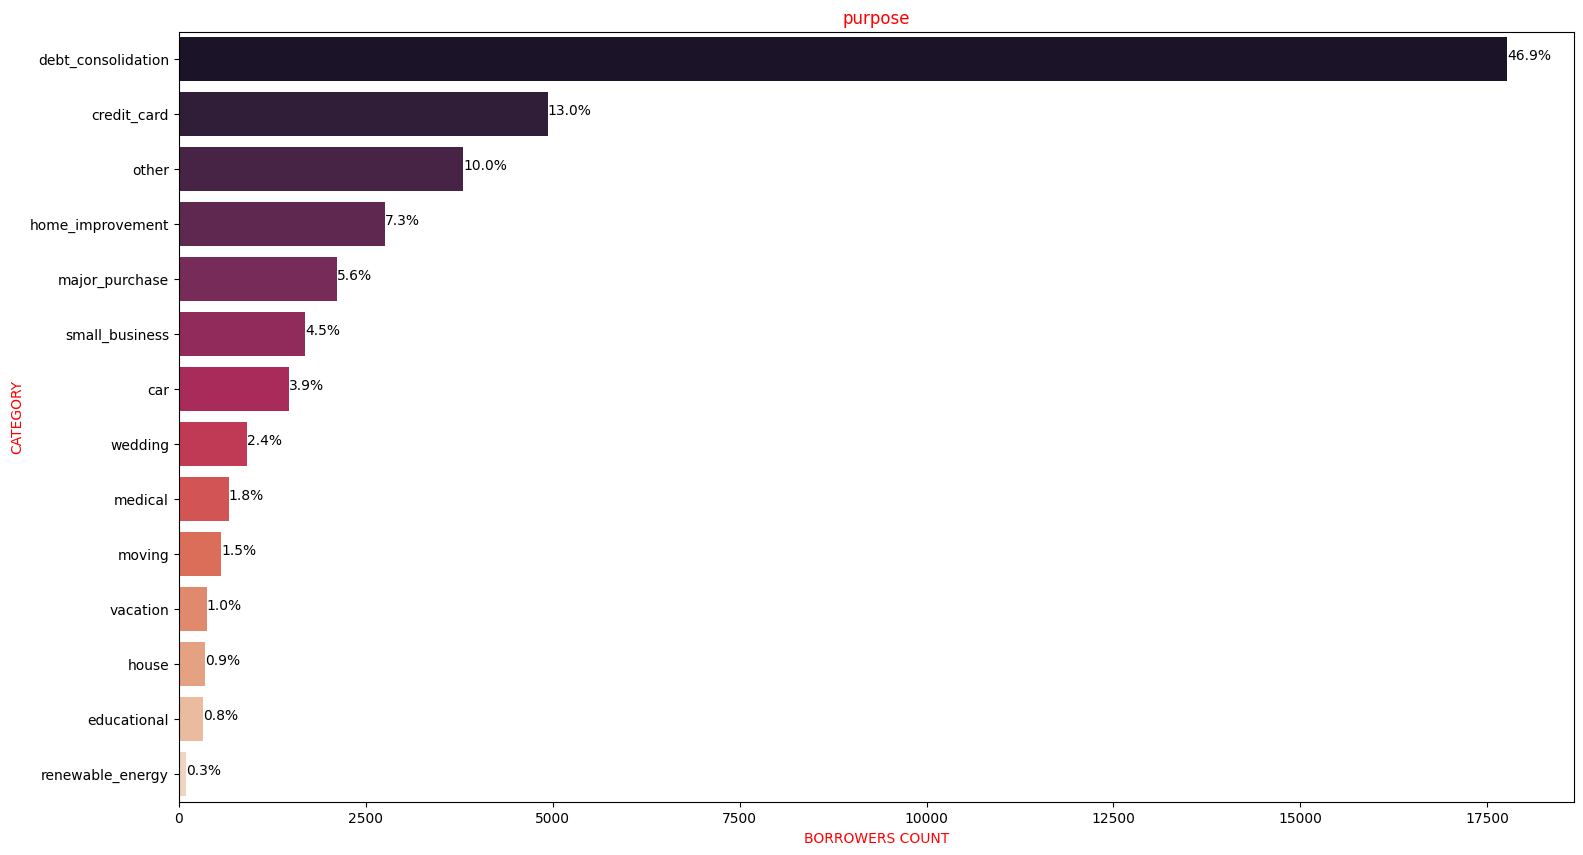


SUMMARY of PURPOSE
credit_card are 4932 
car are 1479 
small_business are 1694 
other are 3801 
wedding are 915 
debt_consolidation are 17767 
home_improvement are 2761 
major_purchase are 2112 
medical are 665 
moving are 570 
vacation are 375 
house are 356 
renewable_energy are 99 
educational are 321 

******************************************************************************************************************************************************

Plot No.9



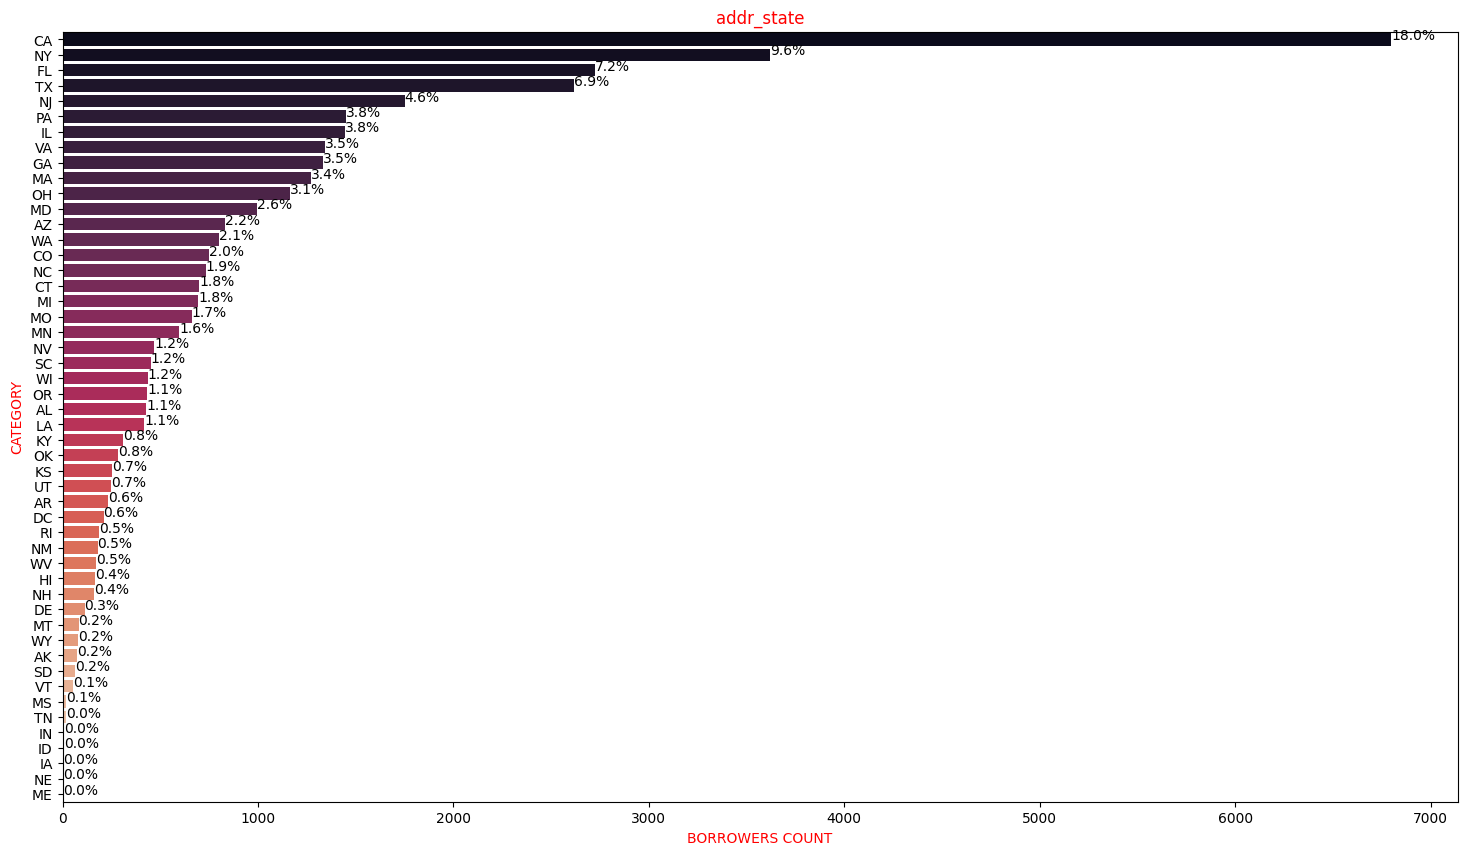


SUMMARY of ADDR_STATE
AZ are 829 
GA are 1333 
IL are 1445 
CA are 6798 
NC are 733 
TX are 2616 
VA are 1342 
MO are 662 
CT are 698 
UT are 250 
FL are 2723 
NY are 3619 
PA are 1452 
MN are 596 
NJ are 1751 
OR are 432 
KY are 308 
OH are 1165 
SC are 452 
RI are 188 
LA are 419 
MA are 1269 
WA are 799 
WI are 437 
AL are 429 
NV are 469 
AK are 76 
CO are 751 
MD are 997 
WV are 172 
VT are 52 
MI are 693 
DC are 210 
SD are 62 
NH are 163 
AR are 235 
NM are 179 
KS are 253 
HI are 165 
OK are 286 
MT are 82 
WY are 80 
DE are 113 
MS are 19 
TN are 17 
IA are 5 
NE are 5 
ID are 6 
IN are 9 
ME are 3 

******************************************************************************************************************************************************

Plot No.10



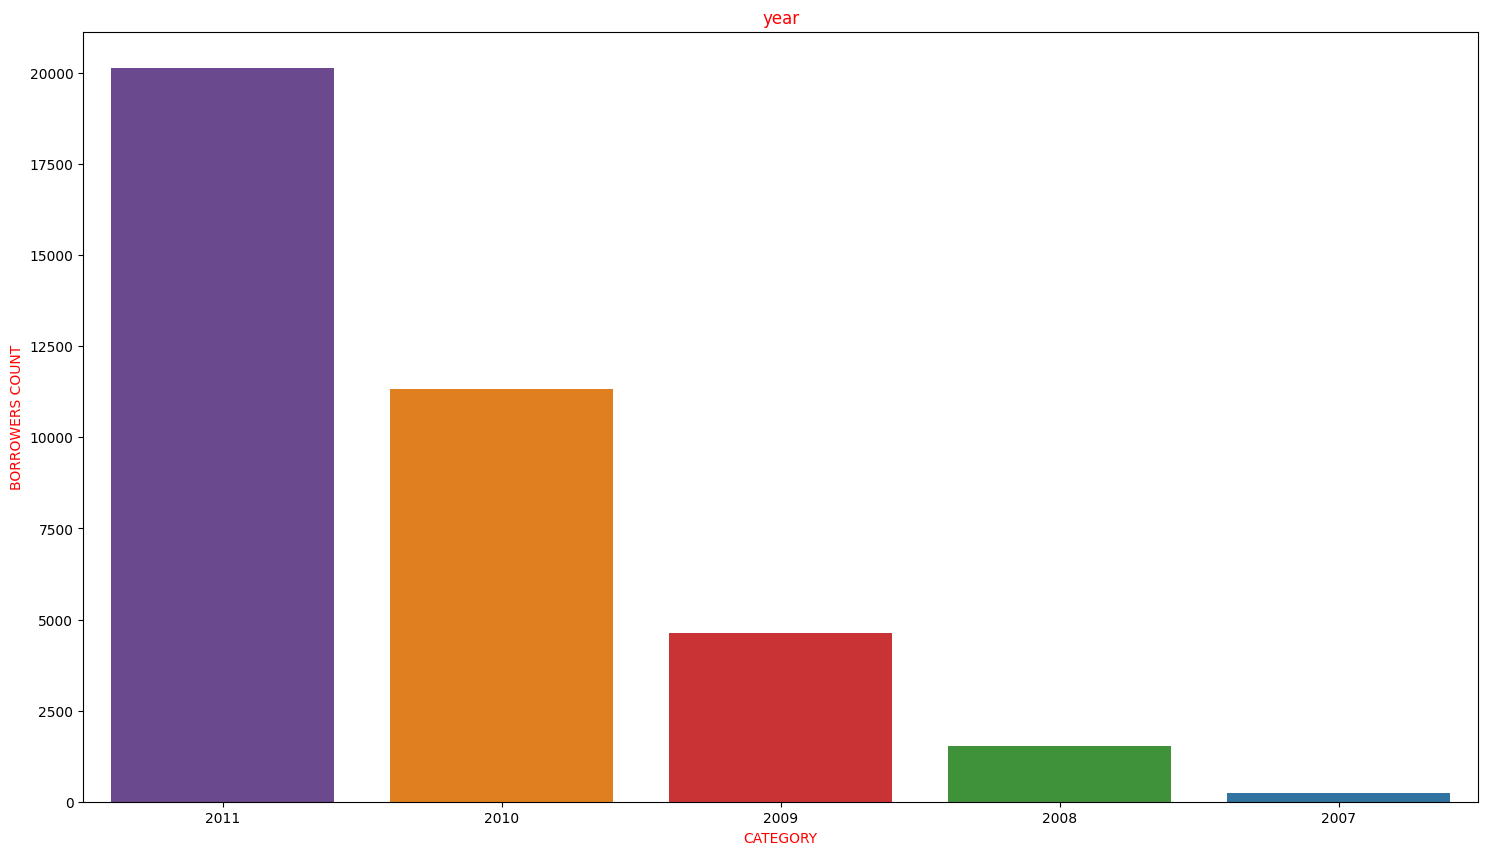


SUMMARY of YEAR
2011 are 20128 
2010 are 11317 
2009 are 4625 
2008 are 1533 
2007 are 244 

******************************************************************************************************************************************************

Plot No.11



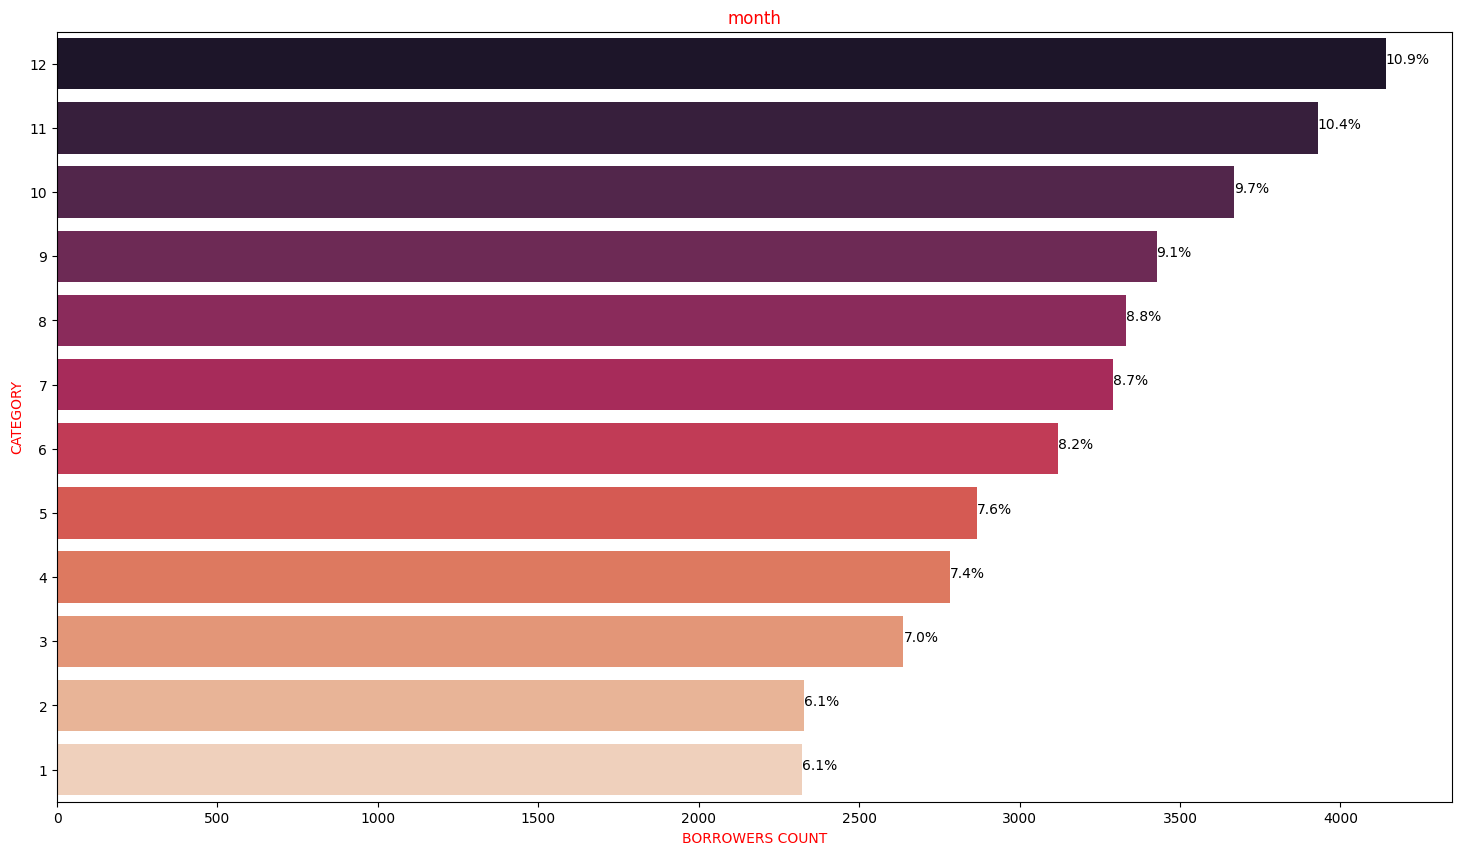


SUMMARY of MONTH
12 are 4141 
11 are 3929 
10 are 3670 
9 are 3427 
8 are 3332 
7 are 3291 
6 are 3120 
5 are 2867 
4 are 2784 
3 are 2638 
2 are 2327 
1 are 2321 

******************************************************************************************************************************************************

Plot No.12



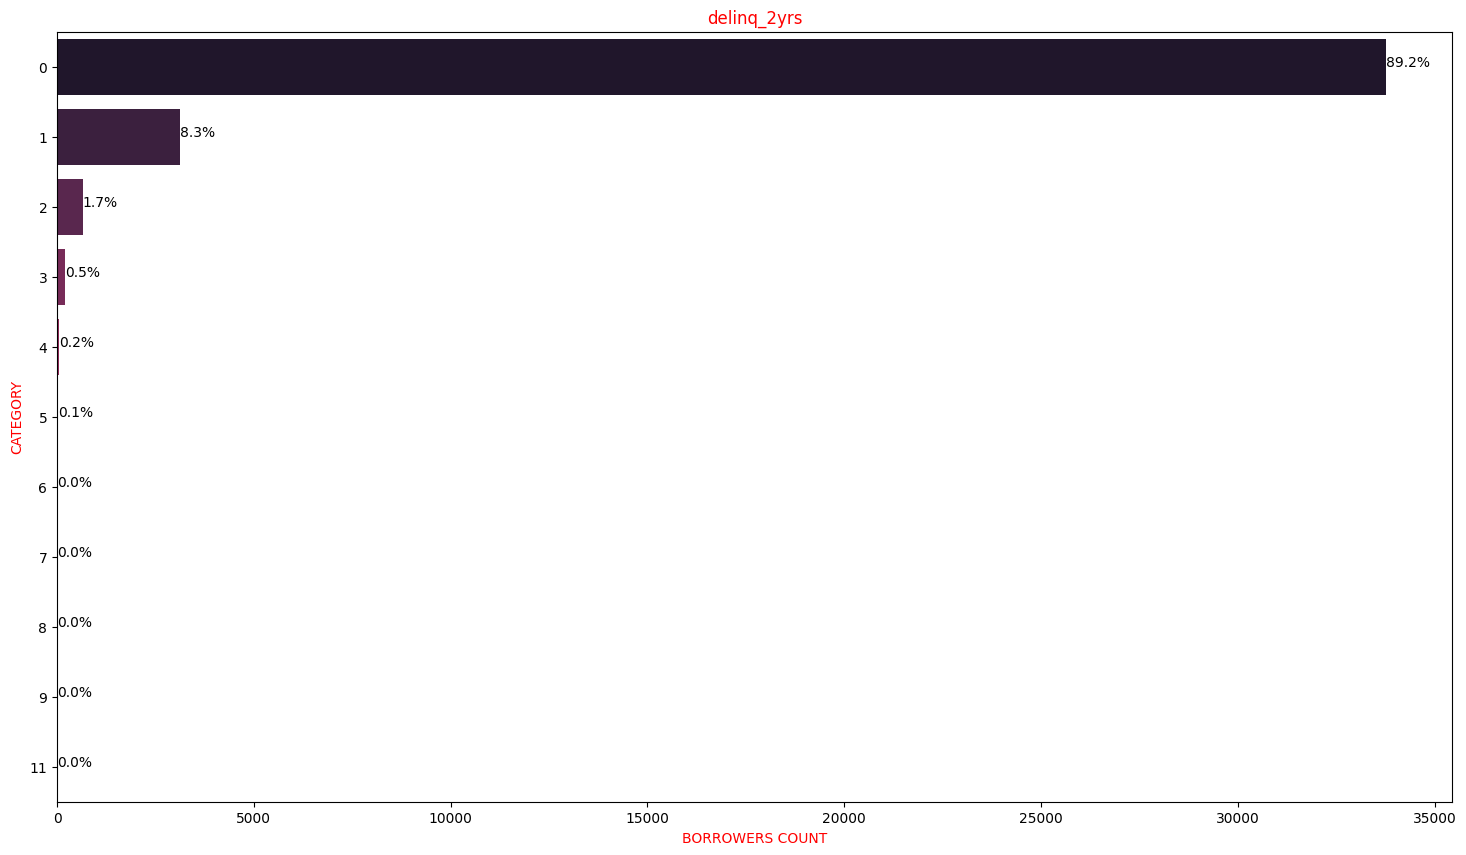


SUMMARY of DELINQ_2YRS
0 are 33756 
2 are 653 
3 are 206 
1 are 3135 
4 are 58 
6 are 10 
5 are 21 
8 are 2 
7 are 4 
9 are 1 
11 are 1 

******************************************************************************************************************************************************


In [73]:
# Use list comprehension to conditionally assign values based on number of unique elements
bars_color = ['rocket' if lending_club_load_paid_or_default_clean_data[col].nunique() > 7
              else 'Paired_r' for col in categorical_columns]

column_name_to_plot = categorical_columns
plot_title = categorical_columns

count_axis_nohue_nosupport_column(lending_club_load_paid_or_default_clean_data,
                                   column_name_to_plot, bars_color,
                                   plot_title)

# *Interpretation*

---

**1. Term**: The data suggests a strong preference for shorter loan maturities (36 months) by a significant margin (75.5%). This indicates potential risk aversion among borrowers, prioritizing faster repayment despite potentially higher monthly payments. Financially, this translates to lower total interest expense but a potentially higher debt service ratio in the short term.

**2. Grade & Sub-Grade**: Grade B does have a higher concentration of borrowers (30.3%), suggesting a moderate credit risk. However, the sub-grade data reveals a granular picture. A4 (within Grade A) has the highest risk (7.5%), followed by B3 (within Grade B). This highlights the importance of considering sub-grades for a more precise understanding of a borrower's creditworthiness.

**3. Emp_Length**: The significant number of borrowers with 10+ years of employment (21.7%) indicates a preference for lenders towards borrowers with a history of stable income and potentially lower default risk. This is a positive indicator for loan repayment potential.

**4. Home_Ownership**: The distribution between renters (48.6%) and homeowners (43.5%) is interesting. While renters might have less collateral (assets used to secure loans), homeowners might have competing financial obligations tied to their mortgages. Lenders would need to assess other factors alongside homeownership status.

**5. Verification_Status**: The high percentage of unverified borrowers (43.6%) is concerning. Loan verification typically involves confirming income and employment information. Unverified loans might carry a higher risk of default due to potential inaccuracies in the application.

**6. Loan_Status**: The high number of fully paid loans (85%) is a positive sign, indicating a responsible borrower pool and successful loan management. This demonstrates a good track record of debt repayment.

**7. Purpose**: Debt consolidation being the most common loan purpose (47%) suggests borrowers are using loans to manage existing debt. This can be a positive strategy if it reduces overall interest rates and simplifies debt management. However, lenders would need to assess if the borrower has the capacity to handle additional debt burden.

**8. Addr_State & Year**: While the concentration of borrowers in a specific state (CA) and year (2011) might be interesting geographically and temporally, it's difficult to draw significant financial conclusions without additional context.

**9. Month**: The peak in loan applications during December (10.9%) could be due to seasonal factors like holiday spending or year-end financial planning.

**10. Delinquency_2 Years**: The high percentage of borrowers with no delinquencies in the past 2 years (89.2%) is very positive. This indicates a low default rate.

# ***Bivariate Analysis***

---



In [74]:
remove_item = ['sub_grade', 'addr_state', 'year', 'month', 'delinq_2yrs']
for i in remove_item:
  categorical_columns.remove(i)
categorical_list = categorical_columns
print(categorical_list)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']


***1. term, grade, loan_status on month & year individually***


Plot No.1



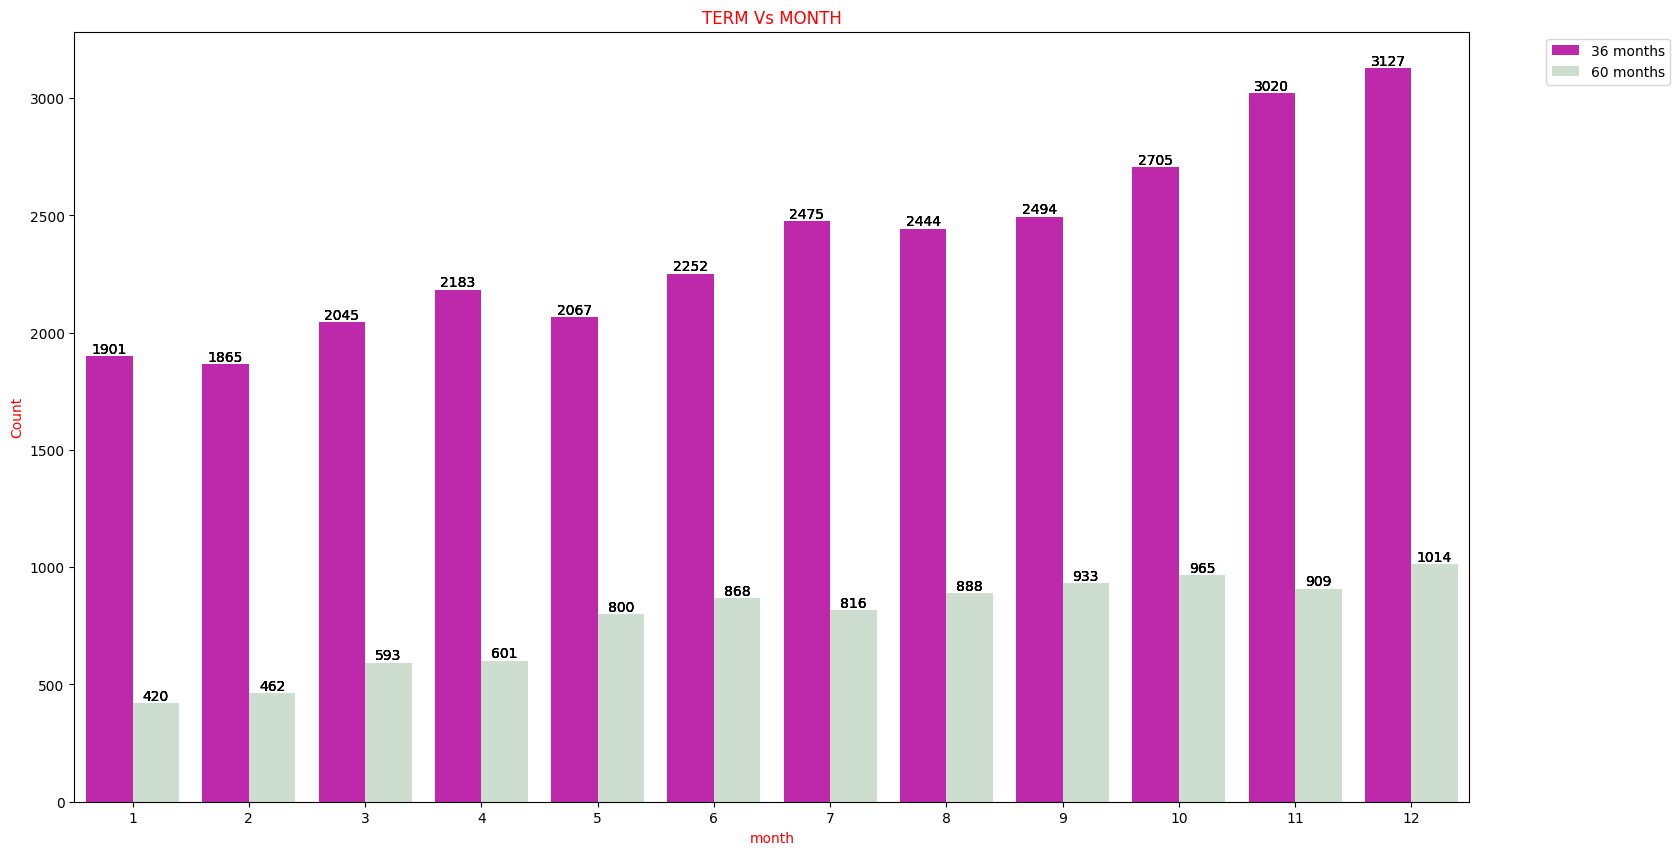


SUMMARY of MONTH with 36 MONTHS
1: 6.65 %,
2: 6.53 %,
3: 7.16 %,
4: 7.64 %,
5: 7.23 %,
6: 7.88 %,
7: 8.66 %,
8: 8.55 %,
9: 8.73 %,
10: 9.47 %,
11: 10.57 %,
12: 10.94 %


SUMMARY of MONTH with 60 MONTHS
1: 4.53 %,
2: 4.98 %,
3: 6.4 %,
4: 6.48 %,
5: 8.63 %,
6: 9.36 %,
7: 8.8 %,
8: 9.58 %,
9: 10.07 %,
10: 10.41 %,
11: 9.81 %,
12: 10.94 %

******************************************************************************************************************************************************

Plot No.2



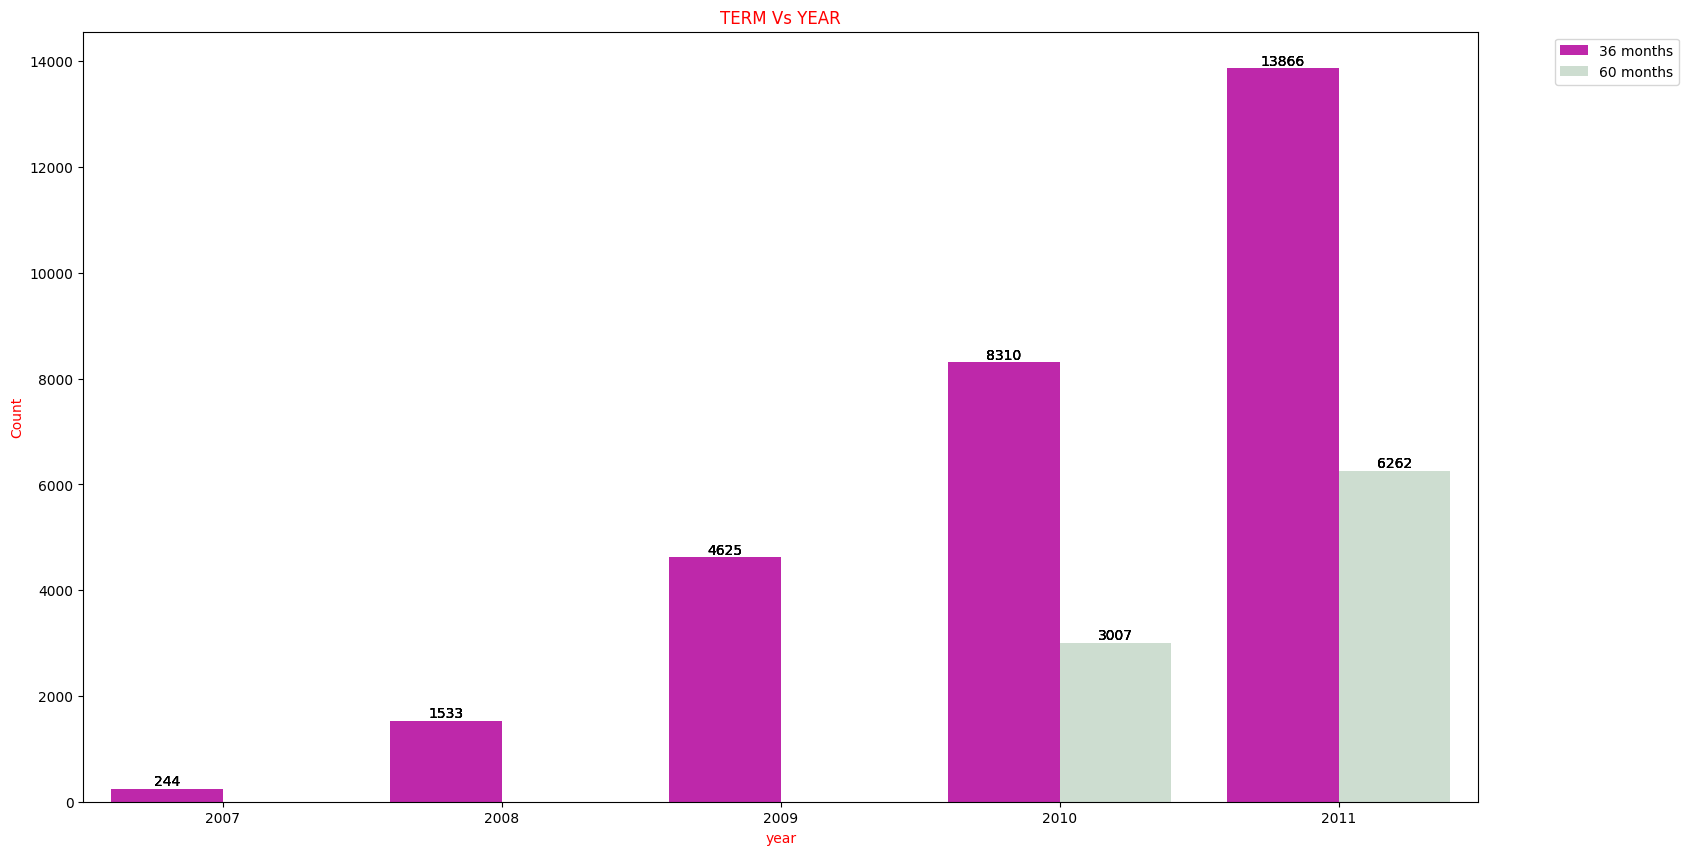


SUMMARY of YEAR with 36 MONTHS
2007: 0.85 %,
2008: 5.36 %,
2009: 16.18 %,
2010: 29.08 %,
2011: 48.52 %


SUMMARY of YEAR with 60 MONTHS
2010: 32.44 %,
2011: 67.56 %

******************************************************************************************************************************************************

Plot No.1



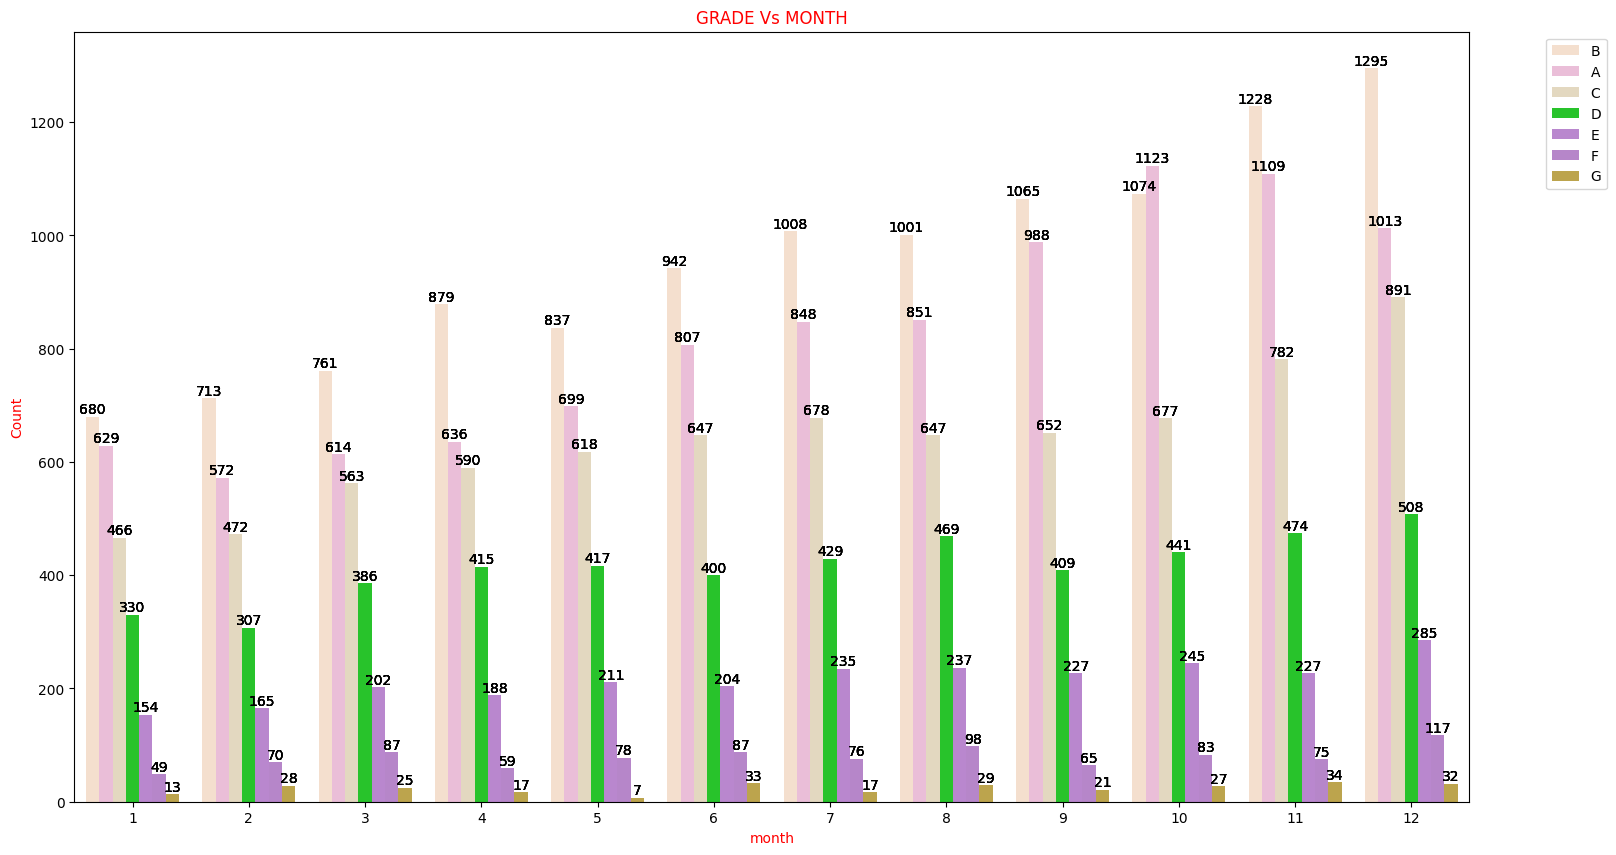


SUMMARY of MONTH with A
1: 6.36 %,
2: 5.78 %,
3: 6.21 %,
4: 6.43 %,
5: 7.07 %,
6: 8.16 %,
7: 8.58 %,
8: 8.61 %,
9: 9.99 %,
10: 11.36 %,
11: 11.21 %,
12: 10.24 %


SUMMARY of MONTH with B
1: 5.92 %,
2: 6.21 %,
3: 6.63 %,
4: 7.65 %,
5: 7.29 %,
6: 8.2 %,
7: 8.78 %,
8: 8.72 %,
9: 9.27 %,
10: 9.35 %,
11: 10.69 %,
12: 11.28 %


SUMMARY of MONTH with C
1: 6.07 %,
2: 6.14 %,
3: 7.33 %,
4: 7.68 %,
5: 8.04 %,
6: 8.42 %,
7: 8.82 %,
8: 8.42 %,
9: 8.49 %,
10: 8.81 %,
11: 10.18 %,
12: 11.6 %


SUMMARY of MONTH with D
1: 6.62 %,
2: 6.16 %,
3: 7.74 %,
4: 8.32 %,
5: 8.37 %,
6: 8.02 %,
7: 8.61 %,
8: 9.41 %,
9: 8.2 %,
10: 8.85 %,
11: 9.51 %,
12: 10.19 %


SUMMARY of MONTH with E
1: 5.97 %,
2: 6.4 %,
3: 7.83 %,
4: 7.29 %,
5: 8.18 %,
6: 7.91 %,
7: 9.11 %,
8: 9.19 %,
9: 8.8 %,
10: 9.5 %,
11: 8.8 %,
12: 11.05 %


SUMMARY of MONTH with F
1: 5.19 %,
2: 7.42 %,
3: 9.22 %,
4: 6.25 %,
5: 8.26 %,
6: 9.22 %,
7: 8.05 %,
8: 10.38 %,
9: 6.89 %,
10: 8.79 %,
11: 7.94 %,
12: 12.39 %


SUMMARY of MONTH with G
1: 4.59 %,


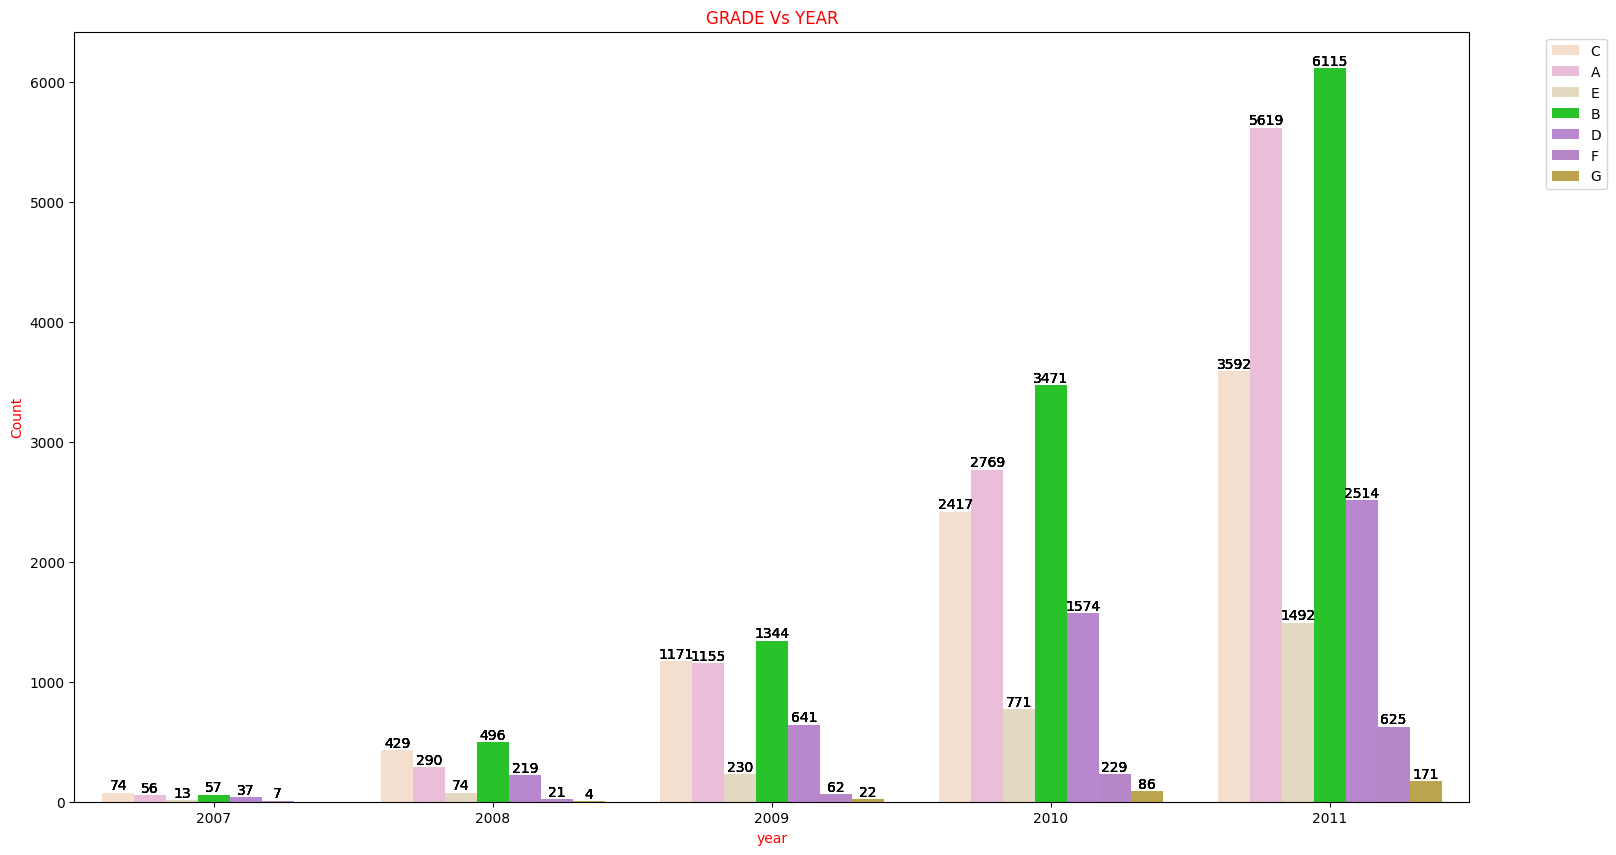


SUMMARY of YEAR with A
2007: 0.57 %,
2008: 2.93 %,
2009: 11.68 %,
2010: 28.0 %,
2011: 56.82 %


SUMMARY of YEAR with B
2007: 0.5 %,
2008: 4.32 %,
2009: 11.7 %,
2010: 30.23 %,
2011: 53.25 %


SUMMARY of YEAR with C
2007: 0.96 %,
2008: 5.58 %,
2009: 15.24 %,
2010: 31.46 %,
2011: 46.75 %


SUMMARY of YEAR with D
2007: 0.74 %,
2008: 4.39 %,
2009: 12.86 %,
2010: 31.57 %,
2011: 50.43 %


SUMMARY of YEAR with E
2007: 0.5 %,
2008: 2.87 %,
2009: 8.91 %,
2010: 29.88 %,
2011: 57.83 %


SUMMARY of YEAR with F
2007: 0.74 %,
2008: 2.22 %,
2009: 6.57 %,
2010: 24.26 %,
2011: 66.21 %


SUMMARY of YEAR with G
2008: 1.41 %,
2009: 7.77 %,
2010: 30.39 %,
2011: 60.42 %

******************************************************************************************************************************************************

Plot No.1



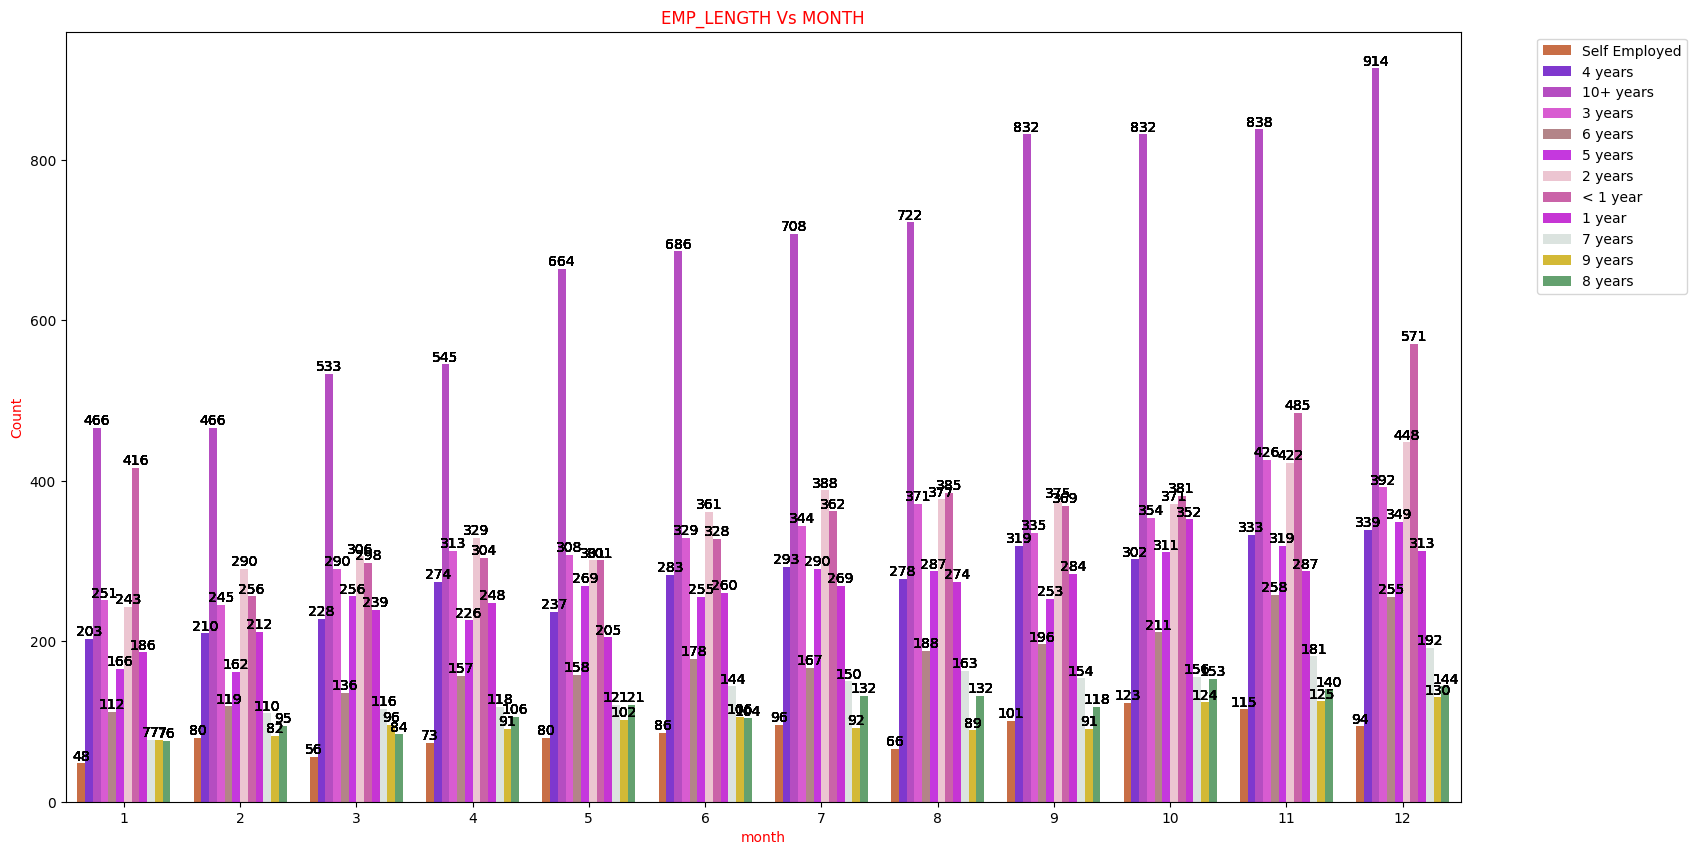


SUMMARY of MONTH with 1 YEAR
1: 5.94 %,
2: 6.78 %,
3: 7.64 %,
4: 7.93 %,
5: 6.55 %,
6: 8.31 %,
7: 8.6 %,
8: 8.76 %,
9: 9.08 %,
10: 11.25 %,
11: 9.17 %,
12: 10.0 %


SUMMARY of MONTH with 10+ YEARS
1: 5.68 %,
2: 5.68 %,
3: 6.5 %,
4: 6.64 %,
5: 8.09 %,
6: 8.36 %,
7: 8.63 %,
8: 8.8 %,
9: 10.14 %,
10: 10.14 %,
11: 10.21 %,
12: 11.14 %


SUMMARY of MONTH with 2 YEARS
1: 5.77 %,
2: 6.89 %,
3: 7.27 %,
4: 7.81 %,
5: 7.15 %,
6: 8.57 %,
7: 9.21 %,
8: 8.95 %,
9: 8.91 %,
10: 8.81 %,
11: 10.02 %,
12: 10.64 %


SUMMARY of MONTH with 3 YEARS
1: 6.34 %,
2: 6.19 %,
3: 7.33 %,
4: 7.91 %,
5: 7.78 %,
6: 8.31 %,
7: 8.69 %,
8: 9.37 %,
9: 8.46 %,
10: 8.94 %,
11: 10.76 %,
12: 9.9 %


SUMMARY of MONTH with 4 YEARS
1: 6.15 %,
2: 6.37 %,
3: 6.91 %,
4: 8.31 %,
5: 7.18 %,
6: 8.58 %,
7: 8.88 %,
8: 8.43 %,
9: 9.67 %,
10: 9.15 %,
11: 10.09 %,
12: 10.28 %


SUMMARY of MONTH with 5 YEARS
1: 5.28 %,
2: 5.15 %,
3: 8.15 %,
4: 7.19 %,
5: 8.56 %,
6: 8.11 %,
7: 9.23 %,
8: 9.13 %,
9: 8.05 %,
10: 9.9 %,
11: 10.15 %,
12: 11.1 

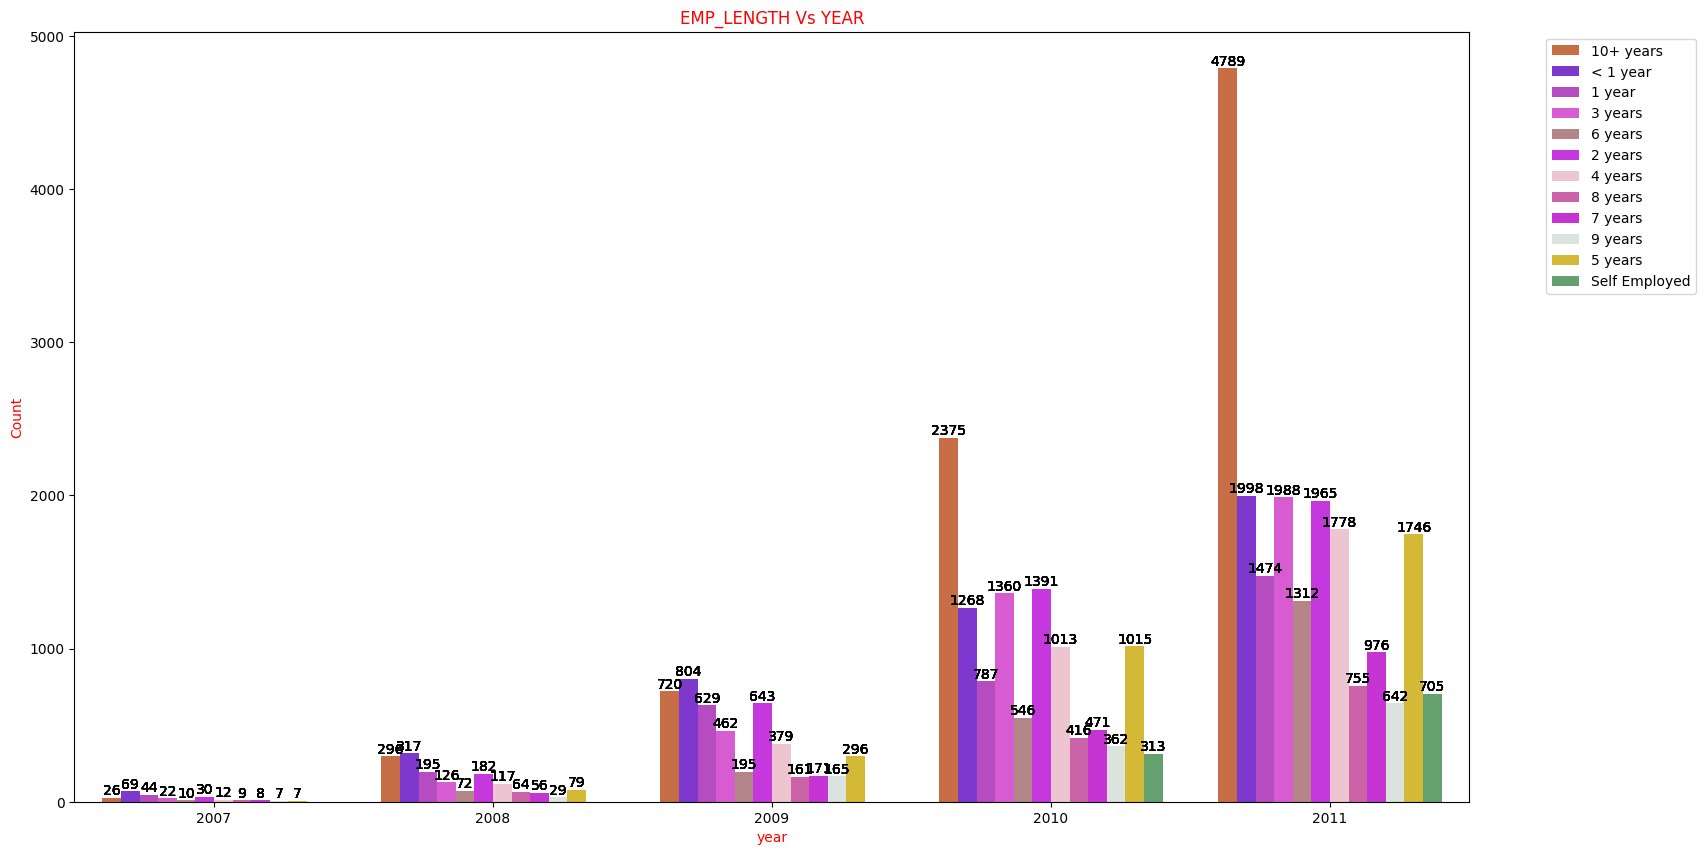


SUMMARY of YEAR with 1 YEAR
2007: 1.41 %,
2008: 6.23 %,
2009: 20.1 %,
2010: 25.15 %,
2011: 47.11 %


SUMMARY of YEAR with 10+ YEARS
2007: 0.32 %,
2008: 3.61 %,
2009: 8.77 %,
2010: 28.94 %,
2011: 58.36 %


SUMMARY of YEAR with 2 YEARS
2007: 0.71 %,
2008: 4.32 %,
2009: 15.27 %,
2010: 33.03 %,
2011: 46.66 %


SUMMARY of YEAR with 3 YEARS
2007: 0.56 %,
2008: 3.18 %,
2009: 11.67 %,
2010: 34.36 %,
2011: 50.23 %


SUMMARY of YEAR with 4 YEARS
2007: 0.36 %,
2008: 3.55 %,
2009: 11.49 %,
2010: 30.71 %,
2011: 53.9 %


SUMMARY of YEAR with 5 YEARS
2007: 0.22 %,
2008: 2.51 %,
2009: 9.42 %,
2010: 32.29 %,
2011: 55.55 %


SUMMARY of YEAR with 6 YEARS
2007: 0.47 %,
2008: 3.37 %,
2009: 9.13 %,
2010: 25.57 %,
2011: 61.45 %


SUMMARY of YEAR with 7 YEARS
2007: 0.48 %,
2008: 3.33 %,
2009: 10.17 %,
2010: 28.0 %,
2011: 58.03 %


SUMMARY of YEAR with 8 YEARS
2007: 0.64 %,
2008: 4.56 %,
2009: 11.46 %,
2010: 29.61 %,
2011: 53.74 %


SUMMARY of YEAR with 9 YEARS
2007: 0.58 %,
2008: 2.41 %,
2009: 13.69 %,
2010:

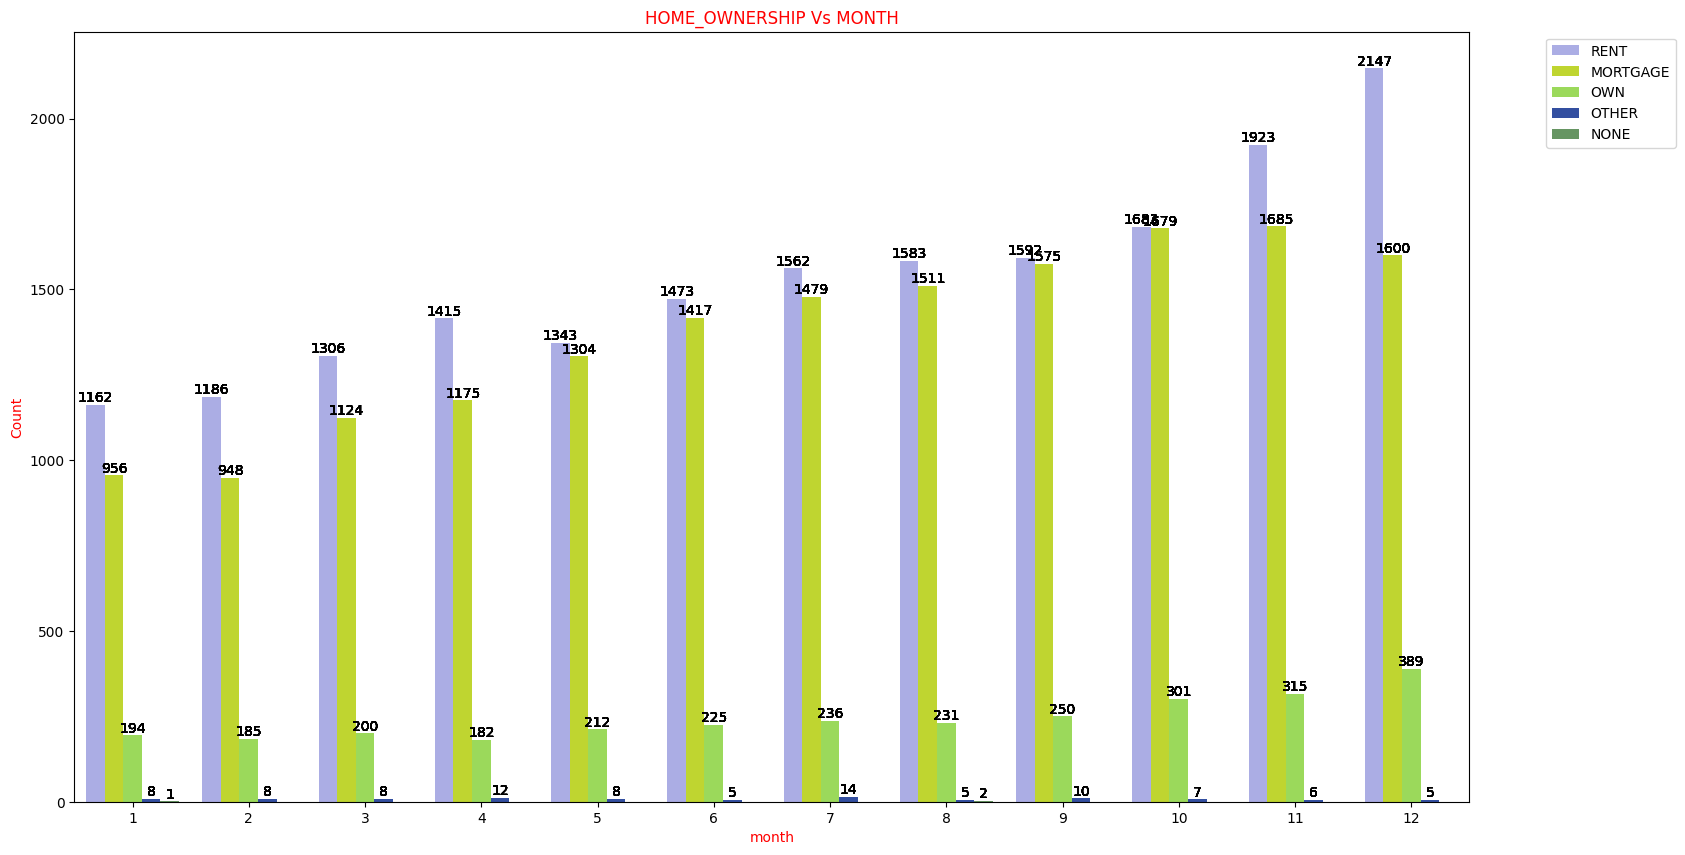


SUMMARY of MONTH with MORTGAGE
1: 5.81 %,
2: 5.76 %,
3: 6.83 %,
4: 7.14 %,
5: 7.93 %,
6: 8.61 %,
7: 8.99 %,
8: 9.18 %,
9: 9.57 %,
10: 10.2 %,
11: 10.24 %,
12: 9.72 %


SUMMARY of MONTH with NONE
1: 33.33 %,
8: 66.67 %


SUMMARY of MONTH with OTHER
1: 8.33 %,
2: 8.33 %,
3: 8.33 %,
4: 12.5 %,
5: 8.33 %,
6: 5.21 %,
7: 14.58 %,
8: 5.21 %,
9: 10.42 %,
10: 7.29 %,
11: 6.25 %,
12: 5.21 %


SUMMARY of MONTH with OWN
1: 6.64 %,
2: 6.34 %,
3: 6.85 %,
4: 6.23 %,
5: 7.26 %,
6: 7.71 %,
7: 8.08 %,
8: 7.91 %,
9: 8.56 %,
10: 10.31 %,
11: 10.79 %,
12: 13.32 %


SUMMARY of MONTH with RENT
1: 6.32 %,
2: 6.45 %,
3: 7.11 %,
4: 7.7 %,
5: 7.31 %,
6: 8.02 %,
7: 8.5 %,
8: 8.61 %,
9: 8.66 %,
10: 9.16 %,
11: 10.47 %,
12: 11.68 %

******************************************************************************************************************************************************

Plot No.2



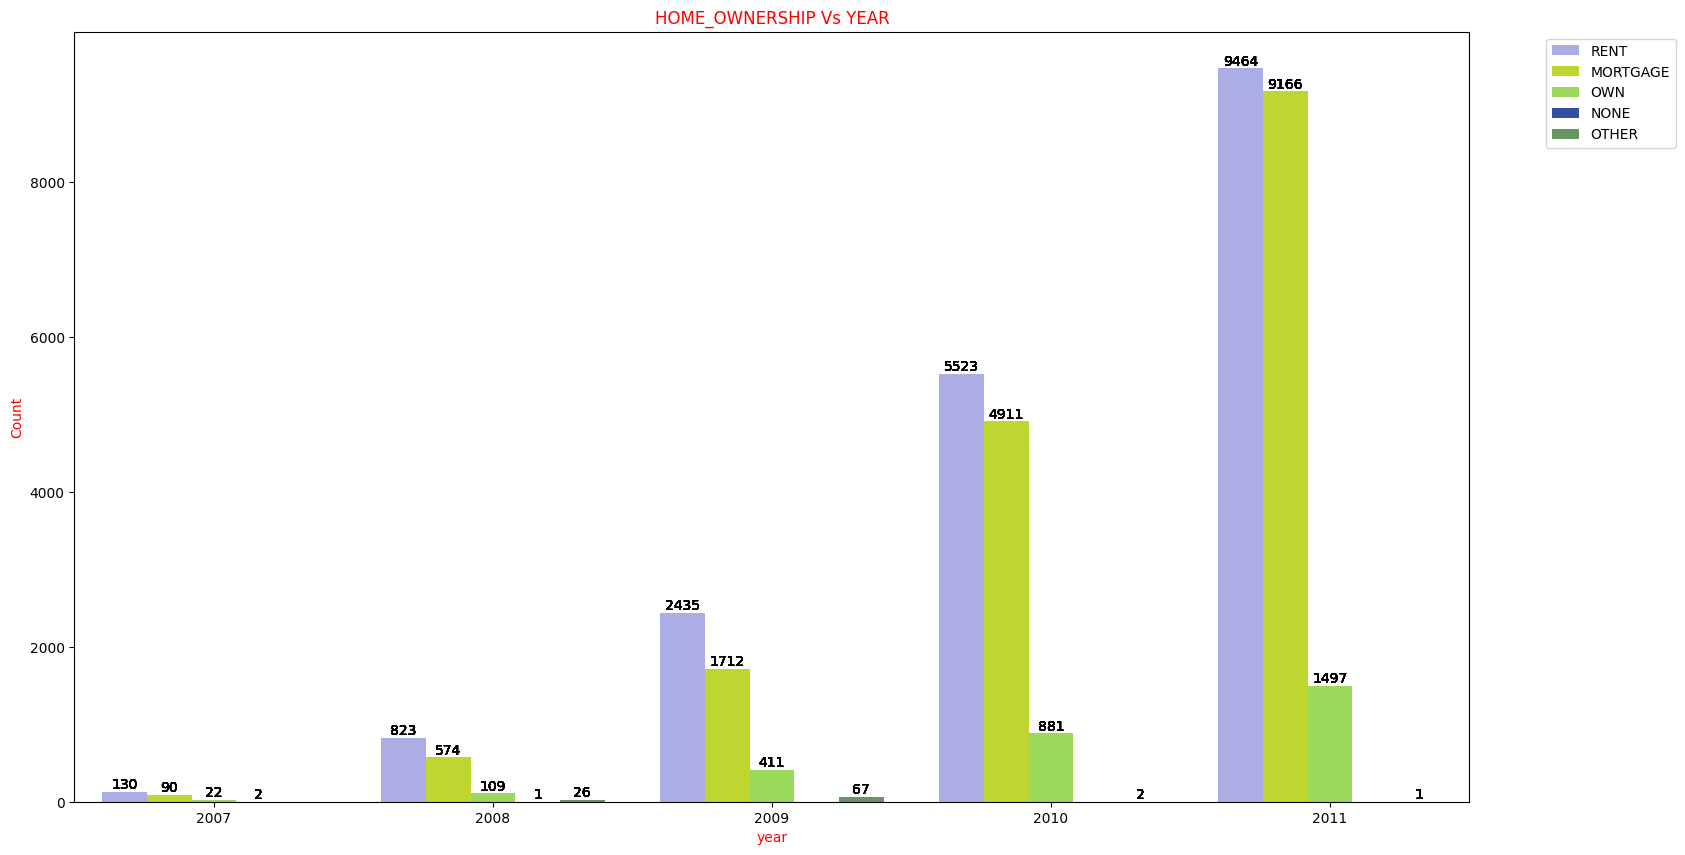


SUMMARY of YEAR with MORTGAGE
2007: 0.55 %,
2008: 3.49 %,
2009: 10.41 %,
2010: 29.85 %,
2011: 55.71 %


SUMMARY of YEAR with NONE
2007: 66.67 %,
2008: 33.33 %


SUMMARY of YEAR with OTHER
2008: 27.08 %,
2009: 69.79 %,
2010: 2.08 %,
2011: 1.04 %


SUMMARY of YEAR with OWN
2007: 0.75 %,
2008: 3.73 %,
2009: 14.08 %,
2010: 30.17 %,
2011: 51.27 %


SUMMARY of YEAR with RENT
2007: 0.71 %,
2008: 4.48 %,
2009: 13.25 %,
2010: 30.06 %,
2011: 51.5 %

******************************************************************************************************************************************************

Plot No.1



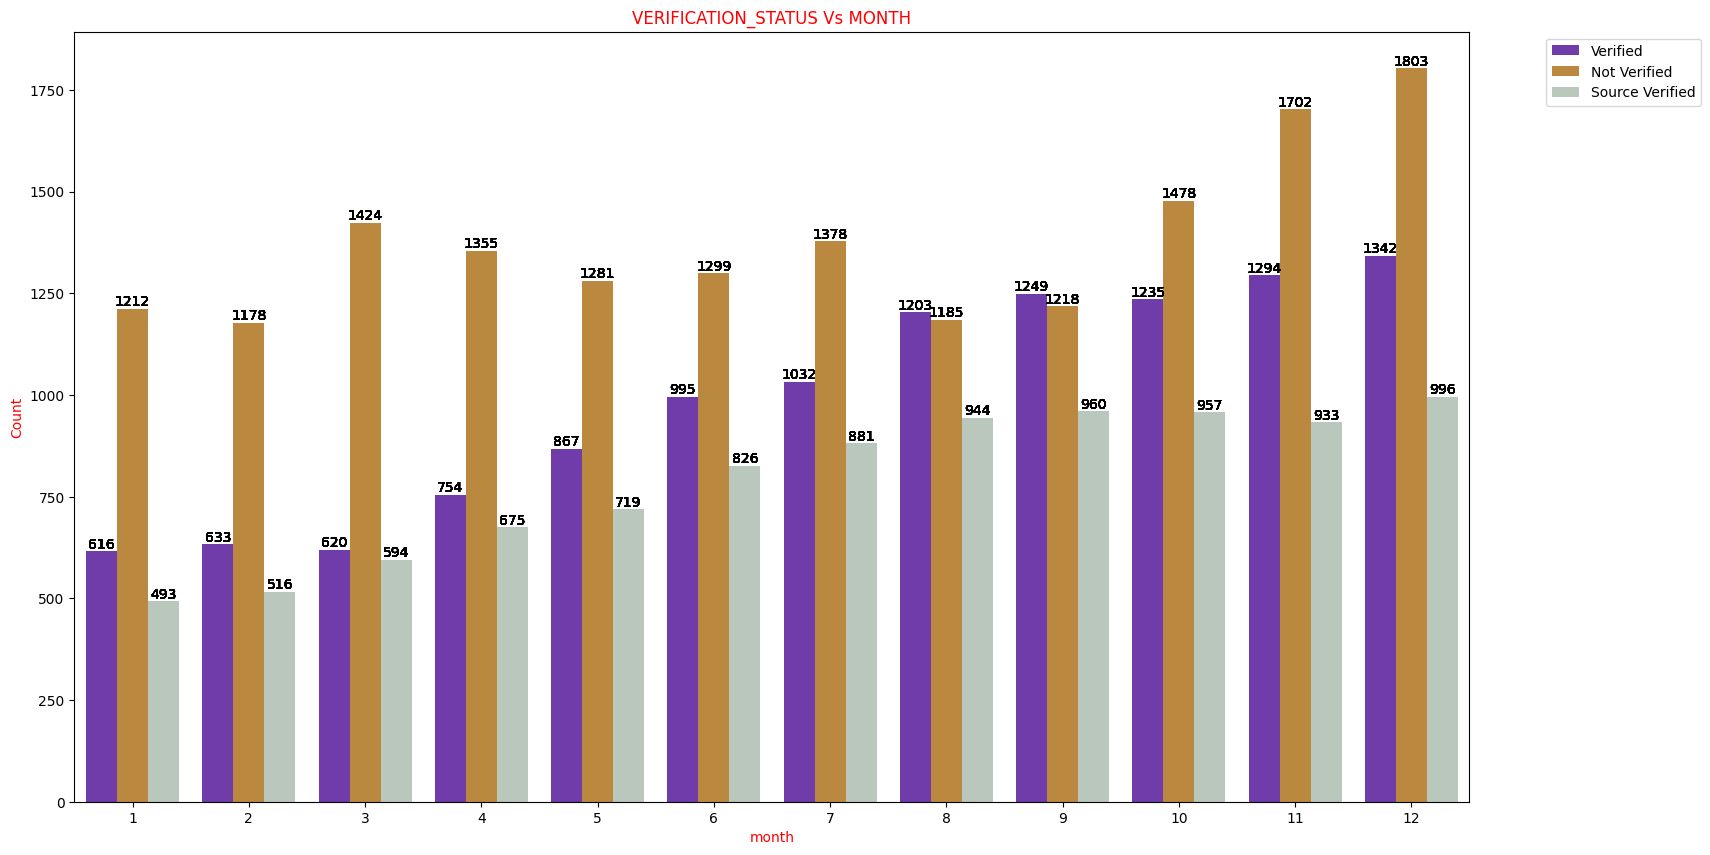


SUMMARY of MONTH with NOT VERIFIED
1: 7.34 %,
2: 7.13 %,
3: 8.62 %,
4: 8.21 %,
5: 7.76 %,
6: 7.87 %,
7: 8.34 %,
8: 7.18 %,
9: 7.38 %,
10: 8.95 %,
11: 10.31 %,
12: 10.92 %


SUMMARY of MONTH with SOURCE VERIFIED
1: 5.19 %,
2: 5.44 %,
3: 6.26 %,
4: 7.11 %,
5: 7.57 %,
6: 8.7 %,
7: 9.28 %,
8: 9.94 %,
9: 10.11 %,
10: 10.08 %,
11: 9.83 %,
12: 10.49 %


SUMMARY of MONTH with VERIFIED
1: 5.2 %,
2: 5.35 %,
3: 5.24 %,
4: 6.37 %,
5: 7.32 %,
6: 8.4 %,
7: 8.72 %,
8: 10.16 %,
9: 10.55 %,
10: 10.43 %,
11: 10.93 %,
12: 11.33 %

******************************************************************************************************************************************************

Plot No.2



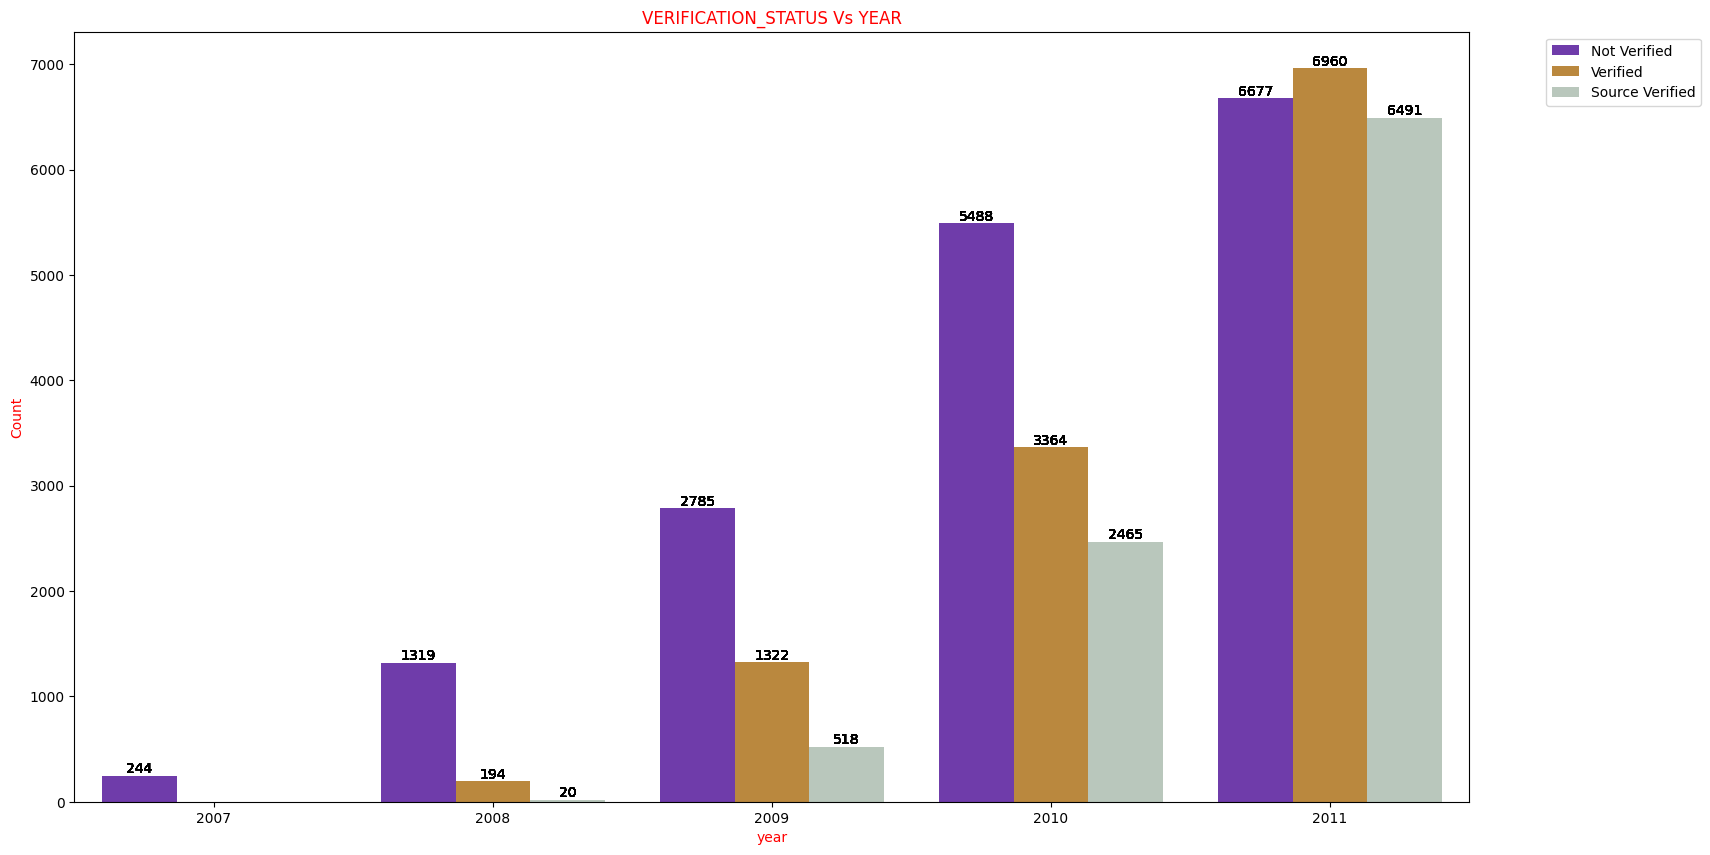


SUMMARY of YEAR with NOT VERIFIED
2007: 1.48 %,
2008: 7.99 %,
2009: 16.87 %,
2010: 33.23 %,
2011: 40.43 %


SUMMARY of YEAR with SOURCE VERIFIED
2008: 0.21 %,
2009: 5.46 %,
2010: 25.96 %,
2011: 68.37 %


SUMMARY of YEAR with VERIFIED
2008: 1.64 %,
2009: 11.17 %,
2010: 28.41 %,
2011: 58.78 %

******************************************************************************************************************************************************

Plot No.1



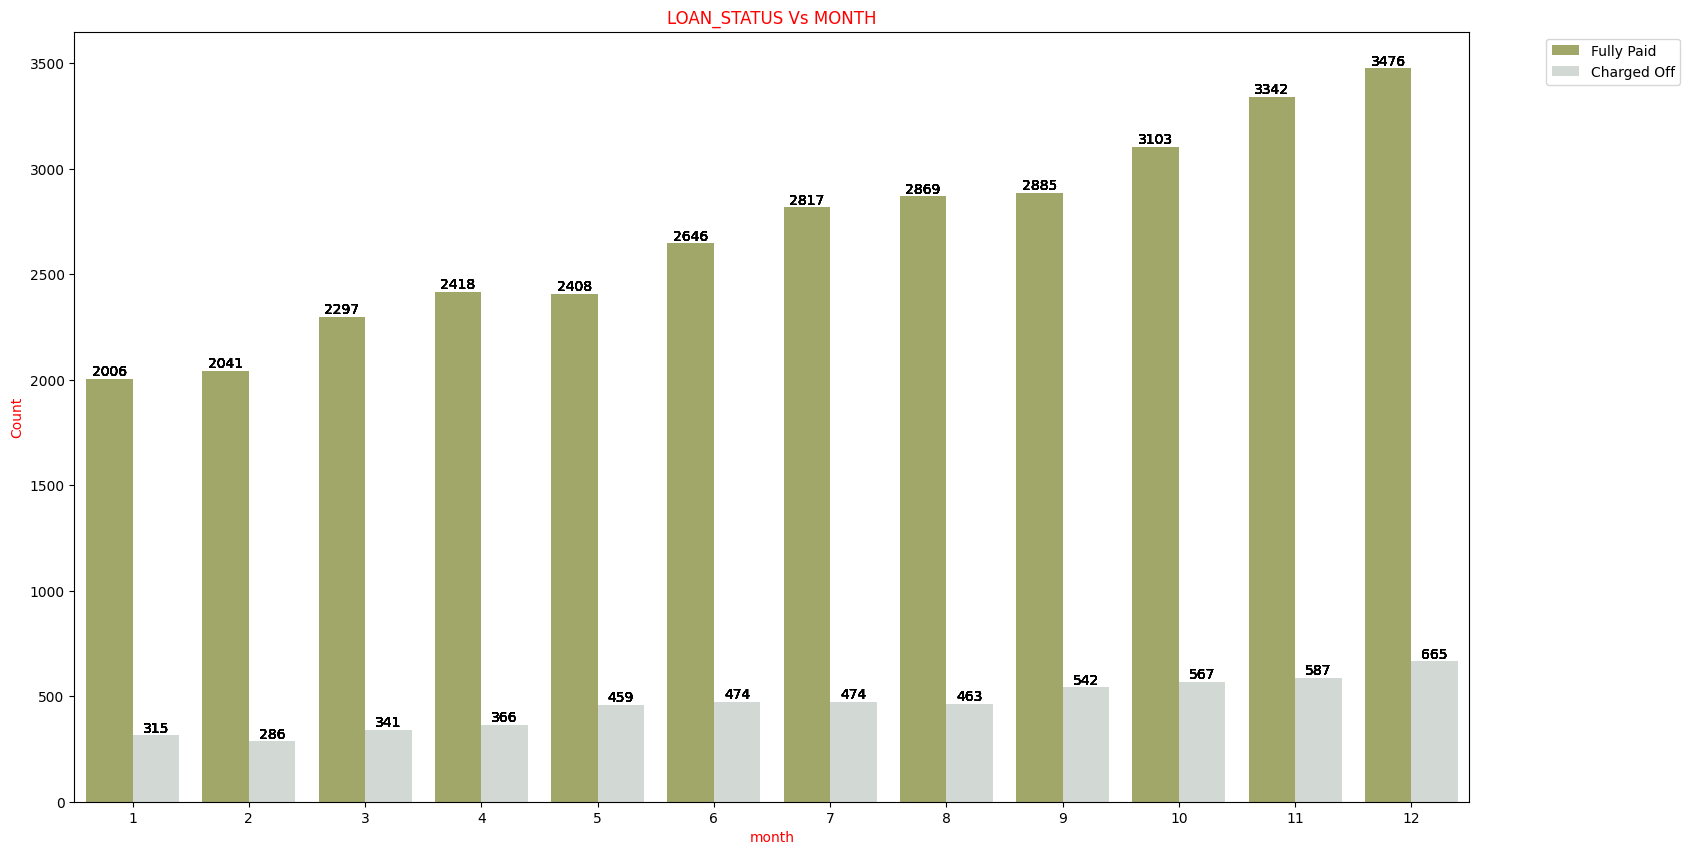


SUMMARY of MONTH with CHARGED OFF
1: 5.69 %,
2: 5.16 %,
3: 6.16 %,
4: 6.61 %,
5: 8.29 %,
6: 8.56 %,
7: 8.56 %,
8: 8.36 %,
9: 9.79 %,
10: 10.24 %,
11: 10.6 %,
12: 12.01 %


SUMMARY of MONTH with FULLY PAID
1: 6.21 %,
2: 6.32 %,
3: 7.11 %,
4: 7.48 %,
5: 7.45 %,
6: 8.19 %,
7: 8.72 %,
8: 8.88 %,
9: 8.93 %,
10: 9.6 %,
11: 10.34 %,
12: 10.76 %

******************************************************************************************************************************************************

Plot No.2



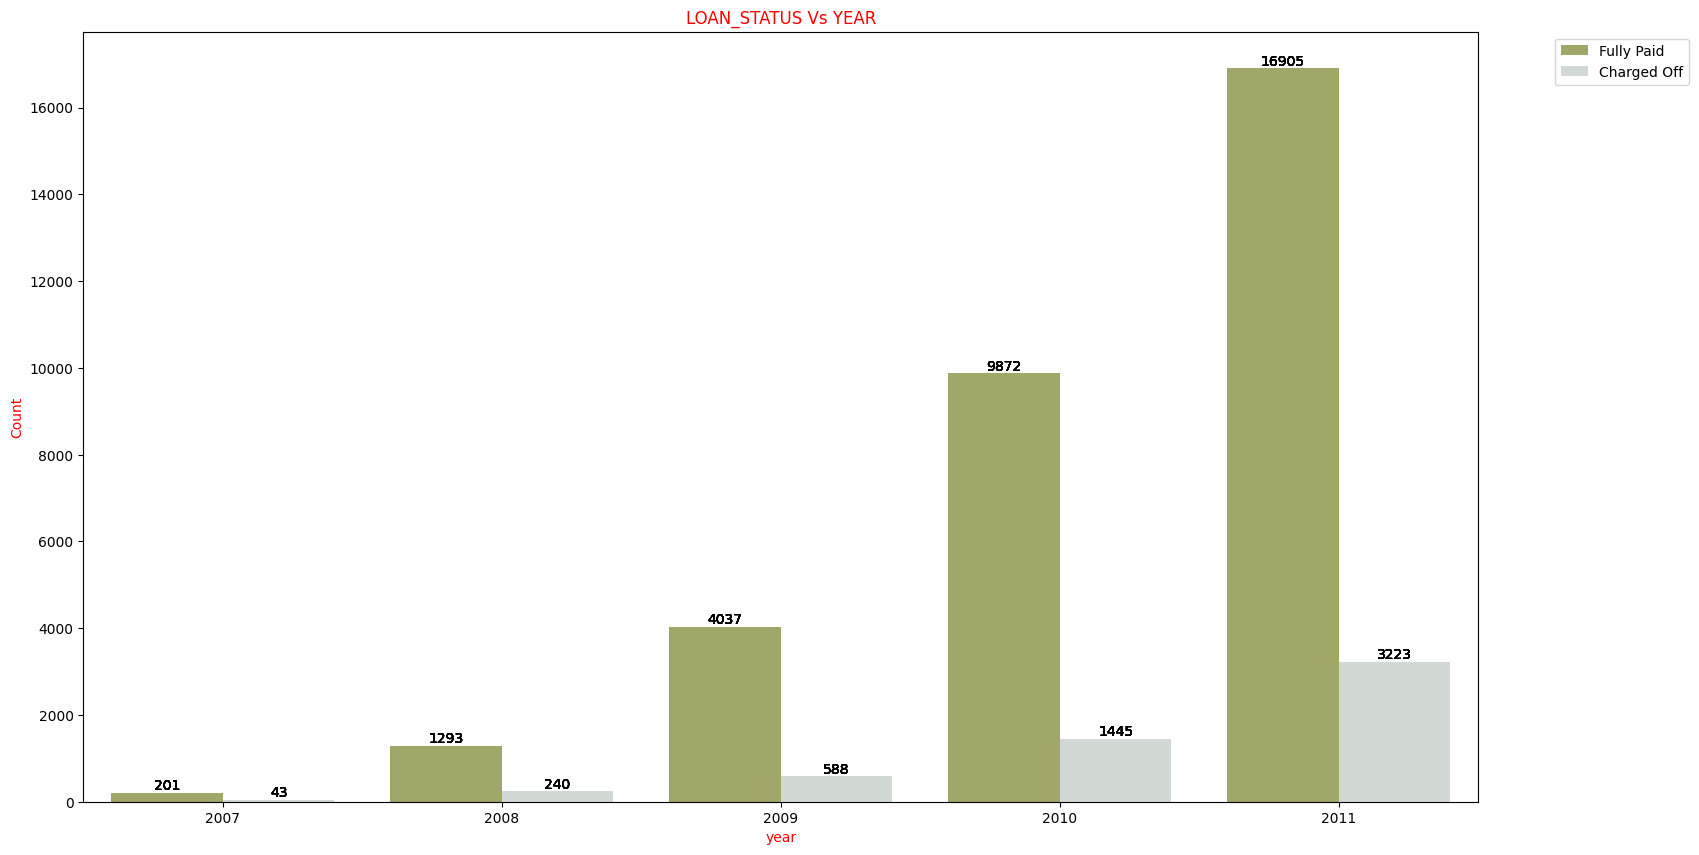


SUMMARY of YEAR with CHARGED OFF
2007: 0.78 %,
2008: 4.33 %,
2009: 10.62 %,
2010: 26.09 %,
2011: 58.19 %


SUMMARY of YEAR with FULLY PAID
2007: 0.62 %,
2008: 4.0 %,
2009: 12.5 %,
2010: 30.56 %,
2011: 52.32 %

******************************************************************************************************************************************************

Plot No.1



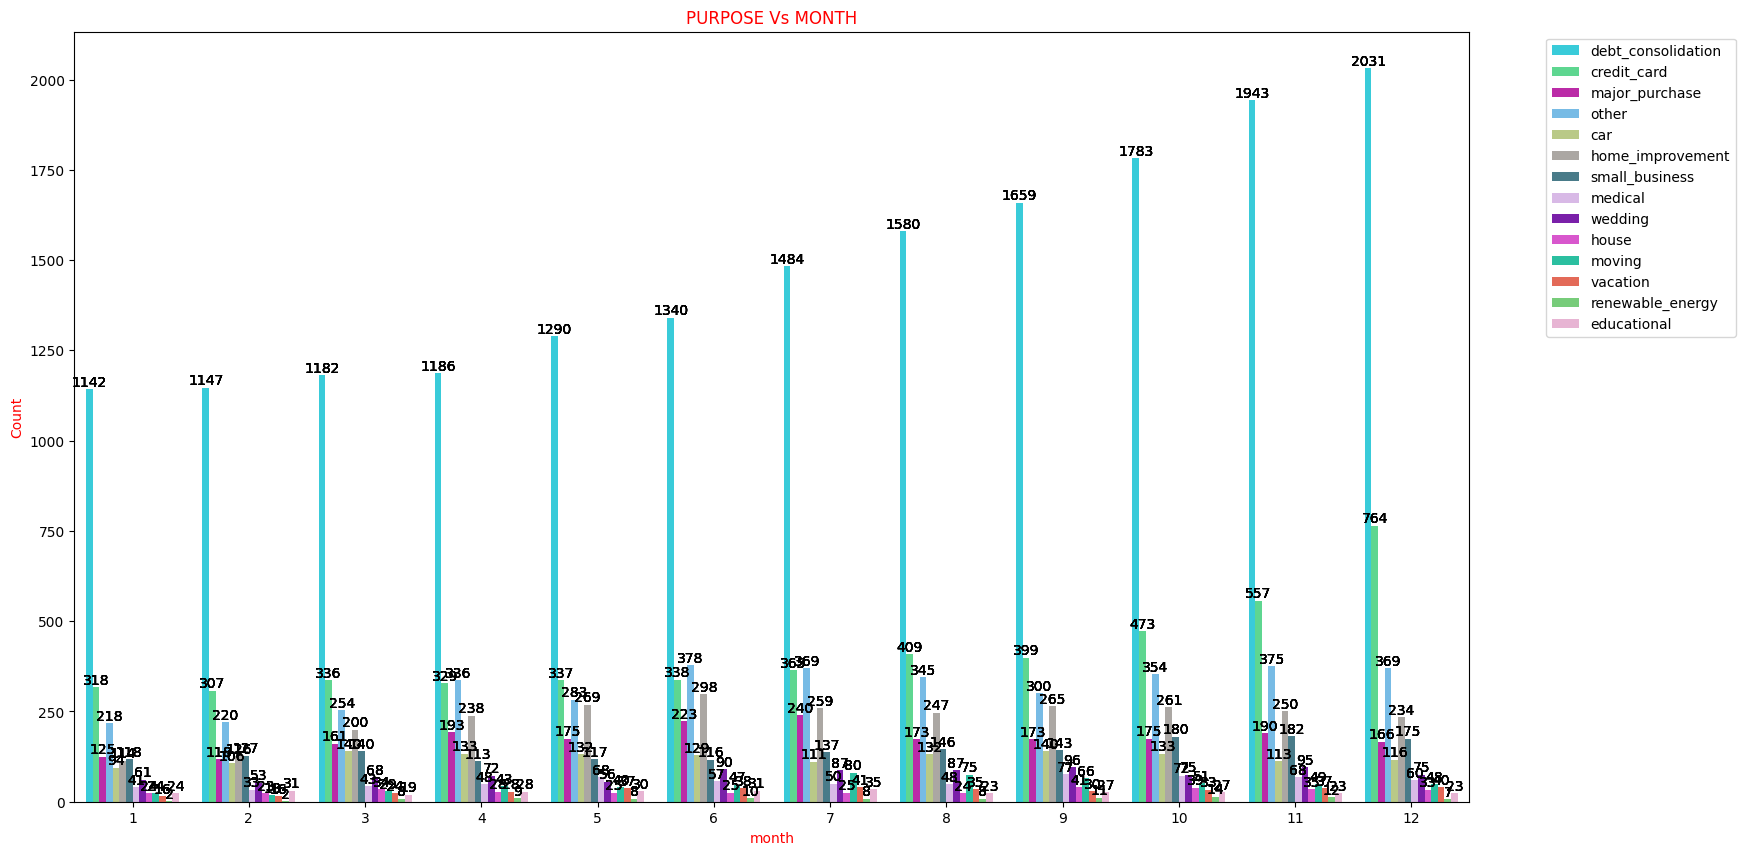


SUMMARY of MONTH with CAR
1: 6.36 %,
2: 7.17 %,
3: 9.47 %,
4: 8.99 %,
5: 8.92 %,
6: 8.72 %,
7: 7.51 %,
8: 8.92 %,
9: 9.47 %,
10: 8.99 %,
11: 7.64 %,
12: 7.84 %


SUMMARY of MONTH with CREDIT_CARD
1: 6.45 %,
2: 6.22 %,
3: 6.81 %,
4: 6.67 %,
5: 6.83 %,
6: 6.85 %,
7: 7.4 %,
8: 8.29 %,
9: 8.09 %,
10: 9.59 %,
11: 11.29 %,
12: 15.49 %


SUMMARY of MONTH with DEBT_CONSOLIDATION
1: 6.43 %,
2: 6.46 %,
3: 6.65 %,
4: 6.68 %,
5: 7.26 %,
6: 7.54 %,
7: 8.35 %,
8: 8.89 %,
9: 9.34 %,
10: 10.04 %,
11: 10.94 %,
12: 11.43 %


SUMMARY of MONTH with EDUCATIONAL
1: 7.48 %,
2: 9.66 %,
3: 5.92 %,
4: 8.72 %,
5: 9.35 %,
6: 9.66 %,
7: 10.9 %,
8: 7.17 %,
9: 8.41 %,
10: 8.41 %,
11: 7.17 %,
12: 7.17 %


SUMMARY of MONTH with HOME_IMPROVEMENT
1: 4.13 %,
2: 4.56 %,
3: 7.24 %,
4: 8.62 %,
5: 9.74 %,
6: 10.79 %,
7: 9.38 %,
8: 8.95 %,
9: 9.6 %,
10: 9.45 %,
11: 9.05 %,
12: 8.48 %


SUMMARY of MONTH with HOUSE
1: 6.74 %,
2: 6.46 %,
3: 9.55 %,
4: 7.87 %,
5: 7.02 %,
6: 7.02 %,
7: 7.02 %,
8: 6.74 %,
9: 11.52 %,
10: 10.96 %,


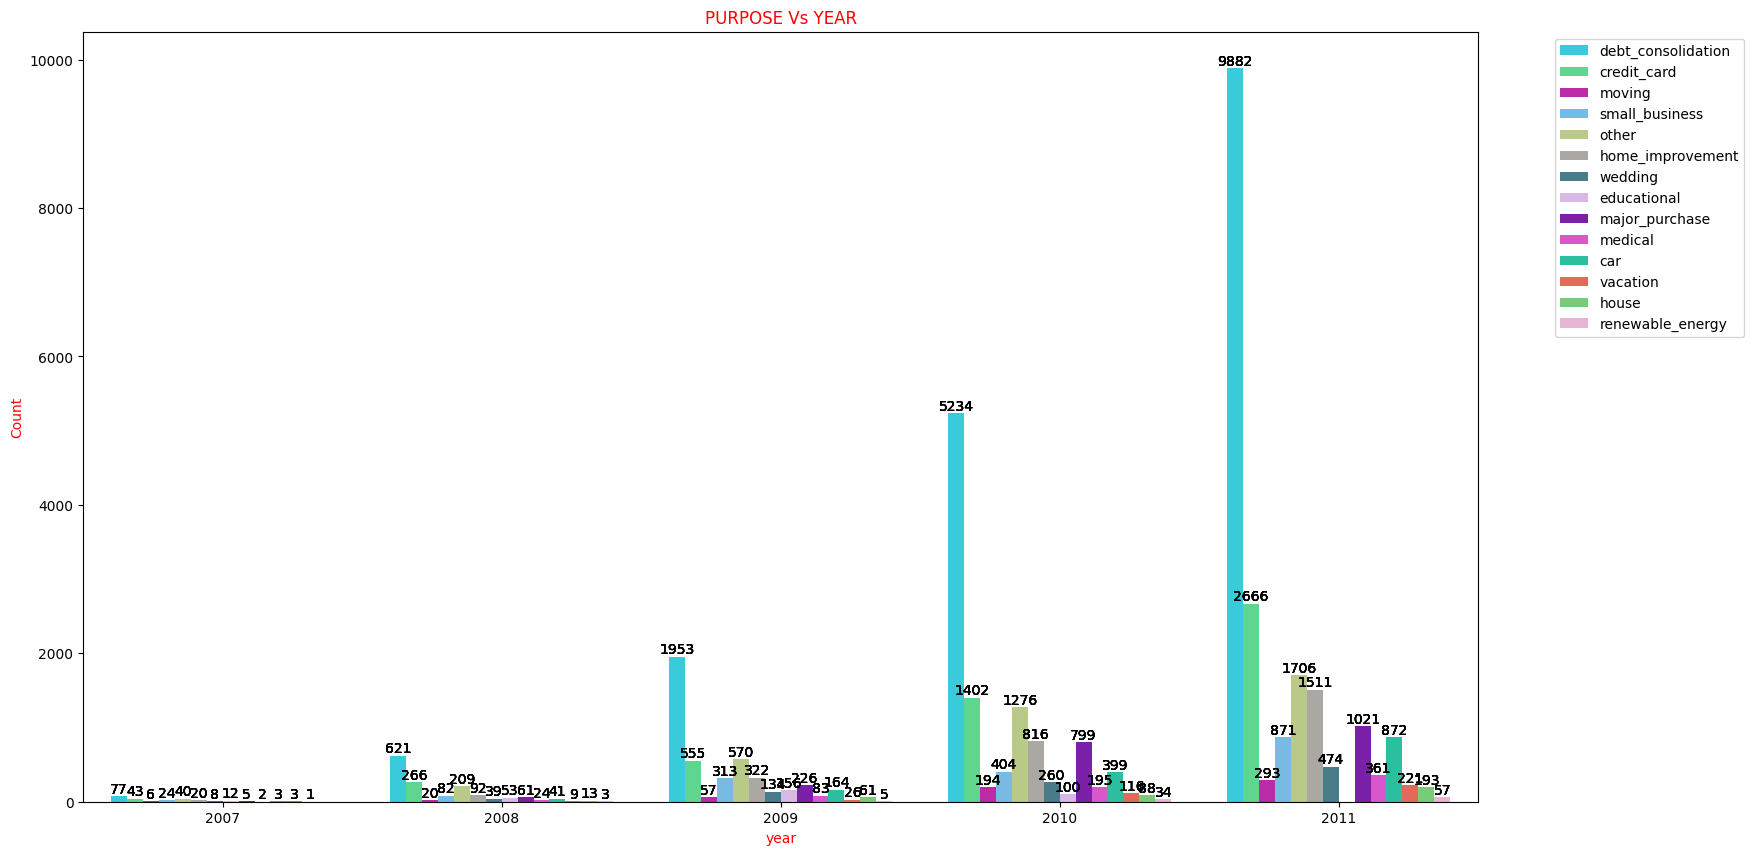


SUMMARY of YEAR with CAR
2007: 0.2 %,
2008: 2.77 %,
2009: 11.09 %,
2010: 26.98 %,
2011: 58.96 %


SUMMARY of YEAR with CREDIT_CARD
2007: 0.87 %,
2008: 5.39 %,
2009: 11.25 %,
2010: 28.43 %,
2011: 54.06 %


SUMMARY of YEAR with DEBT_CONSOLIDATION
2007: 0.43 %,
2008: 3.5 %,
2009: 10.99 %,
2010: 29.46 %,
2011: 55.62 %


SUMMARY of YEAR with EDUCATIONAL
2007: 3.74 %,
2008: 16.51 %,
2009: 48.6 %,
2010: 31.15 %


SUMMARY of YEAR with HOME_IMPROVEMENT
2007: 0.72 %,
2008: 3.33 %,
2009: 11.66 %,
2010: 29.55 %,
2011: 54.73 %


SUMMARY of YEAR with HOUSE
2007: 0.28 %,
2008: 3.65 %,
2009: 17.13 %,
2010: 24.72 %,
2011: 54.21 %


SUMMARY of YEAR with MAJOR_PURCHASE
2007: 0.24 %,
2008: 2.89 %,
2009: 10.7 %,
2010: 37.83 %,
2011: 48.34 %


SUMMARY of YEAR with MEDICAL
2007: 0.3 %,
2008: 3.61 %,
2009: 12.48 %,
2010: 29.32 %,
2011: 54.29 %


SUMMARY of YEAR with MOVING
2007: 1.05 %,
2008: 3.51 %,
2009: 10.0 %,
2010: 34.04 %,
2011: 51.4 %


SUMMARY of YEAR with OTHER
2007: 1.05 %,
2008: 5.5 %,
2009: 15.0 

In [75]:
for i in categorical_list:
  bars = i
  column_name_to_plot = ['month', 'year']
  num_colors = lending_club_load_paid_or_default_clean_data[i].nunique()
  bars_color = generate_unique_hex_colors(num_colors)
  count_hue_no_support_column(lending_club_load_paid_or_default_clean_data,
                             column_name_to_plot, bars, bars_color)

# *Interpretation*

---

**1. Term**: You're right. In 2011, there seems to be a higher concentration of borrowers choosing 36-month (48.52%) and 60-month (67.56%) loan terms compared to other years. This could be due to various factors, such as prevailing interest rates for different terms or the economic climate in that year. Similarly, the peak in December for these terms (12th month) might be seasonal or reflect year-end financial planning needs.

**2. Grade**: There seems to be a gradual increase in credit risk over the years, with 2011 showing the highest risk concentration (56.82%). The major risk factors in 2011 appear to be Grade B and Grade A borrowers. This could be due to the lender relaxing underwriting standards or a change in the overall borrower pool. The monthly breakdown also suggests a higher risk profile in December (12th month).

**3. Emp_Length**: The data shows a positive trend of increasing applications from borrowers with 10+ years of experience. The significant rise in 2011 (double compared to 2010) suggests a potential shift in the borrower pool towards individuals with a more established employment history and potentially stronger debt service capabilities. Conversely, the uneven distribution of less experienced borrowers (<1 year) across months might indicate some uncertainty or inconsistency in their loan applications.

**4. Home_Ownership**: We see a gradual increase in loan applications from renters compared to other ownership categories. This could be due to demographic shifts or changes in housing affordability. However, homeowners are also showing a steady rise in applications from 2008 onwards. The monthly data reveals a consistent increase in applications from renters, with a potential dip in the 5th month for reasons that require further investigation.

**5. Verification_Status**: The analysis highlights a positive trend. Initially, there seems to be an absence of loan verification practices. However, from 2008 onwards, the lender implemented verification procedures, which gradually increased over time. This indicates a growing emphasis on credit risk management. The year 2011 shows a higher number of unverified applications compared to source-verified ones. The monthly breakdown suggests a rise in unverified applications, which could be a concern for the lender and requires a closer look at their verification process.

**6. Loan_Status**: The data indicates a healthy trend of borrowers repaying their debts. The year 2011 shows a significant increase in the percentage of fully paid loans (around 75% to 80%), demonstrating a positive debt repayment performance. The monthly breakdown also reveals a gradual rise in fully paid applications.

**7.Purpose**: Debt consolidation appears to be the dominant loan purpose, with a noticeable increase in 2011 compared to 2010. This suggests that a significant number of borrowers are using loans to manage existing debt. This could be a positive strategy if it leads to lower overall interest rates and simplifies debt management. However, it's crucial for the lender to assess if borrowers have the capacity to handle additional debt. The monthly data confirms debt consolidation as the leading purpose, suggesting a trend of using loans for existing debt management rather than new asset acquisition.

***2. Employement Length Vs Loan Status & Verification Status Vs Loan Status***


Plot No.1



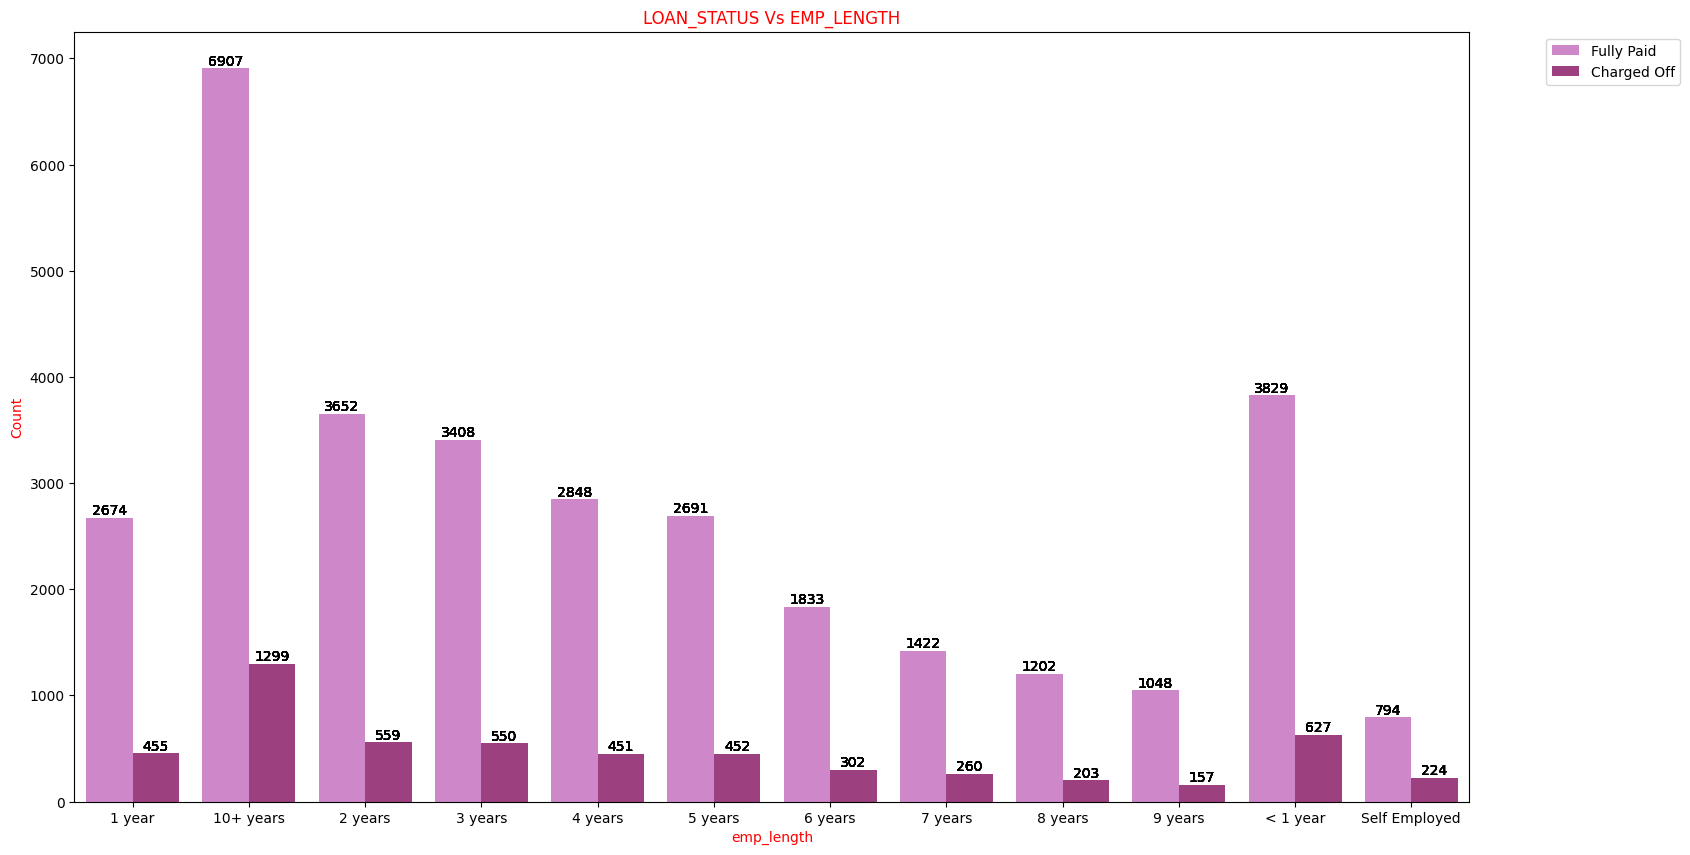


SUMMARY of EMP_LENGTH with CHARGED OFF
1 year: 8.21 %,
10+ years: 23.45 %,
2 years: 10.09 %,
3 years: 9.93 %,
4 years: 8.14 %,
5 years: 8.16 %,
6 years: 5.45 %,
7 years: 4.69 %,
8 years: 3.66 %,
9 years: 2.83 %,
< 1 year: 11.32 %,
Self Employed: 4.04 %


SUMMARY of EMP_LENGTH with FULLY PAID
1 year: 8.28 %,
10+ years: 21.38 %,
2 years: 11.3 %,
3 years: 10.55 %,
4 years: 8.82 %,
5 years: 8.33 %,
6 years: 5.67 %,
7 years: 4.4 %,
8 years: 3.72 %,
9 years: 3.24 %,
< 1 year: 11.85 %,
Self Employed: 2.46 %

******************************************************************************************************************************************************

Plot No.2



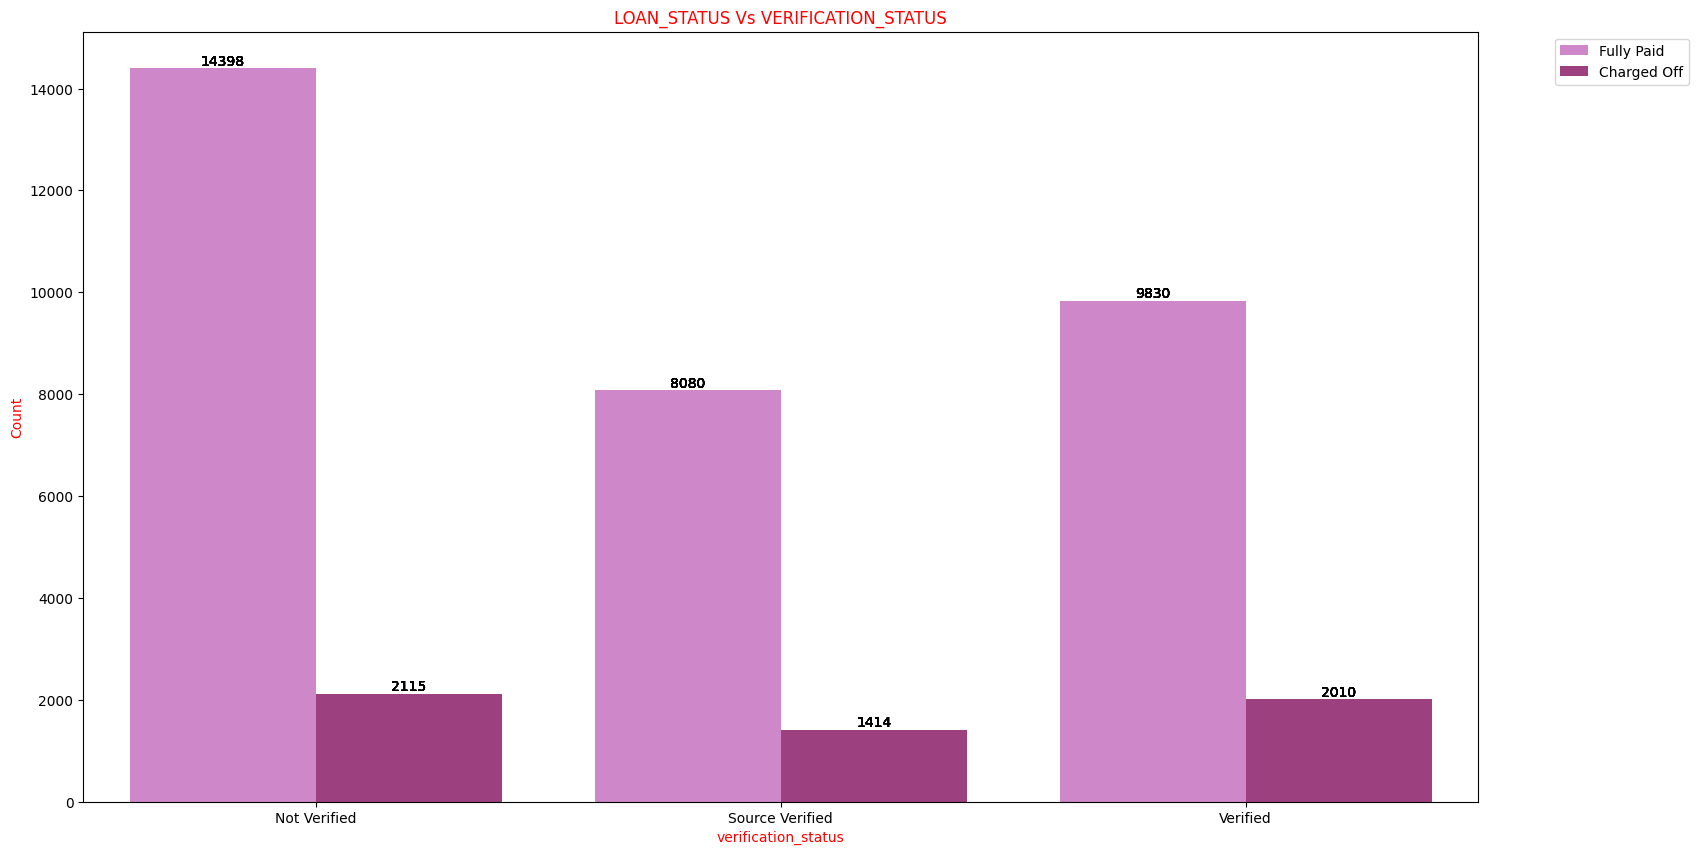


SUMMARY of VERIFICATION_STATUS with CHARGED OFF
Not Verified: 38.18 %,
Source Verified: 25.53 %,
Verified: 36.29 %


SUMMARY of VERIFICATION_STATUS with FULLY PAID
Not Verified: 44.56 %,
Source Verified: 25.01 %,
Verified: 30.43 %

******************************************************************************************************************************************************


In [76]:
bars = 'loan_status'
column_name_to_plot = ['emp_length', 'verification_status']
num_colors = lending_club_load_paid_or_default_clean_data['loan_status'].nunique()
bars_color = generate_unique_hex_colors(num_colors)
count_hue_no_support_column(lending_club_load_paid_or_default_clean_data,
                             column_name_to_plot, bars, bars_color)

# *Interpretation*

---

***1. Employee Length***
* Both categories (charged off and fully paid) have a significant portion of employees with tenure of 10+ years (23.45% for charged off, 21.38% for fully paid). This suggests a relatively stable workforce with a good number of experienced employees.
* There's a considerable presence of employees with less than one year of experience (around 11% for both categories). This could indicate high turnover among new hires or seasonal positions.
* The distribution seems to be somewhat similar across both categories, with a slight decrease in percentages for longer tenures (1-9 years) in the charged off category compared to fully paid. This might imply that employees with longer tenures are less likely to have charged-off accounts.

***2. Verification Status***
* `Not Verified`: A higher percentage of fully paid accounts (44.56%) have unverified statuses compared to charged off accounts (38.18%). This might suggest a difference in the verification process or the importance placed on it for these categories.
*`Source Verified`: The percentage of source-verified accounts is quite similar for both categories (around 25%).
*`Verified`: Charged off accounts have a slightly higher percentage of verified statuses (36.29%) compared to fully paid accounts (30.43%). This could be due to a more rigorous verification process for charged off accounts to ensure debt legitimacy.
* There could be a higher focus on verifying charged-off accounts to confirm the debt validity before pursuing collection efforts.
* Fully paid accounts might be less likely to require thorough verification as the debt has already been settled.
* The difference in unverified statuses (higher for fully paid) could be due to reasons like paid-in-full settlements without going through the traditional verification process.

**3. Loan Amount Vs Home Ownership based on Loan Status**


Plot No.1



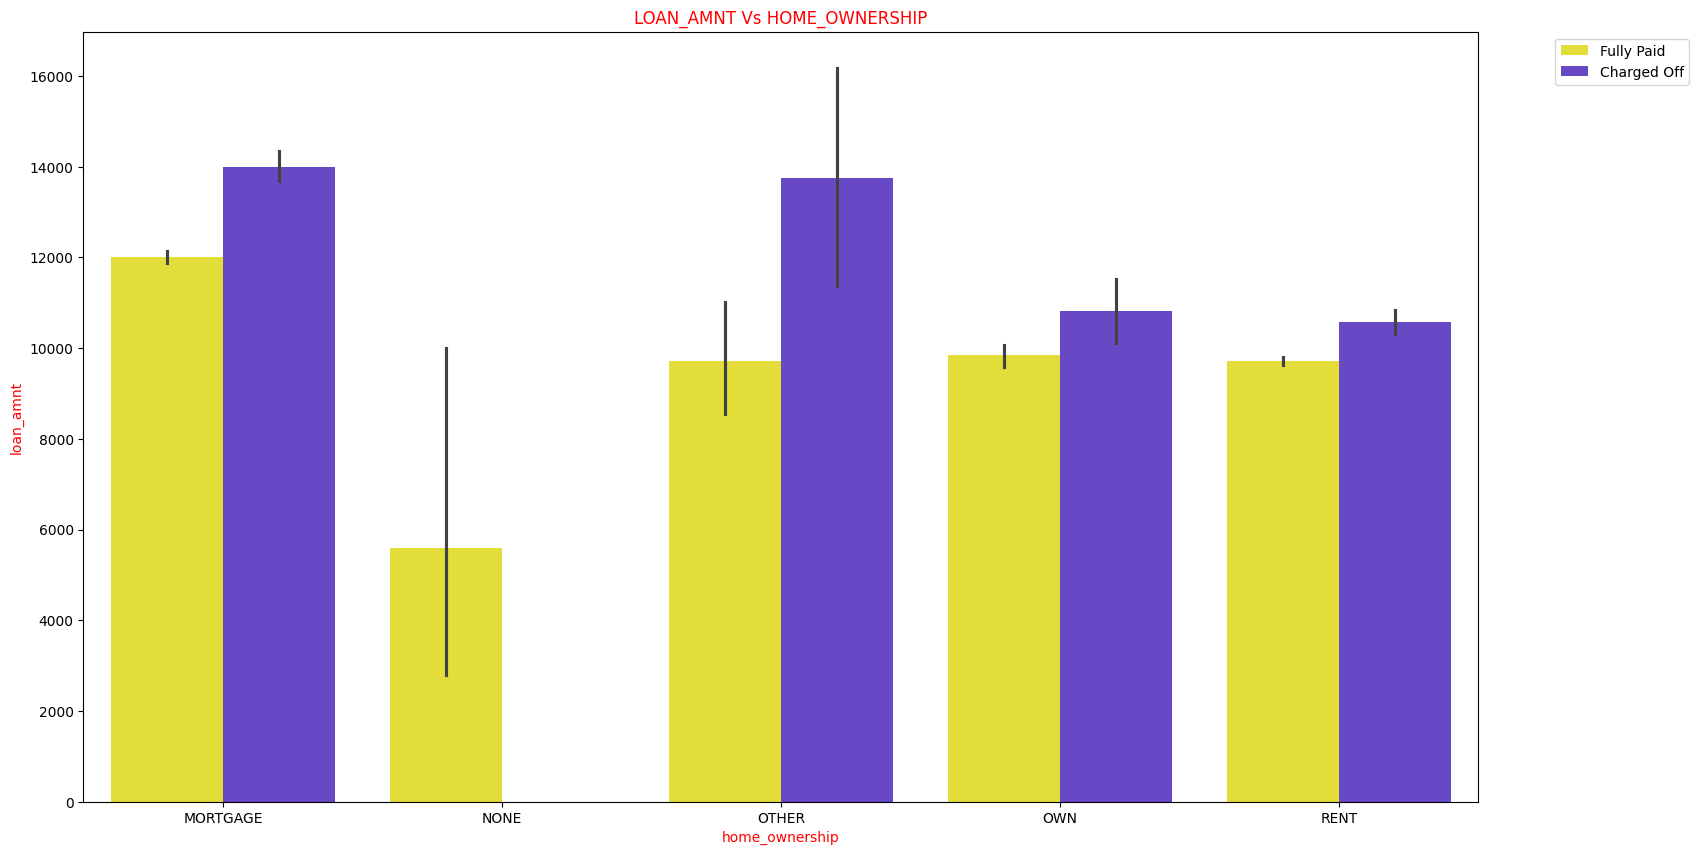


SUMMARY of HOME_OWNERSHIP
RENT are 18375 
OWN are 16453 
MORTGAGE are 2920 
OTHER are 96 
NONE are 3
******************************************************************************************************************************************************


In [77]:
bars = 'loan_status'
y_axis = 'loan_amnt'
x_axis = 'home_ownership'
num_colors = lending_club_load_paid_or_default_clean_data['loan_status'].nunique()
bars_color = generate_unique_hex_colors(num_colors)
barplot_hue_xy_axis(lending_club_load_paid_or_default_clean_data,
                         x_axis, y_axis, bars, bars_color)

# *Interpretation*

---

***Home Ownership***
* The majority of the population (around 51%, based on the values 18375 / (18375 + 16453 + 2920 + 96 + 3)) appears to be renters. This suggests a high prevalence of renting in this population.
* Owning a home (including those with mortgages) comes in second at approximately 44% (16453 + 2920) / (18375 + 16453 + 2920 + 96 + 3).
* A small percentage (around 3%, based on 96 / (18375 + 16453 + 2920 + 96 + 3)) falls under the "Other" category, which might include ownership types not explicitly listed.
* There are very few individuals (less than 0.1%, based on 3 / (18375 + 16453 + 2920 + 96 + 3)) in the "None" category, indicating almost everyone has some form of housing arrangement.
* The factors influencing the high prevalence of renting could be explored further. This might involve aspects like affordability of homeownership in the region, demographics of the population (e.g., age, income levels), or cultural preferences towards renting.
* A deeper dive into the "Other" category could reveal interesting insights into alternative housing arrangements.

**4. Loan Amount Vs Grade & Interest Rate Vs Grade**


Plot No.1



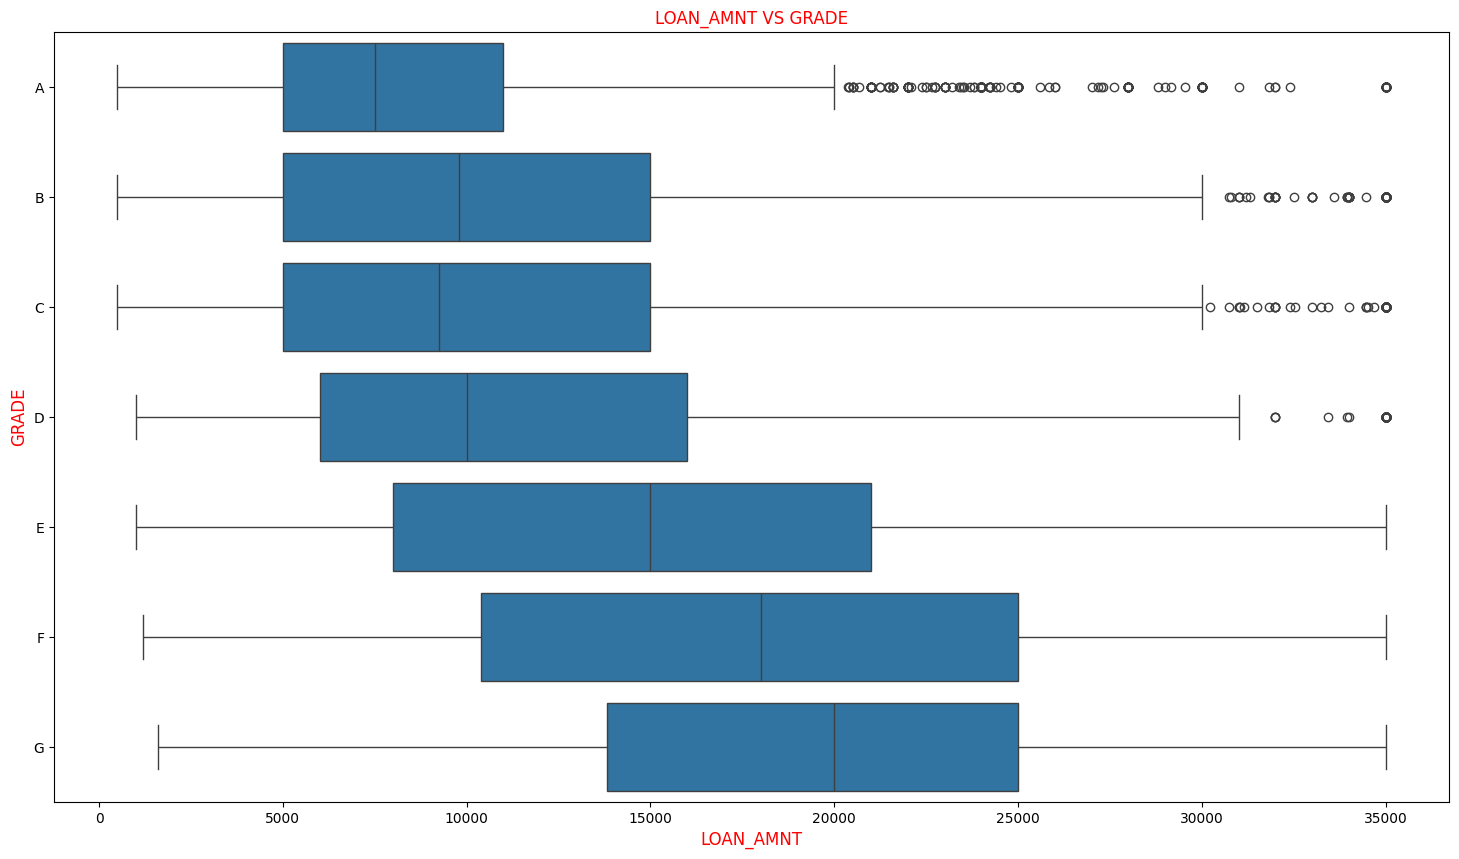


SUMMARY
          count      mean      std      min       25%       50%       75%  \
grade                                                                       
A      9889.000  8549.601 5238.057  500.000  5000.000  7500.000 11000.000   
B     11483.000 10827.856 6986.482  500.000  5000.000  9800.000 15000.000   
C      7683.000 10684.964 7103.419  500.000  5000.000  9250.000 15000.000   
D      4985.000 12013.751 7517.593 1000.000  6000.000 10000.000 16000.000   
E      2580.000 15448.459 8842.864 1000.000  8000.000 15000.000 21000.000   
F       944.000 17790.466 8937.265 1200.000 10400.000 18000.000 25000.000   
G       283.000 19911.661 8449.315 1600.000 13825.000 20000.000 25000.000   

            max  
grade            
A     35000.000  
B     35000.000  
C     35000.000  
D     35000.000  
E     35000.000  
F     35000.000  
G     35000.000  

**************************************************************************************************************************************

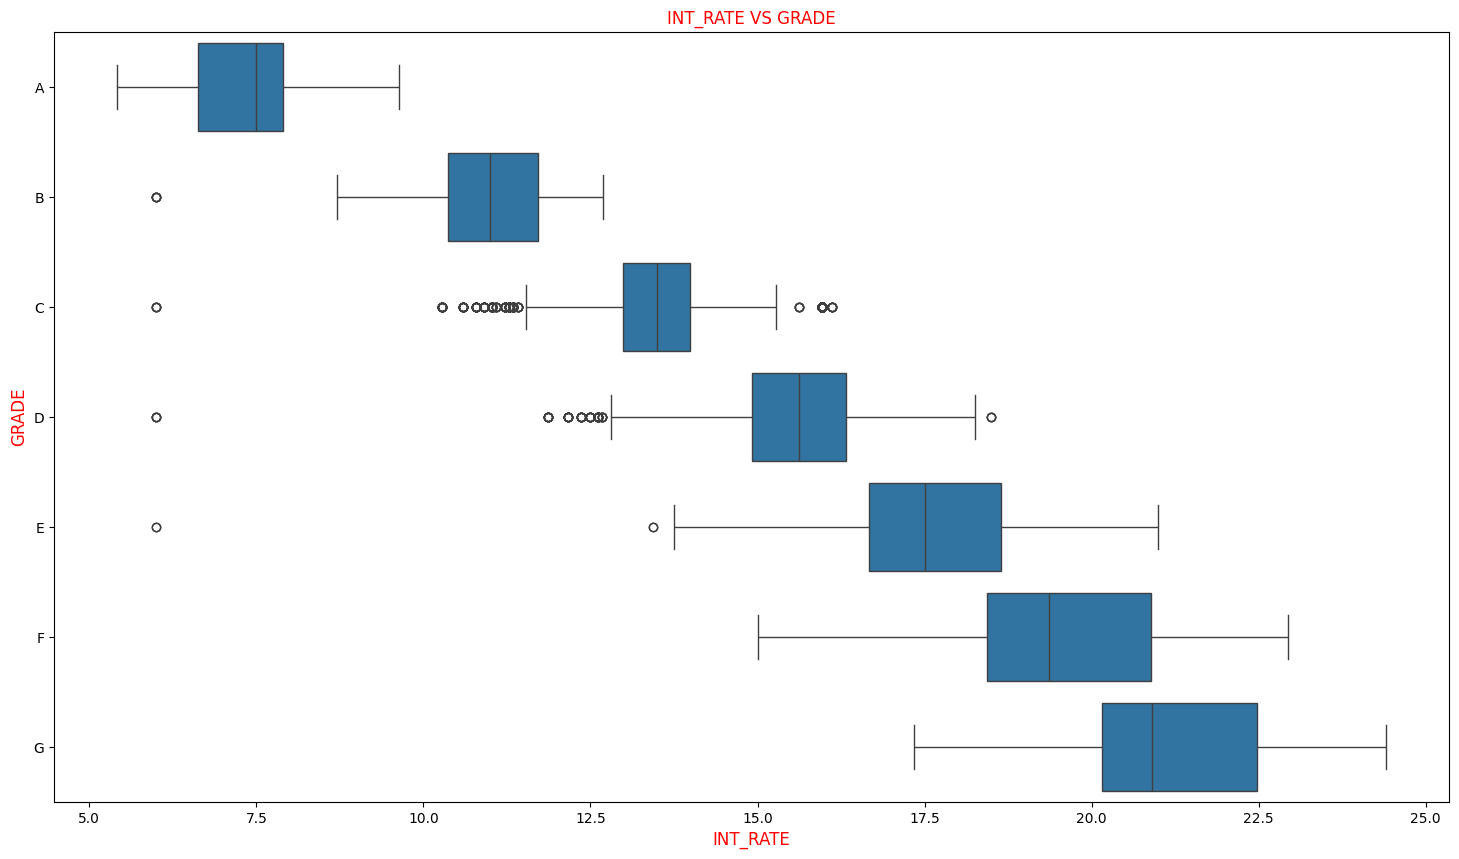


SUMMARY
          count   mean   std    min    25%    50%    75%    max
grade                                                          
A      9889.000  7.329 1.032  5.420  6.620  7.490  7.900  9.630
B     11483.000 11.010 0.900  6.000 10.370 10.990 11.710 12.690
C      7683.000 13.533 0.937  6.000 12.990 13.490 13.990 16.110
D      4985.000 15.662 1.163  6.000 14.910 15.620 16.320 18.490
E      2580.000 17.620 1.354  6.000 16.675 17.510 18.640 20.990
F       944.000 19.636 1.472 15.010 18.430 19.360 20.890 22.940
G       283.000 21.283 1.322 17.340 20.160 20.900 22.480 24.400

******************************************************************************************************************************************************


In [78]:
x_axis = ['loan_amnt', 'int_rate']
y_axis = 'grade'

box_plot_xy_axis(lending_club_load_paid_or_default_clean_data, x_axis, y_axis)

# *Interpretation*

---

***1. Loan Amount Vs Grade***

*  There's a clear upward trend in average loan amount (mean) as we move from grade A to grade G. This indicates that borrowers with higher credit risk (lower grades) are typically approved for larger loans. This could be due to factors like:
    - Higher interest rates for lower grades, leading to a larger total loan amount to compensate for the higher cost of borrowing.
    - Potential lenders targeting higher loan amounts to riskier borrowers to recoup potential losses.
* The standard deviation (std) is also generally higher for lower grades (A, B, and C), suggesting a greater spread in loan amounts within these categories. This implies that there's more variation in loan sizes approved for borrowers with better creditworthiness.
* The minimum loan amount is 500 USD across all grades, indicating a potential lower limit for loan approvals.
* The distribution might be right-skewed (with a longer tail towards higher loan amounts) for some grades (especially lower grades), based on the 25th percentile (Q1) and 75th percentile (Q3) values being lower than the median (Q2). This suggests that a smaller portion of borrowers receive very large loans within these grades.
* Lenders might have stricter criteria for approving larger loans for borrowers with better credit scores (higher grades).
* Borrowers with lower credit scores (lower grades) might have a greater need for larger loans due to higher financial obligations or starting larger businesses.

***2. Int_Rate Vs Grade***
* Clear Trend: The average grade (mean) progressively increases from A (7.33) to G (21.28), indicating a strong positive correlation between loan grade (creditworthiness) and a higher numerical grade (potentially representing a lender's internal rating system). Borrowers with better credit scores (higher grades) tend to have lower loan grades (closer to A).
* Standard Deviation: The standard deviation (std) is generally lower for higher grades (A, B, and C) and increases for lower grades (D, E, F, and G). This suggests that loan grades for borrowers with better creditworthiness are more concentrated around the average, while there's more variability in grades assigned to borrowers with lower credit scores.
* Minimum and Maximum: The minimum grade is 5.42 for all grades (possibly indicating a lower limit for the grading system). The maximum grade varies across categories, with a wider range for lower grades (G: 24.40) compared to higher grades (A: 9.63). This suggests that the grading system might have more flexibility in assigning scores to borrowers with lower creditworthiness.
* Distribution Skew: The 25th percentile (Q1) and 75th percentile (Q3) values are generally lower than the median (Q2) for most grades. This, along with the provided image (assuming it accurately reflects the data), suggests a potential right-skewed distribution for some grades, particularly lower ones (D, E, F, and G). This means a smaller proportion of borrowers receive very high grades within these categories.
* Lenders might have a more granular grading system for borrowers with lower credit scores to differentiate risk levels more precisely.
* Borrowers with lower credit scores might exhibit a wider range of financial characteristics, leading to more variation in assigned grades.

**5. Loan Amount Vs Purpose & Interest Rate Vs Purpose**


Plot No.1



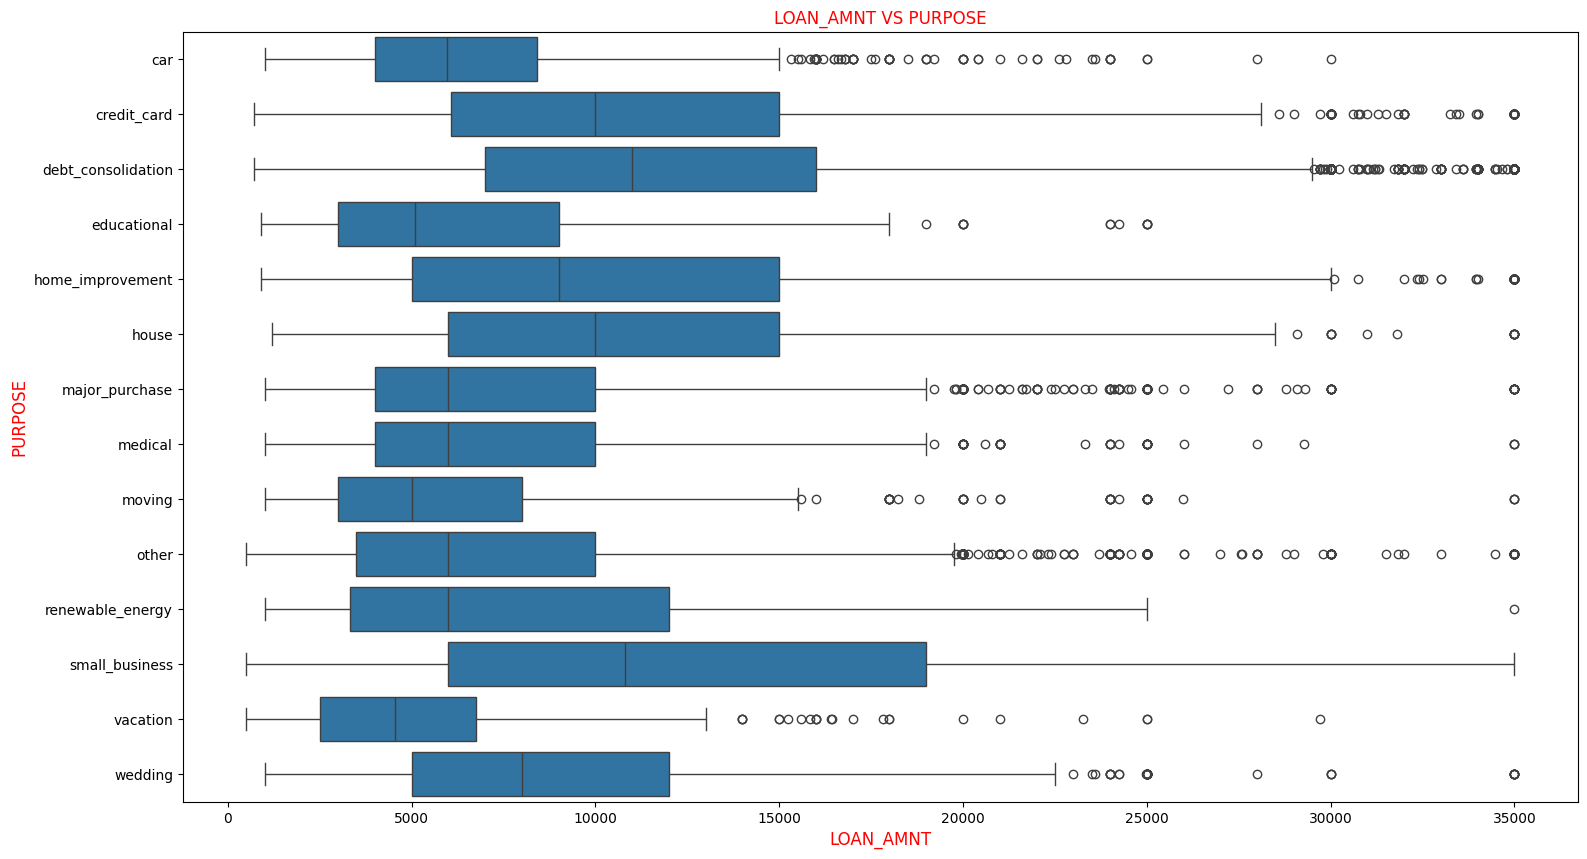


SUMMARY
                       count      mean      std      min      25%       50%  \
purpose                                                                       
car                 1479.000  6707.809 4008.629 1000.000 4000.000  5975.000   
credit_card         4932.000 11473.834 6799.180  725.000 6062.500 10000.000   
debt_consolidation 17767.000 12390.319 7279.504  700.000 7000.000 11000.000   
educational          321.000  6723.988 5059.947  900.000 3000.000  5100.000   
home_improvement    2761.000 10972.275 7719.668  900.000 5000.000  9000.000   
house                356.000 12312.360 7690.175 1200.000 6000.000 10000.000   
major_purchase      2112.000  7980.788 5936.617 1000.000 4000.000  6000.000   
medical              665.000  7983.947 5873.216 1000.000 4000.000  6000.000   
moving               570.000  6470.307 5560.766 1000.000 3000.000  5000.000   
other               3801.000  7841.226 6224.053  500.000 3500.000  6000.000   
renewable_energy      99.000  8241.162 6545

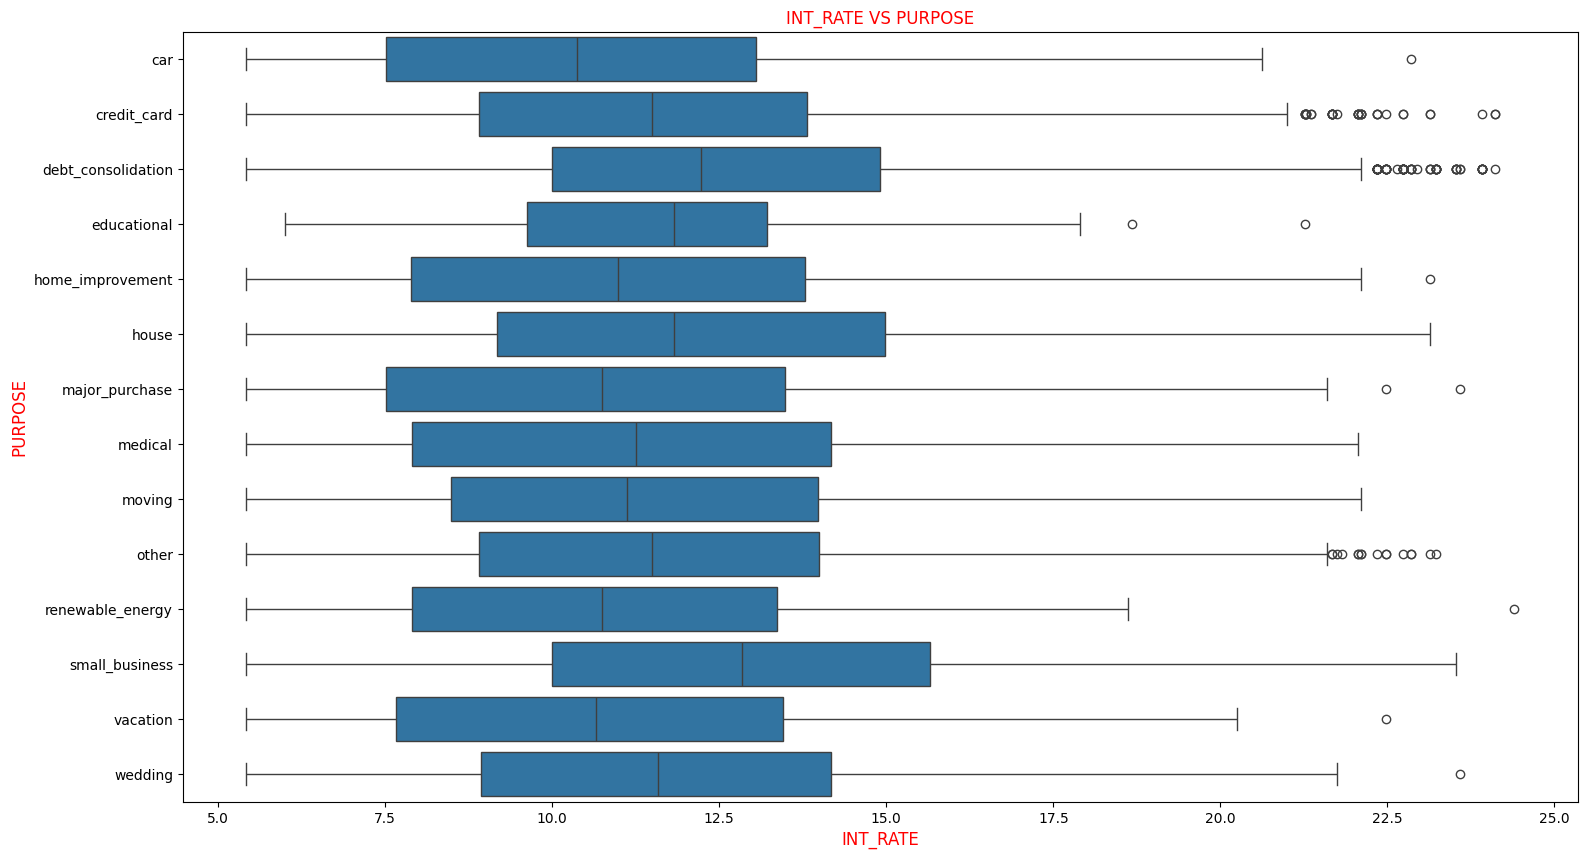


SUMMARY
                       count   mean   std   min    25%    50%    75%    max
purpose                                                                    
car                 1479.000 10.472 3.391 5.420  7.510 10.370 13.050 22.850
credit_card         4932.000 11.611 3.508 5.420  8.900 11.490 13.810 24.110
debt_consolidation 17767.000 12.375 3.697 5.420  9.990 12.230 14.910 24.110
educational          321.000 11.645 2.543 6.000  9.630 11.830 13.220 21.270
home_improvement    2761.000 11.255 3.731 5.420  7.880 10.990 13.790 23.130
house                356.000 12.123 3.945 5.420  9.172 11.830 14.983 23.130
major_purchase      2112.000 10.792 3.583 5.420  7.510 10.740 13.480 23.590
medical              665.000 11.441 3.641 5.420  7.900 11.260 14.170 22.060
moving               570.000 11.483 3.481 5.420  8.490 11.120 13.980 22.110
other               3801.000 11.704 3.502 5.420  8.900 11.490 13.990 23.220
renewable_energy      99.000 11.246 3.714 5.420  7.900 10.750 13.360 24.400
sma

In [79]:
x_axis = ['loan_amnt', 'int_rate']
y_axis = 'purpose'

box_plot_xy_axis(lending_club_load_paid_or_default_clean_data, x_axis, y_axis)

# *Interpretation*

---
***1. Loan_Amount Vs Purpose***
* There's a significant variation in average loan amounts (mean) across different loan purposes. Debt consolidation loans have the highest average loan amount (~$12,390), followed by home improvement (~$10,972) and house loans (~$12,312). In contrast, vacation loans have the lowest average amount (~$5,417). This suggests that borrowers seek larger loans for purposes like consolidating existing debt, financing home renovations, or purchasing property, while smaller loans are sufficient for financing vacations.
* The standard deviation (std) is generally higher for loan purposes with larger average amounts (debt consolidation, home improvement, house) and lower for purposes with smaller average amounts (vacation, educational). This indicates a wider spread in loan sizes for purposes requiring larger sums, potentially due to factors like project costs or property values.
* The minimum loan amount is $500 for most purposes, with some exceptions (educational: $900, house: $1200). This suggests a lower limit on loan approvals.
* The distribution appears right-skewed (with a longer tail towards higher loan amounts) for most loan purposes based on the 25th percentile (Q1) and 75th percentile (Q3) values being lower than the median (Q2). This implies that a smaller portion of borrowers receive very large loans within each category.
* Loan purposes inherently influence the required loan amount. Debt consolidation might involve combining multiple existing debts, often leading to larger loan sizes.
* Lenders might have set limits or criteria for loan amounts based on the purpose (e.g., higher limits for home improvement loans).

***2. Int_Rate Vs Purpose***
* There appears to be a slight variation in the average interest rate (mean) across loan purposes. Debt consolidation loans have the highest average interest rate (-12.38%), followed by small business loans (-12.90%) and house loans (-12.12%). On the other hand, educational loans have a lower average interest rate (-11.65%). It's important to note that these are relatively small differences.
* The standard deviation (std) is fairly consistent across most loan purposes, suggesting a similar spread of interest rates around the mean for each category.
* The minimum interest rate is 5.42% for all loan purposes. This might be a lower limit set by the lender.
* The distribution appears right-skewed (with a longer tail towards higher interest rates) for most loan purposes based on the 25th percentile (Q1) and 75th percentile (Q3) values being lower than the median (Q2). This implies that a smaller portion of borrowers receive very high interest rates within each category.
* Loan purpose might influence interest rates to a certain extent. Lenders might charge higher rates for loans considered riskier (debt consolidation, small business) or those with a higher potential default rate.
* Other factors likely play a more significant role in determining interest rates, such as borrower creditworthiness, loan amount, or loan term.

# **CREATING BUCKETS FOR BIVARIATE ANALYSIS**

**Segementation of Loan amount, Interest Rate, Annual Income & Total_acc**

In [80]:
# Bucket definitions for your columns
bucket_definitions = {
  'loan_amnt': (list(range(0, 40001, 7000)), ['0 - 7k', '7k - 14k', '14k - 21k',
                                              '21k - 28k', '28k+']),
  'int_rate': (list(range(5, 26, 5)), ['5 - 10%', '10 - 15%', '15 - 20%', '20%+']),
  'annual_inc': (list(range(0, 250001, 50000)), ['0 - 50k', '50k - 100k', '100k - 150k',
                                                 '150k - 200k', '200k+']),
  'total_acc': (list(range(0, 92, 30)), ['0 - 30', '30 - 60', '90+'])
}

# Apply bucket creation
lending_club_load_paid_or_default_clean_data = create_categorical_buckets(
    lending_club_load_paid_or_default_clean_data, bucket_definitions)

print(lending_club_load_paid_or_default_clean_data.head())

   loan_amnt       term  int_rate grade sub_grade emp_length home_ownership  \
0       5000  36 months    10.650     B        B2  10+ years           RENT   
1       2500  60 months    15.270     C        C4   < 1 year           RENT   
2       2400  36 months    15.960     C        C5  10+ years           RENT   
3      10000  36 months    13.490     C        C1  10+ years           RENT   
4       5000  36 months     7.900     A        A4    3 years           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0       24000            Verified 2011-12-01   Fully Paid     credit_card   
1       30000     Source Verified 2011-12-01  Charged Off             car   
2       12252        Not Verified 2011-12-01   Fully Paid  small_business   
3       49200     Source Verified 2011-12-01   Fully Paid           other   
4       36000     Source Verified 2011-12-01   Fully Paid         wedding   

  addr_state    dti  delinq_2yrs  revol_bal  revol_util  total

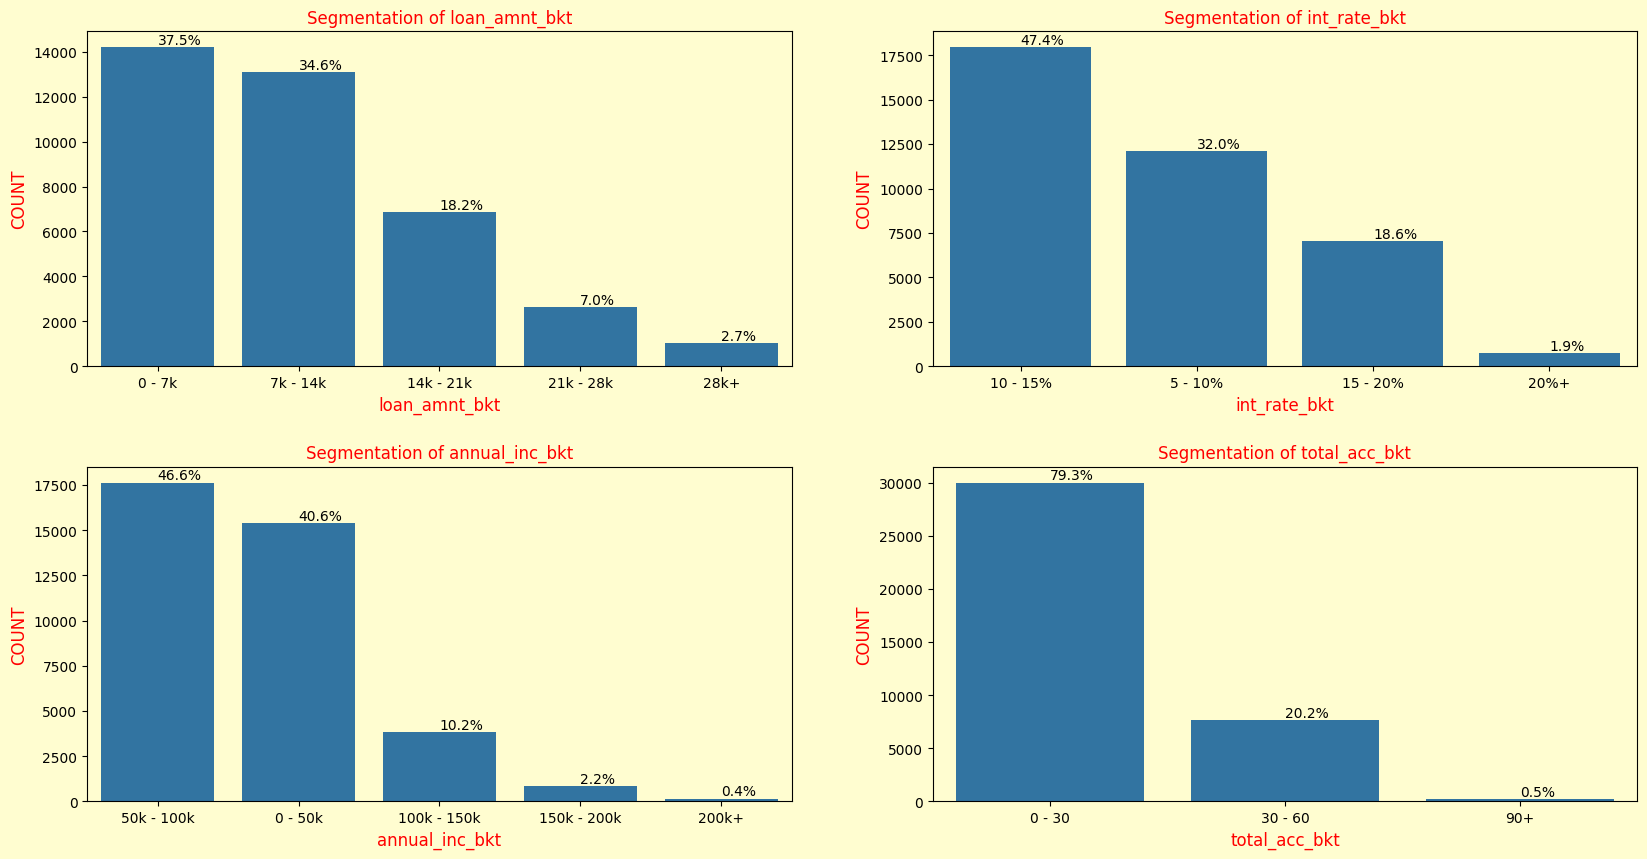


SUMMARY of LOAN_AMNT_BKT
0 - 7k are 14194 
7k - 14k are 13110 
14k - 21k are 6872 
28k+ are 2648 
21k - 28k are 1023


SUMMARY of INT_RATE_BKT
10 - 15% are 17942 
15 - 20% are 12120 
5 - 10% are 7052 
20%+ are 733


SUMMARY of ANNUAL_INC_BKT
0 - 50k are 17630 
50k - 100k are 15383 
100k - 150k are 3846 
200k+ are 828 
150k - 200k are 160


SUMMARY of TOTAL_ACC_BKT
0 - 30 are 30011 
30 - 60 are 7642 
90+ are 194



In [81]:
column_list = ['loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt', 'total_acc_bkt']
countplot_grid(lending_club_load_paid_or_default_clean_data, column_list)

# *Interpretation*

---

1. **Loan Amount Buckets**: Shows the distribution of loans across different loan amount ranges. You can observe which loan amount brackets are most common among the borrowers.
2. **Interest Rate Buckets**: Illustrates how loans are distributed across various interest rate ranges, providing insights into the typical interest rates charged based on the data.
3. **Annual Income Buckets**: Displays the distribution of borrowers' annual incomes, helping to understand the financial backgrounds of the loan applicants.
4. **Total Accounts Buckets**: Reflects the distribution of the total number of credit lines in the borrowers' credit files, which might be indicative of borrowers' credit experiences or credit appetite.

**Count only `Fully Paid` & `Charged Off` Loan Status on segmentation**

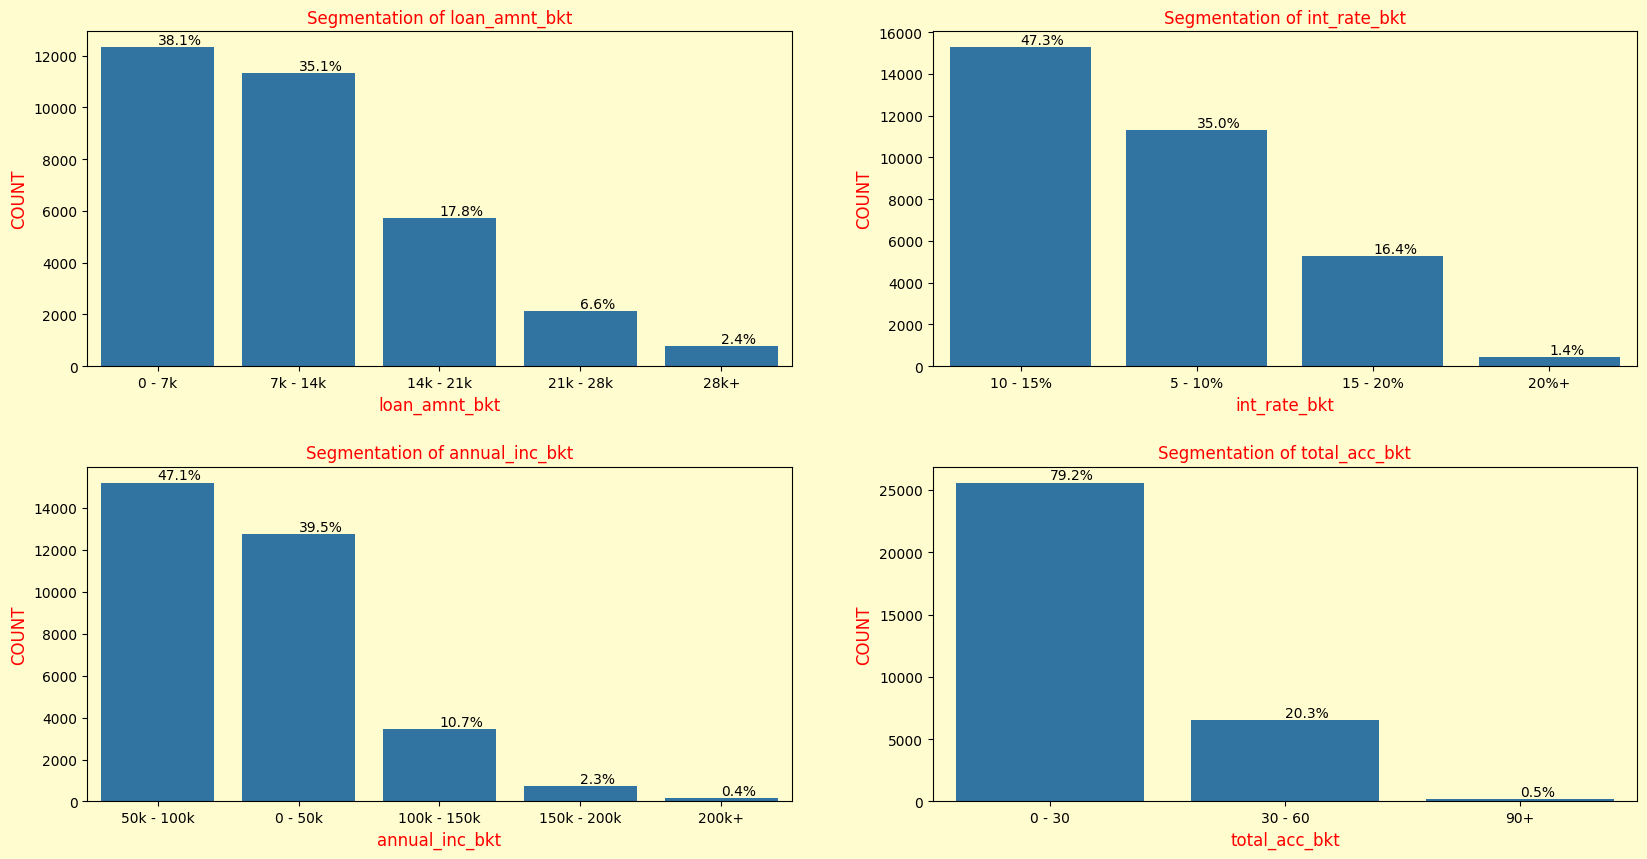


SUMMARY of LOAN_AMNT_BKT
0 - 7k are 12319 
7k - 14k are 11342 
14k - 21k are 5741 
28k+ are 2132 
21k - 28k are 774


SUMMARY of INT_RATE_BKT
10 - 15% are 15271 
15 - 20% are 11303 
5 - 10% are 5287 
20%+ are 447


SUMMARY of ANNUAL_INC_BKT
0 - 50k are 15216 
50k - 100k are 12772 
100k - 150k are 3441 
200k+ are 734 
150k - 200k are 145


SUMMARY of TOTAL_ACC_BKT
0 - 30 are 25582 
30 - 60 are 6556 
90+ are 170



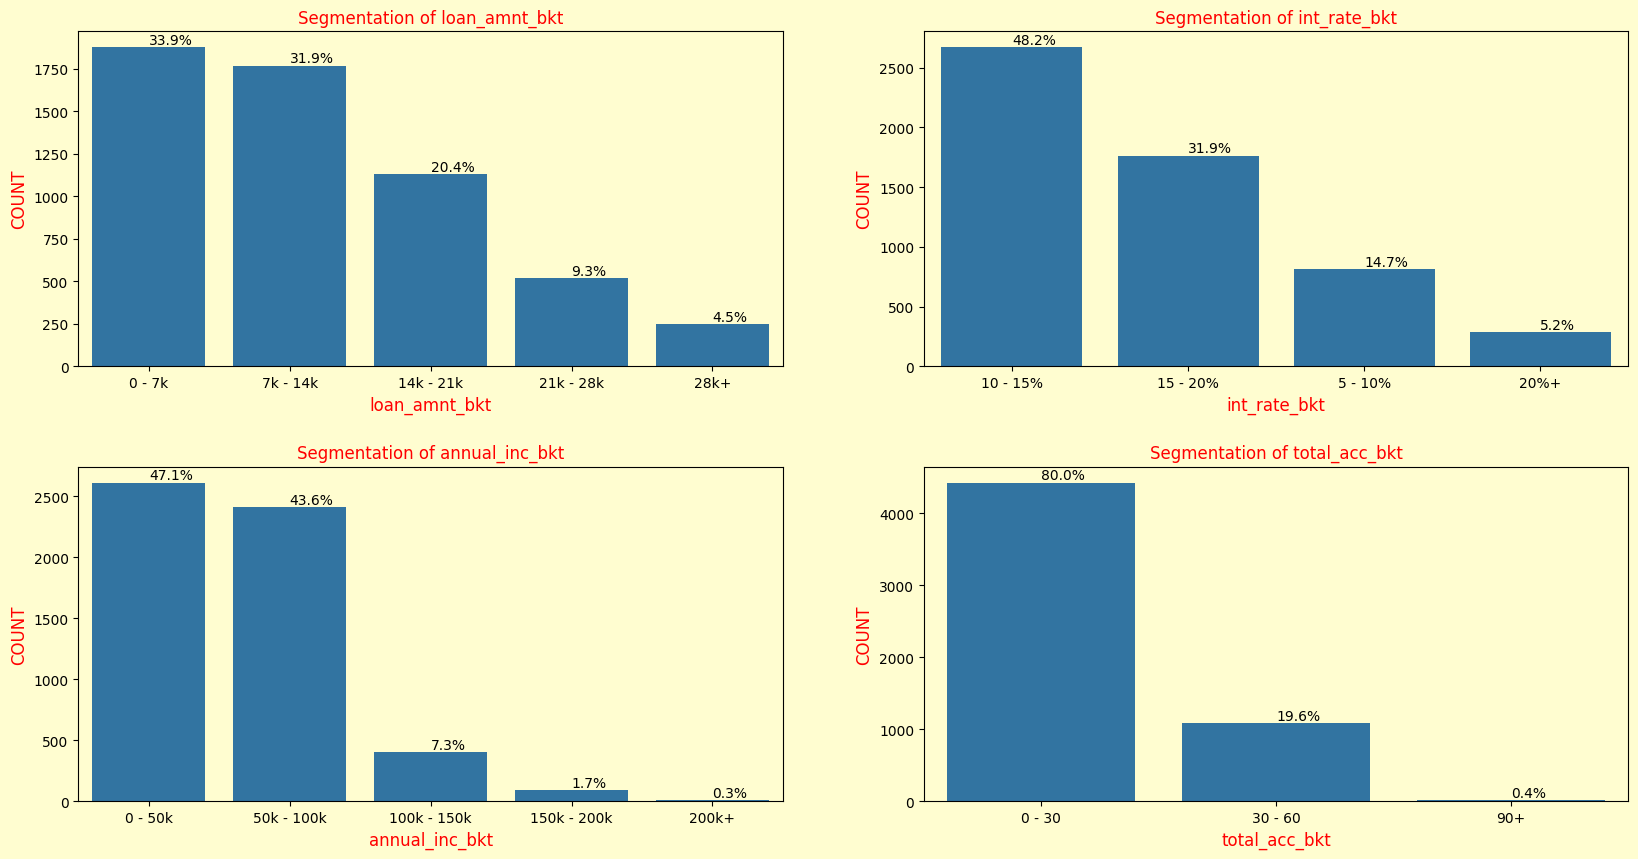


SUMMARY of LOAN_AMNT_BKT
0 - 7k are 1875 
7k - 14k are 1768 
14k - 21k are 1131 
21k - 28k are 516 
28k+ are 249


SUMMARY of INT_RATE_BKT
15 - 20% are 2671 
20%+ are 1765 
10 - 15% are 817 
5 - 10% are 286


SUMMARY of ANNUAL_INC_BKT
0 - 50k are 2611 
50k - 100k are 2414 
100k - 150k are 405 
150k - 200k are 94 
200k+ are 15


SUMMARY of TOTAL_ACC_BKT
0 - 30 are 4429 
30 - 60 are 1086 
90+ are 24



In [82]:
loan_status_list = ['Fully Paid', 'Charged Off']
for i in loan_status_list:
  data = lending_club_load_paid_or_default_clean_data[
      lending_club_load_paid_or_default_clean_data['loan_status'] == i]
  column_list = ['loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt', 'total_acc_bkt']
  countplot_grid(data, column_list)

* **Fully Paid vs. Charged Off for Loan Amount Buckets**: This visualization helps identify which loan amount ranges have higher occurrences of fully paid loans versus those that are often charged off.
* **Fully Paid vs. Charged Off for Interest Rate Buckets**: Shows how interest rates might correlate with the likelihood of a loan being fully paid or charged off.
* **Fully Paid vs. Charged Off for Annual Income Buckets**: Provides insight into how borrowers' income levels might affect their ability to fully pay off loans.
* **Fully Paid vs. Charged Off for Total Accounts Buckets**: Illustrates if there is any noticeable pattern between the number of credit lines a borrower has and their loan repayment history.

Each plot can give lenders insights into risk factors associated with different segments of their loan portfolio.

# ***Multivariate Analysis***

In [83]:
data = lending_club_load_paid_or_default_clean_data[numerical_columns]
correlation = data.corr()
print(correlation)

            loan_amnt  int_rate  annual_inc    dti  revol_bal  revol_util  \
loan_amnt       1.000     0.297       0.414  0.070      0.337       0.063   
int_rate        0.297     1.000       0.064  0.113      0.106       0.468   
annual_inc      0.414     0.064       1.000 -0.116      0.397       0.031   
dti             0.070     0.113      -0.116  1.000      0.277       0.279   
revol_bal       0.337     0.106       0.397  0.277      1.000       0.357   
revol_util      0.063     0.468       0.031  0.279      0.357       1.000   
total_acc       0.249    -0.055       0.375  0.234      0.330      -0.075   

            total_acc  
loan_amnt       0.249  
int_rate       -0.055  
annual_inc      0.375  
dti             0.234  
revol_bal       0.330  
revol_util     -0.075  
total_acc       1.000  


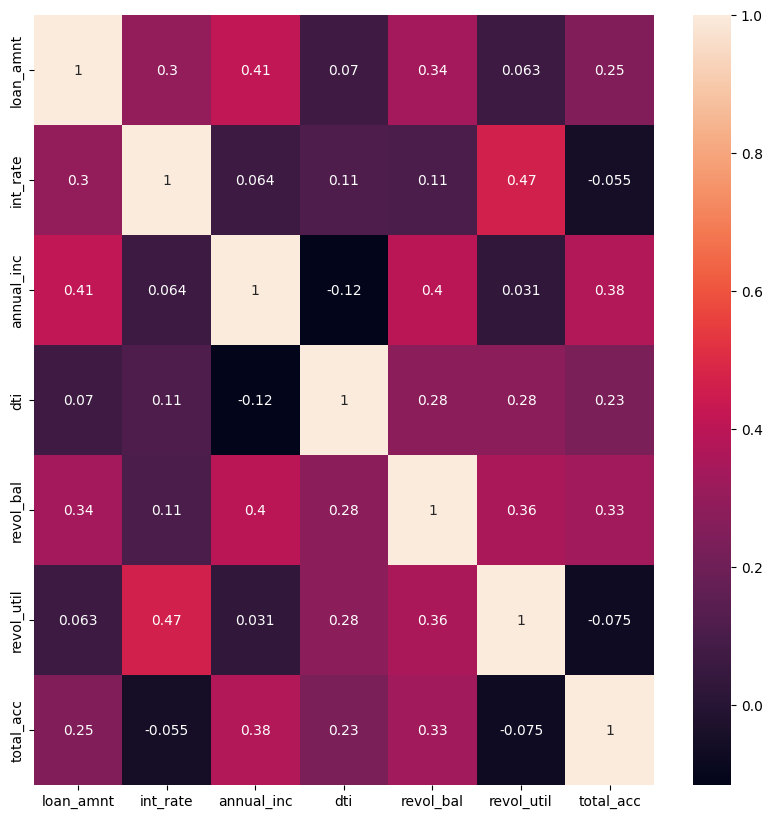

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True)
plt.show()

# *Interpretation*

---

1. ***Loan Amount (loan_amnt)***:
  * Positive Correlation:
    - ***Debt-to-Income Ratio (dti)***: This suggests borrowers with higher debt obligations relative to their income (higher dti) tend to take larger loans. Lenders may be more cautious with such borrowers, potentially leading to them seeking larger loans to meet their financial needs.
    - ***Revolving Balance (revol_bal)***: A higher revolving balance (outstanding credit card debt) might indicate a greater need for a loan. Borrowers with larger existing credit card debt might seek a loan to consolidate or pay it down.
  * Negative Correlation:
    - ***Annual Income (annual_inc)***: This aligns with the expectation that borrowers with higher income may qualify for smaller loans due to their greater financial resources. They might need to borrow less or may have better loan options with lower principal amounts.

2. ***Interest Rate (int_rate)***:

  * Positive Correlation:
    - ***Debt-to-income Ratio (dti) & Revolving Credit Utilization (revol_util)***: Borrowers with a higher dti or who utilize more of their credit limit (higher revol_util) are seen as riskier by lenders. This risk is often reflected in a higher interest rate charged on the loan.
  * Negative Correlation:
    - ***Annual Income (annual_inc)***: Generally, borrowers with a stronger financial standing (higher income) are viewed as less risky. This can translate to lenders offering them loans with lower interest rates.

3. ***Debt-to-Income Ratio (dti) & Revolving Credit Utilization (revol_util)***:
  * Positive Correlation: A strong positive correlation here is intuitive.
  Borrowers with a high dti likely have multiple debts and may also be utilizing a significant portion of their credit limits, reflected in a high revol_util.

4. ***Revolving Credit Utilization (revol_util) & Total Number of Credit Accounts (total_acc)***:

  * Positive Correlation: This suggests that borrowers who utilize a higher portion of their credit limits (high revol_util) tend to have more open credit accounts (total_acc). This could indicate a higher reliance on credit or potentially difficulty managing multiple credit lines.
